In [2]:
import warnings
import statistics
import numpy as np
from sympy import *
import pandas as pd
import scipy.integrate as SI
import scipy.optimize as SOP
from scipy.optimize import curve_fit
from scipy.stats import binom
import matplotlib.pyplot as plt
from random import random,randint
from scipy.integrate import odeint,solve_ivp
from IPython.display import display, Math


warnings.filterwarnings('ignore')    #suppress warnings

plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (18,8)

# $$ \text{ASSIGNMENT 1} $$

### $$\textbf{Solving ODE using Euler method} , 4^{th} \textbf{order Runge Kutta method} , \textbf{scipy.integrate.odeint()} $$

Q1.  Solve the functions: $ \large\displaystyle\frac{\text{d}x}{\text{dt}}=\sin x $

 Implement : $\displaystyle{\qquad a) \ \textbf{Euler’s method }  \quad
              b) {\ } 4^{th} \textbf{order Runge Kutta  Method }}$ 
 
 Given condition for : $ \displaystyle\large{ x_0 = [ 0.1,1.55,4{}]},$ Superpose these three curves.

In [2]:
def euler(f,j,n):
    t,X,T = 0,[j],[0]
    for i in range(0,int(n)+1):
        j = j + h * f(j,t)
        t = t + h
        X.append(j)
        T.append(t)
    return T ,X  

def runge_kutta4(f,j,n):
    t,X,T = 0,[j],[0]
    for i in range(0,int(n)+1):
        k1 = f(j,t)
        k2 = f(j + (h/2)*k1 , t + (h/2))
        k3 = f(j + (h/2)*k2 , t + (h/2))
        k4 = f(j + h*k3 , t + h)
        j = j + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        t = t + h
        X.append(j)
        T.append(t)
    return T, X

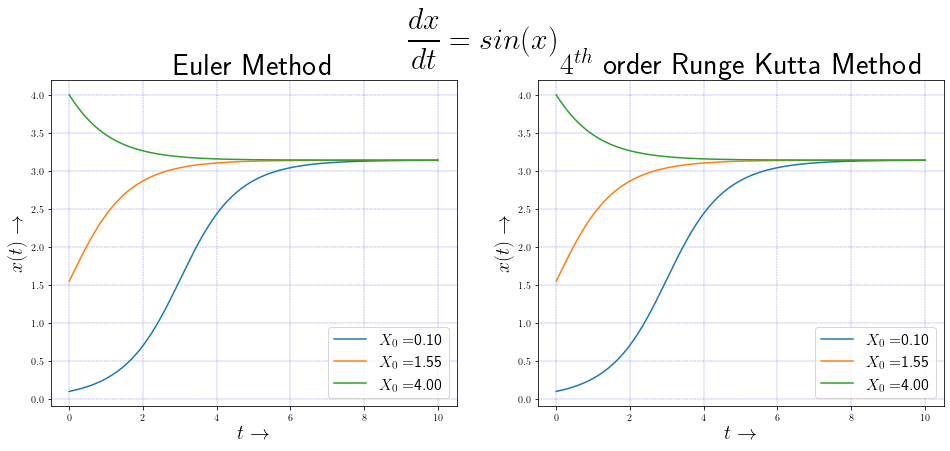

In [3]:
def f(x,t):
    return np.sin(x)
                                 
x0 = [0.1,1.55,4]    
h,t0,tmax = 0.01,0.,10.   # 𝑡_0 → start time,𝑡_𝑚𝑎𝑥 → max time period,ℎ → step size            
n = (tmax-t0)/h           # 𝑛 → no. of steps

plt.rcParams['text.usetex'] = True
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
for j in x0:
    ax1.plot(euler(f,j,n)[0],euler(f,j,n)[1],label='$X_0 =$%.2f'%j)
    ax1.set_xlabel(r'$t \rightarrow$',size='20')
    ax1.set_ylabel(r'$x(t) \rightarrow$',size=20)
    ax1.grid(color='b', ls = '-.', lw = 0.25)
    ax1.set_title('Euler Method',size=30)
    ax1.legend(fontsize=16,loc='lower right')
    ax2.plot(runge_kutta4(f,j,n)[0],runge_kutta4(f,j,n)[1],label='$X_0 =$%.2f'%j)
    ax2.set_xlabel(r'$t \rightarrow$',size='20')
    ax2.set_ylabel(r'$x(t) \rightarrow$',size=20)
    ax2.grid(color='b', ls = '-.', lw = 0.25)
    ax2.set_title('$4^{th}$ order Runge Kutta Method',size=30)
    ax2.legend(fontsize=16,loc='lower right')
plt.suptitle(r"$\displaystyle\frac{dx}{dt}=sin(x)$",size=30,y=1.05)
plt.show()

Q2. Solve the eqn  : $ \large \frac{\text{d}x}{\text{dt}} = -xt^2 $

Implement a) using $\textbf{Euler method}\quad$ b) $ \ 4^{th} \textbf{order Runge-Kutta method}$

Use this fact to calculate : $  \text{ E(t)}=|x_{\text{numerical}} (t)-x(t)| $

$  \displaystyle{\therefore E=h^m => \ln E=m \ln h => Y=m*X+C }  $

$ \text{where } Y= \ln E , \text{and } X= \ln h , \text{and } C=\text{const.}  $

For different values of $h$. Find the power of $h$ with which $\text{E(t)}$ is proportional.



$x_0\rightarrow \text{  initial conditions of dependent variable}  $

$ n\rightarrow \text{ no. of steps}  $

$ t_0\rightarrow \text{ given initial condition}  $

$ t_{max}\rightarrow \text{ Given max value of independent variable}  $

$ h\rightarrow \text{ step size} = \frac{(t_{max}-t_0)}{n} $

$ x_{analytical}\rightarrow |\text{analytical value of the solution }|_{t} $

In [4]:
def Euler(f,N,h,x,t):
    E2 = []
    for i in range(len(N)):
        t,x = t0,x0
        for j in range(N[i]):
            x = x + h[i] * f(x,t)
            t = t + h[i]
        E2.append(abs(x_analytical-x))
    return E2

def Runge_Kutta4(f,N,h,x,t):
    E2 = []
    for i in range(len(N)):
        t,x = t0,x0
        for j in range(N[i]):
            k1 = f(x,t)
            k2 = f(x + (h[i]/2) * k1 , t + (h[i]/2))
            k3 = f(x + (h[i]/2) * k2 , t + (h[i]/2))
            k4 = f(x + h[i] * k3 , t + h[i])
            x = x + (h[i]/6) * (k1 + 2*k2 + 2*k3 + k4)
            t = t + h[i]
        E2.append(abs(x_analytical-x))
    return E2

In [5]:
t=symbols('t',real=True)
x=Function('x')(t)
dxdt=x.diff(t)
eq1=Eq(dxdt,-x*t**2)
print('Given choice is  :')
display(eq1)
s11=dsolve(eq1)
print('general soln. :')
display(s11)
s12=dsolve(eq1, ics={x.subs(t,0):10})
print('particular soln. :')
display(s12)
s12.evalf(subs={t: 2})

Given choice is  :


Eq(Derivative(x(t), t), -t**2*x(t))

general soln. :


Eq(x(t), C1*exp(-t**3/3))

particular soln. :


Eq(x(t), 10*exp(-t**3/3))

Eq(x(2), 0.694834512228015)

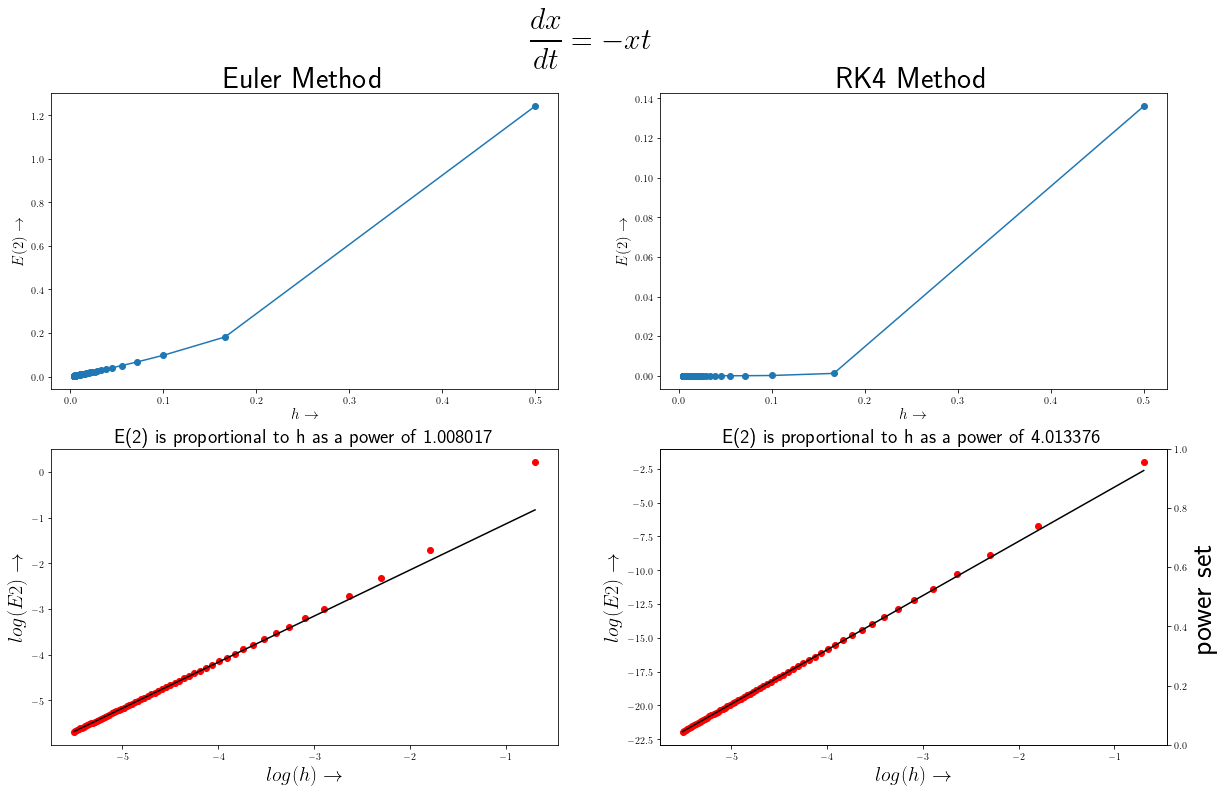

In [6]:
def f(x,t):
    return -x*t**2

n = np.arange(4,500,8)
x0,t0,tmax = 10, 0, 2                   
h = (tmax-t0)/n     
x_analytical = 0.694834512228015 

E2e = Euler(f,n,h,x0,t0)
E2r = Runge_Kutta4(f,n,h,x0,t0) 

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20,12))  
ax1.plot(h,E2e,'o-')
ax1.set_xlabel(r"$h \rightarrow$",size=15)
ax1.set_ylabel(r"$E(2) \rightarrow$",size=15)
ax1.set_title('Euler Method',size=30)
ax2.plot(h,E2r,'o-')
ax2.set_xlabel(r"$h \rightarrow$",size=15)
ax2.set_ylabel(r"$E(2) \rightarrow$",size=15)
ax2.set_title('RK4 Method',size=30)
E2e,E2r,H = np.log(E2e),np.log(E2r),np.log(h)

def ff(H,m,c):
    return m*H+c

pe,se=curve_fit(ff,H[-30:],E2e[-30:])
pr,sr=curve_fit(ff,H[-30:],E2r[-30:])

ax3.plot(H,E2e,'ro',H,ff(H,*pe),"k")
ax3.set_title('E(2) is proportional to h as a power of  %.6f'%pe[0],size=20)
ax3.set_xlabel(r'$log(h) \rightarrow$',size=20)
ax3.set_ylabel(r'$log(E2) \rightarrow$',size=20)
ax4.plot(H,E2r,'ro',H,ff(H,*pr),"k")
ax4.set_title('E(2) is proportional to h as a power of  %.6f'%pr[0],size=20)
ax4.set_xlabel(r'$log(h) \rightarrow$',size=20)
ax4.set_ylabel(r'$log(E2) \rightarrow$',size=20)
ax4=plt.twinx()
plt.ylabel('power set',fontsize=30)
plt.suptitle(r"$\displaystyle\frac{dx}{dt}=-xt$",y=0.98,size=30)
plt.show()

Q3. Repeat 2 with another function of your choice function of your choice:  

In [7]:
t=symbols('t',real=True)
x=Function('x')(t)
dxdt=x.diff(t)
eq1=Eq(dxdt,-x*t)
print('My choice is  :')
display(eq1)
s11=dsolve(eq1)
print('general soln. :')
display(s11)
s12=dsolve(eq1, ics={x.subs(t,0):10})
print('particular soln. :')
display(s12)
s12.evalf(subs={t: 2})

My choice is  :


Eq(Derivative(x(t), t), -t*x(t))

general soln. :


Eq(x(t), C1*exp(-t**2/2))

particular soln. :


Eq(x(t), 10*exp(-t**2/2))

Eq(x(2), 1.35335283236613)

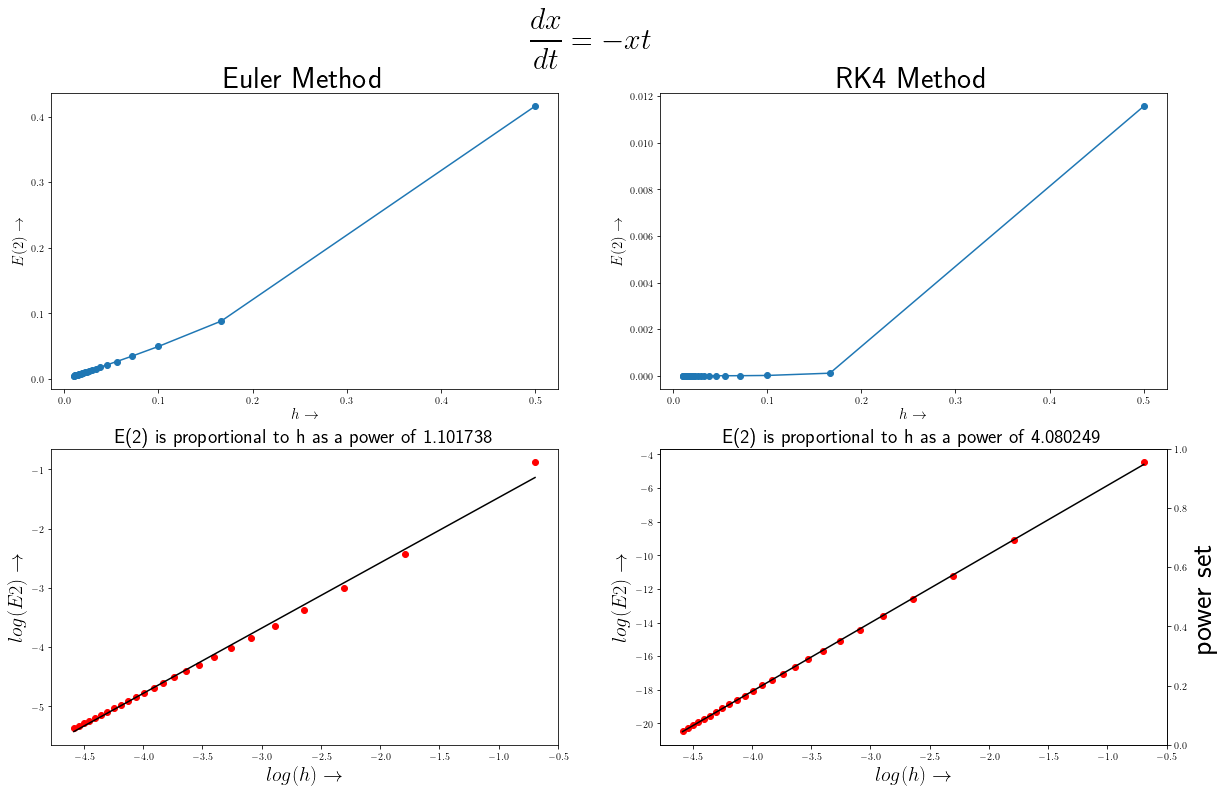

In [8]:
def f(x,t):
    return -x*t

n=np.arange(4,200,8)
x0,t0,tmax = 10, 0, 2                   
h = (tmax-t0)/n
x_analytical = 1.35335283236613 

E2e = Euler(f,n,h,x0,t0)
E2r = Runge_Kutta4(f,n,h,x0,t0) 

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20,12))  
ax1.plot(h,E2e,'o-')
ax1.set_xlabel(r"$h \rightarrow$",size=15)
ax1.set_ylabel(r"$E(2) \rightarrow$",size=15)
ax1.set_title('Euler Method',size=30)
ax2.plot(h,E2r,'o-')
ax2.set_xlabel(r"$h \rightarrow$",size=15)
ax2.set_ylabel(r"$E(2) \rightarrow$",size=15)
ax2.set_title('RK4 Method',size=30)
E2e,E2r,H = np.log(E2e),np.log(E2r),np.log(h)

def ff(H,m,c):
    return m*H+c

pe,se=curve_fit(ff,H[-30:],E2e[-30:])
pr,sr=curve_fit(ff,H[-30:],E2r[-30:])

ax3.plot(H,E2e,'ro',H,ff(H,*pe),"k")
ax3.set_title('E(2) is proportional to h as a power of  %.6f'%pe[0],size=20)
ax3.set_xlabel(r'$log(h) \rightarrow$',size=20)
ax3.set_ylabel(r'$log(E2) \rightarrow$',size=20)
ax4.plot(H,E2r,'ro',H,ff(H,*pr),"k")
ax4.set_title('E(2) is proportional to h as a power of  %.6f'%pr[0],size=20)
ax4.set_xlabel(r'$log(h) \rightarrow$',size=20)
ax4.set_ylabel(r'$log(E2) \rightarrow$',size=20)
ax4=plt.twinx()
plt.ylabel('power set',fontsize=30)
plt.suptitle(r"$\displaystyle\frac{dx}{dt}=-xt$",y=0.98,size=30)
plt.show()

Q4.Solve : $ \large \frac{\text{d}x}{\text{dt}}=x(1-x),\qquad$using **scipy.integrate.odeint()**

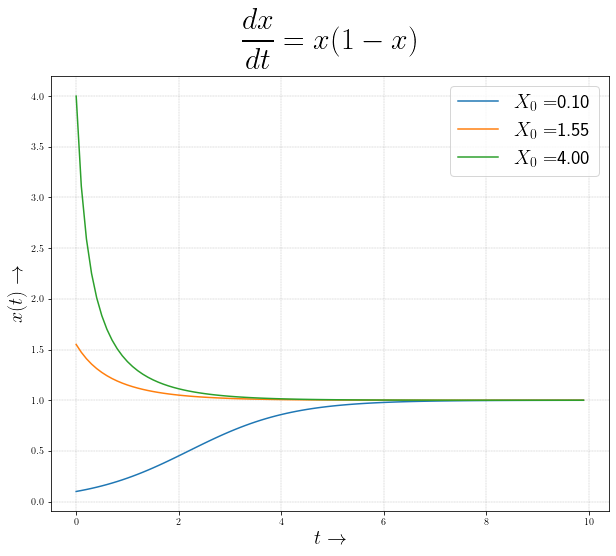

In [9]:
def f(x,t):
    return x*(1-x)

t = np.arange(0,10,0.1)
x0 = [0.1,1.55,4]   
plt.figure(figsize=(10,8))
for j in x0:
    x = SI.odeint(f,j,t)
    plt.plot(t,x,label = '$X_0 =$%.2f'%j)
plt.xlabel(r'$t \rightarrow$',size='20')
plt.ylabel(r'$x(t) \rightarrow$',size=20)
plt.title(r"$\displaystyle\frac{dx}{dt}=x(1-x)$",size=30,y=1.051)
plt.legend(fontsize = 20,loc='upper right')
plt.grid(color = 'grey', ls = '-.', lw = 0.25)
plt.show()

# $$ \text{ASSIGNMENT 2} $$

$\displaystyle{ \text{ Implement }: }$
$\displaystyle{a) \ \text{Euler method} \quad}$
$\displaystyle{b) \ 4^{th} \text{order Runge Kutta method} \quad }$
$\displaystyle{c) \ \text{scipy.integrate.odeint()}}$

In [2]:
def Euler(f,x,T,n,h):
    X,U = [],[]
    for i in  range (int(n) + 1):
        x = x + h*f(x,T)
        X.append(x[0])
        U.append(x[1])
    return X,U    

def RK4_method(f,x,T,n,h):
    X,U = [],[]
    for i in  range (int(n) + 1):
        k1 = f(x,i)
        k2 = f(x + (h/2)*k1 , i + (h/2))
        k3 = f(x + (h/2)*k2 , i + (h/2))
        k4 = f(x + h*k3 , i + h)
        x = x + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        X.append(x[0])
        U.append(x[1])
    return X,U

def SIO_method(f,x,T):
    s = SI.odeint(f,x,T)
    X,U = s[:,0], s[:,1]
    return X,U

$\displaystyle{Q1.\text{ Solve the motion of a particle thrown vertically upward with a velocity} :}$
$$\displaystyle{ m \frac{\text{d}^{2}x}{\text{dt}^{2}}=-mg }$$

$$\displaystyle{=>\frac{\text{d}^{2}x}{\text{dt}^{2}}=-g }$$

$\displaystyle{\text{Take }x_{0}=0,u=10m/s, g=9.8 m/s^{2}, m = 1 } $

$\displaystyle{\text{Compare this with theoritical curve }: x=ut-\frac{1}{2}gt^{2}}$

In [3]:
def f(X,t):
    x = X[0]
    u = X[1]
    dx = u
    du = -g
    return np.array([dx,du])

x0 = 0                        # initial conditions of position variable 
u0 = 10                       # initial conditions of velocity variable 
n  = 10                       # no. of steps
g  = 9.8                      # accleration due to gravity
h  = 0.0001                   # step size
t  = 0                        # initial start time
tmax =  2*u0/g                # final end time
T = np.arange(t,tmax+h,h)     # time space
n = len(T)-1                  # no. of steps
x = np.array([x0,u0])         # initial conditions of dependent variable

X_analytic = u0*T-(g*T*T)/2
V_analytic = u0-(g*T)

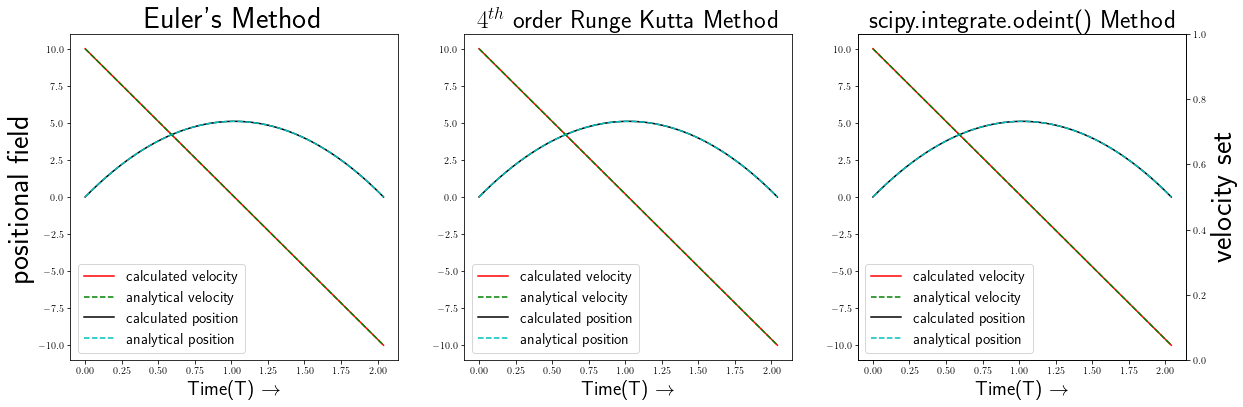

In [4]:
plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(131)
plt.plot(T,Euler(f,x,T,n,h)[1],'r',T,V_analytic,'g--', T,Euler(f,x,T,n,h)[0],'k',T,X_analytic,'c--')
plt.xlabel(r"Time(T) $\rightarrow$",size=20)
plt.ylabel("positional field", fontsize=30)
plt.legend(['calculated velocity','analytical velocity','calculated position','analytical position'],fontsize=15)
plt.title(" Euler's Method ",fontsize=30)
plt.subplot(132)
plt.plot(T,RK4_method(f,x,T,n,h)[1],'r',T,V_analytic,'g--', T,RK4_method(f,x,T,n,h)[0],'k',T,X_analytic,'c--')
plt.xlabel(r"Time(T) $\rightarrow$",size=20)
plt.legend(['calculated velocity','analytical velocity','calculated position','analytical position'],fontsize=15)
plt.title('$4^{th}$ order Runge Kutta Method',fontsize=25)
plt.subplot(133)
plt.plot(T,SIO_method(f,x,T)[1],'r',T,V_analytic,'g--', T,SIO_method(f,x,T)[0],'k',T,X_analytic,'c--')
plt.xlabel(r"Time(T) $\rightarrow$",size=20)
plt.legend(['calculated velocity','analytical velocity','calculated position','analytical position'],fontsize=15)
plt.title('scipy.integrate.odeint() Method ',fontsize=25)
plt.twinx()
plt.ylabel('velocity set',fontsize=30)
plt.show()

$ \displaystyle{Q2.\text{Solve the motion of a} \textbf{ simple harmonic oscillator} \text{ for } :}$

$$\displaystyle{ m\frac{\text{d}^2 x}{\text{dt}^2}=-m\omega^2 x} $$

$$\displaystyle{=>\frac{\text{d}^2 x}{\text{dt}^2}=-\omega^2 x}$$

$\displaystyle{\quad\text{Taking }m=1,\omega=1,x_0=1,v_0=0,g=9.8 m/s^2 }$

$\displaystyle{ \text{Compare this with theoretical curve }: x=\cos \omega t \\ \text{ And also plot the phase plot (v-x) for } t_{max}=40\frac{\pi}{\omega} }$

In [5]:
def f(X,t):
    x = X[0]
    v = X[1]
    dx = v
    dv = -w**2*x
    return np.array([dx,dv])

x0 = 1         # initial conditions of position variable 
v0 = 0         # initial conditions of velocity variable 
w = 1          # natural angular frequency
h = 0.0001     # step size
g = 9.8        # accleration due to gravity
t = 0                  # initial start time
tmax = (40*np.pi)/w    # final end time
T = np.arange(t,tmax+h,h)  # time space
n = len(T)-1               # no. of steps
x = np.array([x0,v0])

X_analytic = np.cos(w*T)
V_analytic = np.sin(w*T)*(-w)

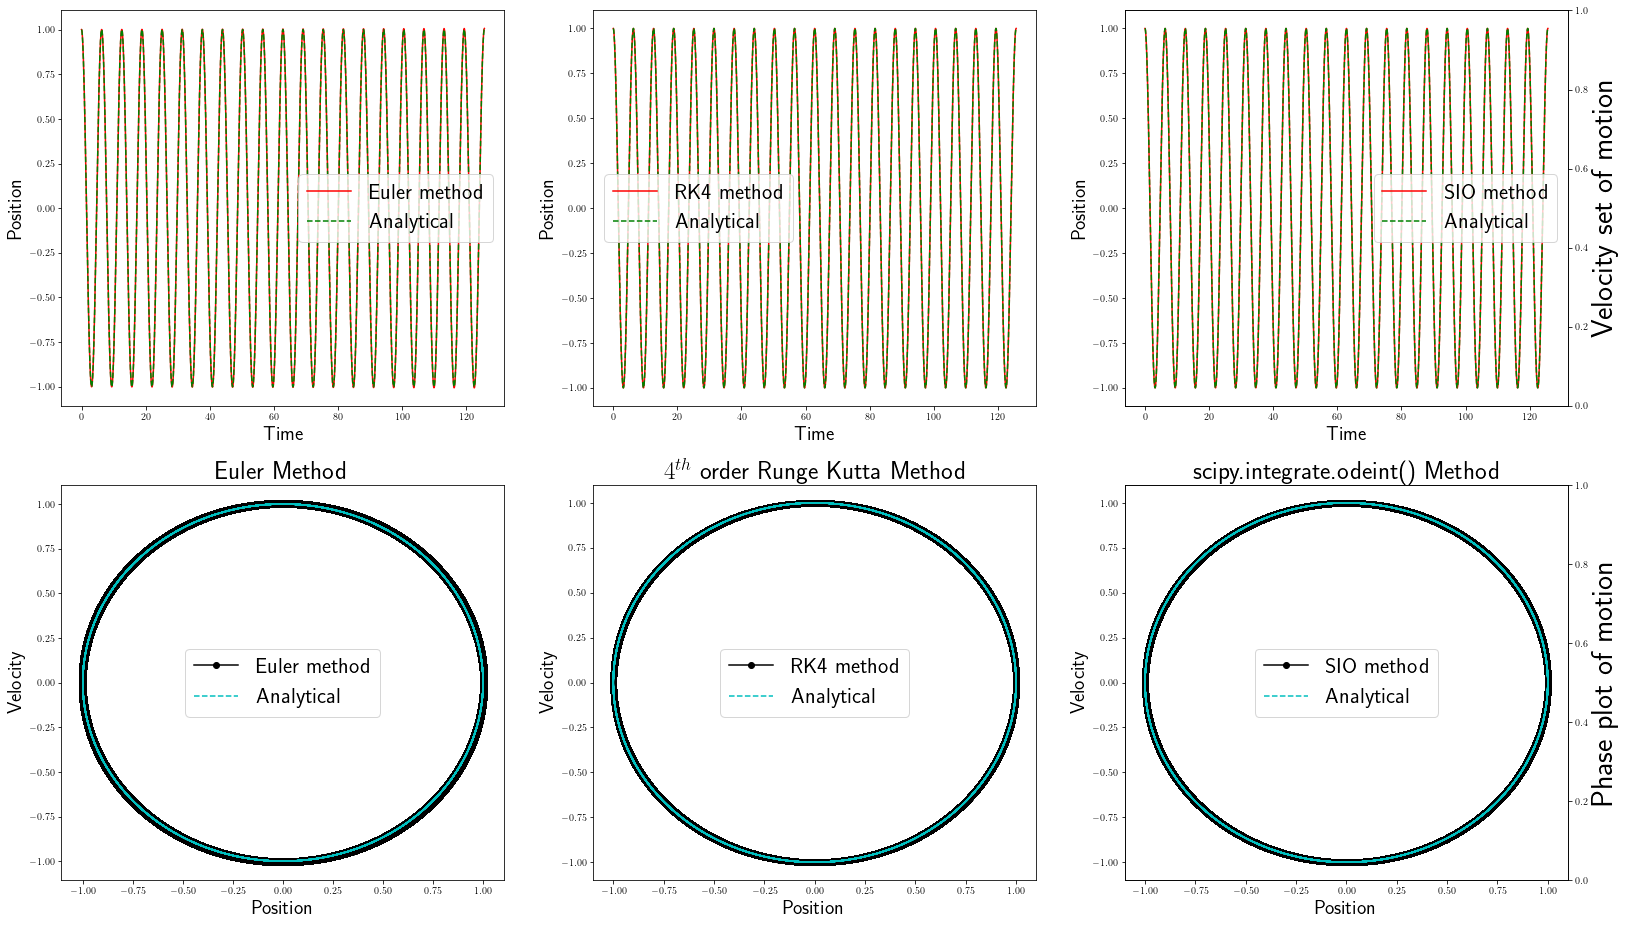

In [6]:
plt.rcParams["figure.figsize"] = (27,16)

plt.subplot(231)
plt.plot(T,Euler(f,x,T,n,h)[0],'r', T,X_analytic,'g--')
plt.xlabel('Time',size=20)
plt.ylabel("Position",size=20)
plt.legend(["Euler method","Analytical"],fontsize=22)

plt.subplot(232)
plt.plot(T,RK4_method(f,x,T,n,h)[0],'r', T,X_analytic,'g--')
plt.xlabel('Time',size=20)
plt.ylabel("Position",size=20)
plt.legend(["RK4 method","Analytical"],fontsize=22)

plt.subplot(233)
plt.plot(T,SIO_method(f,x,T)[0],'r', T,X_analytic,'g--')
plt.xlabel('Time',size=20)
plt.ylabel("Position",size=20)
plt.legend(["SIO method","Analytical"],fontsize=22)
plt.twinx()
plt.ylabel('Velocity set of motion',fontsize=30)

plt.subplot(234)
plt.plot(Euler(f,x,T,n,h)[0], Euler(f,x,T,n,h)[1],'ko-', X_analytic,V_analytic,'c--')
plt.title('Euler Method',fontsize=25)
plt.xlabel('Position',size=20)
plt.ylabel("Velocity",size=20)
plt.legend(["Euler method","Analytical"],fontsize=22)

plt.subplot(235)
plt.plot(RK4_method(f,x,T,n,h)[0], RK4_method(f,x,T,n,h)[1],'ko-', X_analytic,V_analytic,'c--')
plt.title('$4^{th}$ order Runge Kutta Method',fontsize=25)
plt.xlabel('Position',size=20)
plt.ylabel("Velocity",size=20)
plt.legend(["RK4 method","Analytical"],fontsize=22)

plt.subplot(236)
plt.plot(SIO_method(f,x,T)[0], SIO_method(f,x,T)[1],'ko-', X_analytic,V_analytic,'c--')
plt.title('scipy.integrate.odeint() Method',fontsize=25)
plt.xlabel('Position',size=20)
plt.ylabel("Velocity",size=20)
plt.legend(["SIO method","Analytical"],fontsize=22)
plt.twinx()
plt.ylabel('Phase plot of motion',fontsize=30)

plt.show()

Q3. Solve **Harmonic Oscillator** with velocity proportional damping $2bv$, $m=1 :$
$$ \displaystyle{\large m\frac{\text{d}^{2}x}{\text{dt}^{2}}=-m\omega^{2}x-2mb\frac{\text{d}x}{\text{dt}}} $$

$$\displaystyle{=>\large \frac{\text{d}^{2}x}{\text{dt}^{2}}=-\omega^{2}x-2b\frac{\text{d}x}{\text{dt}}}$$

Plot $(x-t)$ curve as well as $(v-x)$ curve for $\displaystyle{b<\omega,b=\omega,b>\omega }$

In [7]:
def f(X,t):
    x = X[0]
    v = X[1]
    dxdt = v
    dvdt = -w**2*x - 2*b*v
    return np.array([dxdt,dvdt])

W = [ 1.0, 1.0, 1.0 ]       # natural angular frequency 𝜔
B = [ 0.3, 1.0, 3.0 ]       # damping factor b
X0 = [ 1, 0 ]               # initial conditions of dependent variable 
t = np.arange ( 0, 30, 0.1) # time space
h = 0.1                     # step size
n = len(t)-1                # no. of steps

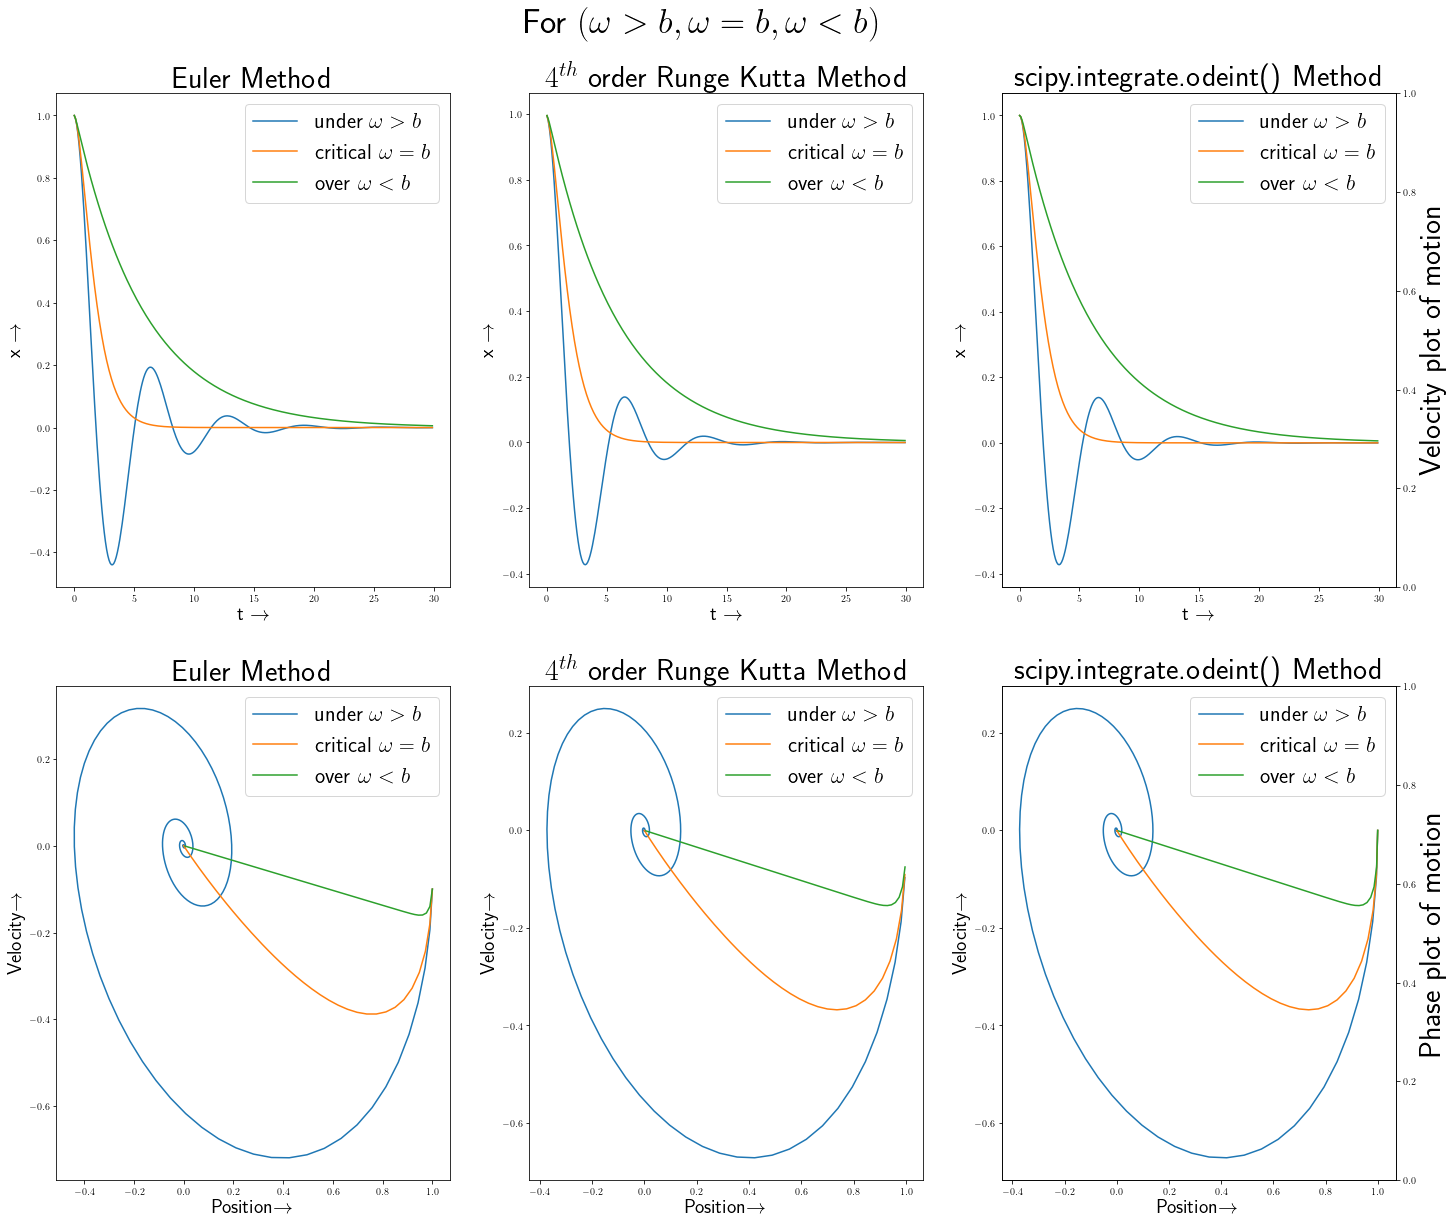

In [8]:
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (24,20)
plt.suptitle("For $(\omega>b,\omega=b,\omega<b)$",fontsize=35,y=0.94)
for w,b in zip(W,B):
    plt.subplot(231)
    plt.title('Euler Method',fontsize=30)
    plt.plot(t,Euler(f,X0,t,n,h)[0])
    plt.xlabel(r"t $\rightarrow$",size=20)
    plt.ylabel(r"x $\rightarrow$",size=20)
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    
    plt.subplot(232)
    plt.title( '$4^{th}$ order Runge Kutta Method',fontsize=30)
    plt.plot(t,RK4_method(f,X0,t,n,h)[0])
    plt.xlabel (r"t $\rightarrow$",size=20)
    plt.ylabel (r"x $\rightarrow$",size=20)
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    
    plt.subplot(233)
    plt.title( 'scipy.integrate.odeint() Method',fontsize=30)
    plt.plot(t,SIO_method(f,X0,t)[0])
    plt.xlabel (r"t $\rightarrow$",size=20)
    plt.ylabel (r"x $\rightarrow$",size=20)
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.twinx()
    plt.ylabel('Velocity plot of motion',fontsize=30)
    
    plt.subplot(234)
    plt.title('Euler Method',fontsize=30)
    plt.plot(Euler(f,X0,t,n,h)[0],Euler(f,X0,t,n,h)[1])
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    
    plt.subplot(235)
    plt.title( '$4^{th}$ order Runge Kutta Method',fontsize=30)
    plt.plot(RK4_method(f,X0,t,n,h)[0],RK4_method(f,X0,t,n,h)[1])
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    
    plt.subplot(236)
    plt.title( 'scipy.integrate.odeint() Method',fontsize=30)
    plt.plot(SIO_method(f,X0,t)[0],SIO_method(f,X0,t)[1])
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    plt.twinx()
    plt.ylabel('Phase plot of motion',fontsize=30)
plt.show()

# $$ \text{ASSIGNMENT 3} $$
Q1. Numerically solve the equation of **a underdamped periodically forced oscillator**.
$$\displaystyle{ m\frac{d^{2}x}{dt^{2}}+2mb\frac{dx}{dt}+m\omega^{2}x=A\cos(\varOmega t) }$$

$$\displaystyle{=>\frac{d^{2}x}{dt^{2}}=-2b\frac{dx}{dt}-\omega^{2}x+\frac{A}{m}\cos(\varOmega t)}$$

$\text{Take } m=1,b=0.3,\omega=1,\varOmega=2,A=3 \text{ at }t=0,x=1,v=0 $ 

 Plot the $x-t$ and $x-v$ curve. Comment about your observation.

In [1]:
def f(X,t,params):
    x,v=X[0],X[1]
    w,b,W,A,m=params
    dxdt=v
    dvdt= -2*b*v - w**2*x + (A/m)*np.cos(W*t)
    return np.array([dxdt,dvdt])
w=1
b=0.3
W=2
A=3
m=1
x=1
v=0
X0 = [x,v]
params=[w,b,W,A,m]

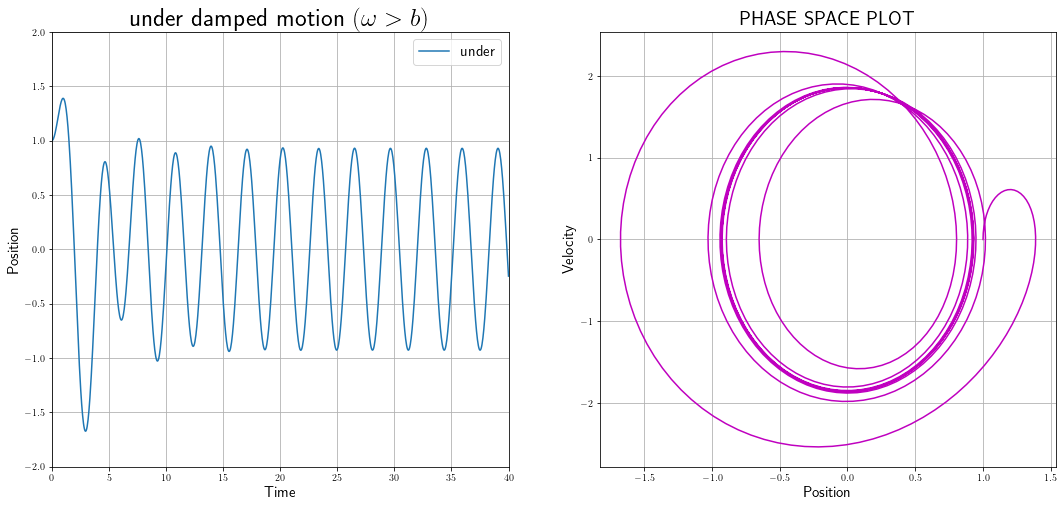

In [3]:
t = np.linspace (0,40,1000)
s = SI.odeint(f,X0,t, args=(params,))
x,v = s[:,0],s[:,1]
plt.subplot(121)
plt.plot(t,x)
plt.axis([0,40,-2,+2])
plt.grid()
plt.title(r"under damped motion $(\omega>b)$",fontsize=25)
plt.xlabel ("Time",size=15);plt.ylabel ("Position",size=15)
plt.legend(["under "],fontsize=15)
plt.subplot(122) 
plt.plot(x,v,'m')
plt.grid()
plt.title("PHASE SPACE PLOT",size=20)
plt.xlabel ("Position",size=15)
plt.ylabel ("Velocity",size=15)
plt.show()

#### Comment : 
     We know that the phase space plot does not cut but here it cuts. 
     Its mean that there must be any hidden variable which we have to take into account. 
     In this case, time is the hidden variable . 
     If we are to take it into account, then there will be no cuts in the x-v plot.

Q2.a) Modify the above equation to estimate **the amplitude of the steady oscillation**.

$ \quad \ $b) Modify prof 2(a) to simulate both **amplitude and velocity resonance**

The amplitude of steady state oscillation:  0.9284693772111109


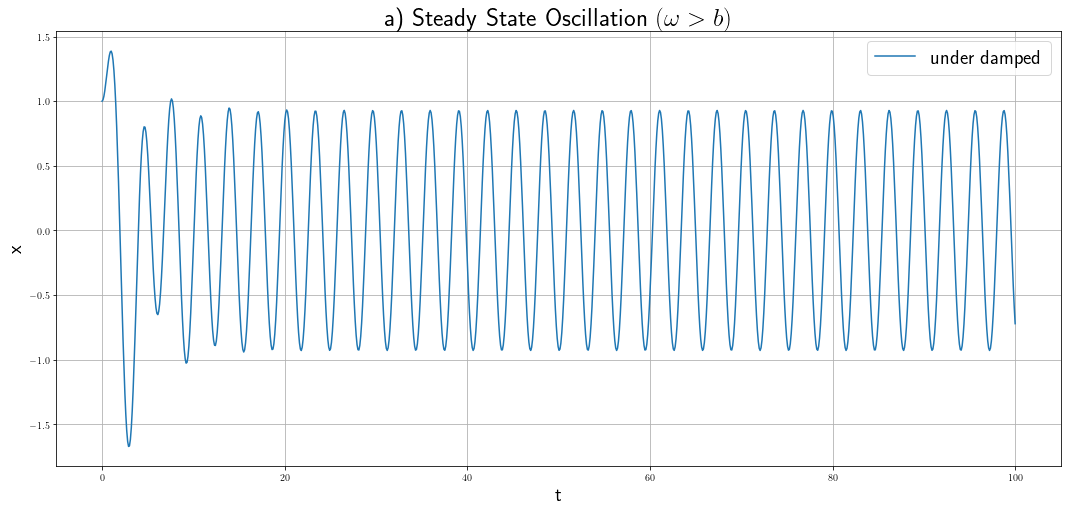

In [4]:
t= np.linspace (0,100,1000)  
s = SI.odeint(f,X0,t, args=(params,))
x,v = s[:,0],s[:,1]
print('The amplitude of steady state oscillation: ',max(x[500:]))

plt.plot(t,x)
plt.grid()
plt.title(r"a) Steady State Oscillation $(\omega>b)$",size=25)
plt.xlabel ("t",size=20)
plt.ylabel ("x",size=20)
plt.legend(["under damped"],fontsize=20)
plt.show()

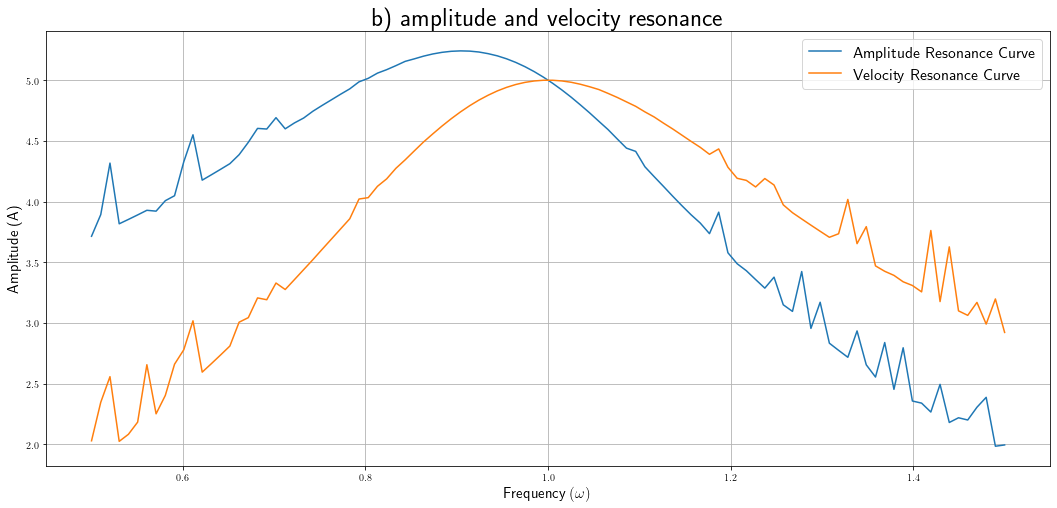

In [7]:
W = np.linspace(0.5, 1.5, 100)
w0=1
b=0.3
A=3
m=1
params=[w0,b,A,m]
V,X = [],[]
for w in W:
    def f(X,t,params):
        x,v=X[0],X[1]
        w0,b,A,m=params
        dxdt=v
        dvdt= -2*b*v - w0**2*x + (A/m)*np.cos(w*t)
        return np.array([dxdt,dvdt])
    X0 = [1, 0]
    t = np.linspace(2000, 4000, 1000)
    s = SI.odeint(f, X0, t, args=(params,))
    X.append(max(s[:, 0]))
    V.append(max(s[:, 1]))
plt.plot(W,X,label='Amplitude Resonance Curve')
plt.plot(W,V,label='Velocity Resonance Curve')
plt.xlabel(r'Frequency $(\omega)$',size=15)
plt.ylabel('Amplitude of velocity V_{0}',size=15)
plt.grid()
plt.title(r"b) amplitude and velocity resonance",size=25)
plt.ylabel('Amplitude (A)',size=15)
plt.legend(fontsize=16)
plt.show()

3) Solve **a nonlinear harmonic oscillator** and plot the time series and phase plot
$$ m\frac{d^{2}x}{dt^{2}}+m \omega^{2}x^{p}=0 \qquad \text{  for p=3,5,7,9 }$$

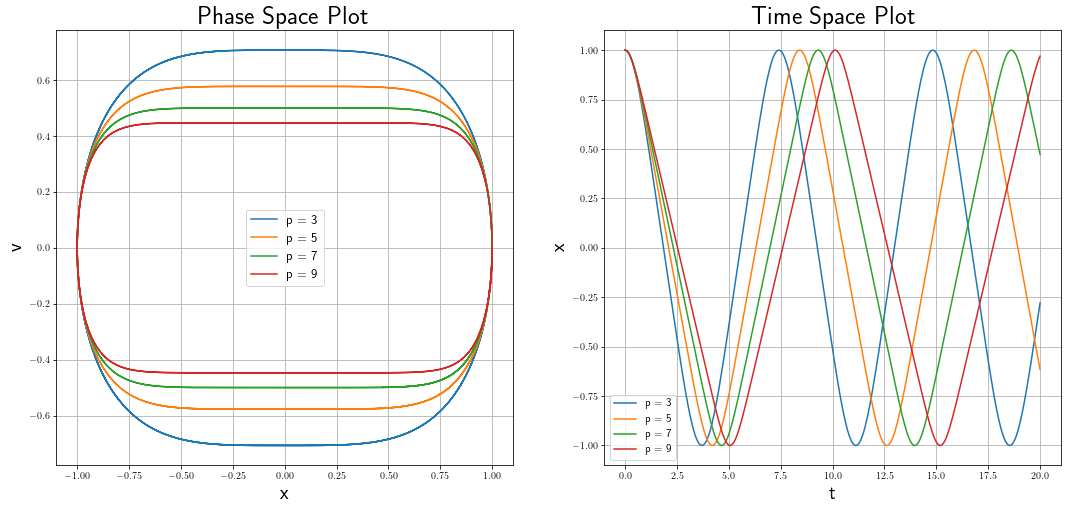

In [6]:
v0,j,w,x0 = 0,0,1,1
p = np.array([3,5,7,9])
X,V = [],[]

for i in p:
    def f(X,t): 
        x,v=X
        dx=v
        dv=-w**2*x**i
        return dx,dv
    T=np.linspace(0,20,350)
    X0=[1,0]
    s=SI.odeint(f,X0,T)
    X.append(s[:,0])
    V.append(s[:,1])       
plt.subplot(121)
plt.title("Phase Space Plot",size=25)   
plt.plot(X[0],V[0], X[1],V[1], X[2],V[2], X[3],V[3])
plt.legend(['p = 3','p = 5','p = 7','p = 9'],fontsize=13)
plt.xlabel ("x",size=20)
plt.ylabel ("v",size=20)
plt.grid()
plt.subplot(122)
plt.title("Time Space Plot",size=25)
plt.plot(T,X[0], T,X[1], T,X[2], T,X[3])
plt.legend(['p = 3','p = 5','p = 7','p = 9'],fontsize=11)
plt.xlabel ("t",size=20)
plt.ylabel ("x",size=20)
plt.grid()
plt.show()

# $$ \text{ASSIGNMENT 4} $$
Q1. Solve **a linear oscillator** and write the code to estimate **the frequency of oscillation**. Verify your program for three values of $\omega$.

The frequency of oscillation is 1.0001250781738587


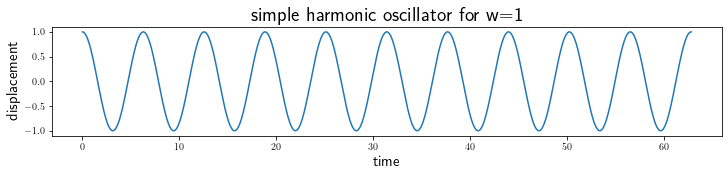

The frequency of oscillation is 2.0001111728738192


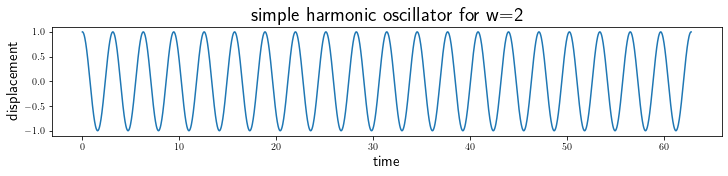

The frequency of oscillation is 3.00117962466488


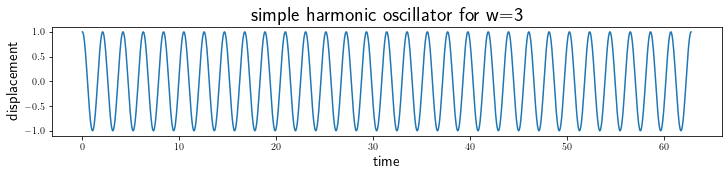

In [2]:
def F(X,t):
    x,v=X
    dx=v
    dv=-w**2*x
    return np.array([dx,dv])

W=[1,2,3]
plt.rcParams["figure.figsize"] = (12,2)
for w in W:
    N=2000
    T=np.linspace(0,20*np.pi,N)
    X0=[1,0]
    Xs=odeint(F,X0,T)
    Xt=Xs[:,0]
    T1=[]
    for i in range(1,N-1):
        if Xt[i-1]<Xt[i]>Xt[i+1]:
                T1.append(T[i])   
    AvTP=np.average(np.diff(T1))
    f=2*np.pi/AvTP
    print('The frequency of oscillation is', f)
    plt.plot(T,Xt)
    plt.xlabel('time',fontsize=15)
    plt.ylabel('displacement',fontsize=15)
    plt.title('simple harmonic oscillator for w='+str(w),fontsize=20)
    plt.show()

2. use your above code to simulate **the frequency-amplitude diagram of a nonlinear oscillator**
$$\large m\frac{d^{2}x}{dt^{2}}+m\omega^{2}x^{p}=0 \text{ for p=1,3,7,9}$$ 

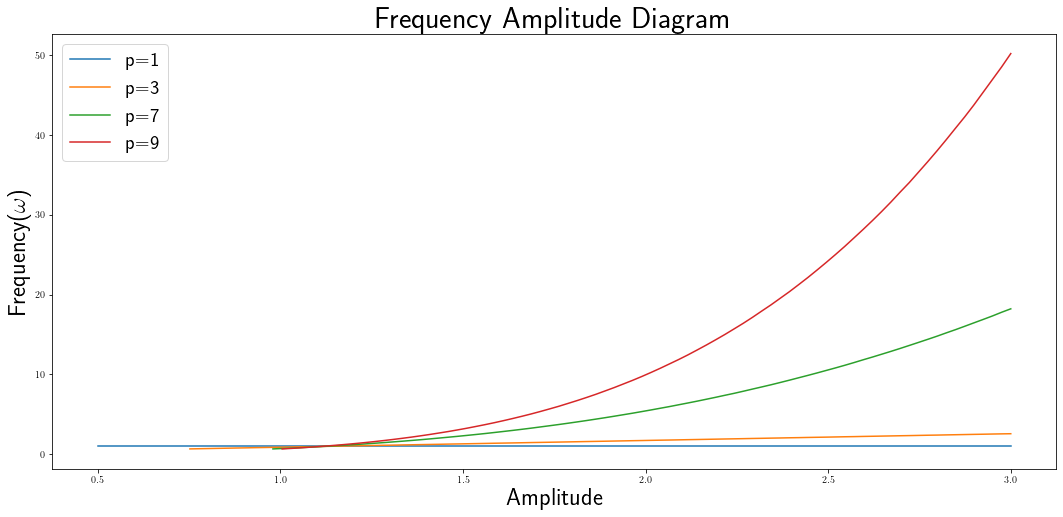

In [3]:
def f(X,t,k):
    x,v=X
    dx=v
    dv=-w**2*x**k
    return [dx,dv]
plt.rcParams["figure.figsize"] = (18,8)
p=[1,3,7,9]
w=1
H=1000
T=np.linspace(0,20,H)
A=np.linspace(0.5,3,100)

for i in p:
    W=[]
    for j in A:
        X0=[j,0]
        s=SI.odeint(f,X0,T,args=(i,))
        x=s[:,0]
        T1=[]
        for h in range(1,H-1):
            if x[h-1]<x[h]>x[h+1]:
                T1.append(T[h])
        Tp=np.mean(np.diff(T1))
        W.append(2*np.pi/Tp)
    plt.plot(A,W)
plt.title("Frequency Amplitude Diagram",size=30)
plt.ylabel("Frequency($\omega$)",size=24)
plt.xlabel("Amplitude",size=24)
plt.legend(['p=1','p=3','p=7','p=9'],fontsize=20)
plt.show()

### Comment :  
                   with the increase in non-linearty we are getting a more frequency dependent amplitude.

Q3. Study **a full amplitude pendulum**

$$\large m\frac{d^{2}x}{dt^{2}}+2mb\frac{dx}{dt}+m\omega^{2}\sin(x)=A\cos(\varOmega t)$$

$$\large => \frac{d^{2}x}{dt^{2}}+2b\frac{dx}{dt}+\omega^{2}\sin(x)=\frac{A}{m}\cos(\varOmega t)$$

$$\large => \frac{d^{2}x}{dt^{2}} = \frac{A}{m}\cos(\varOmega t)-2b\frac{dx}{dt}-\omega^{2}\sin(x)$$

   Take $m=1,b=0.25,A=\frac{2}{3},\omega=1,\varOmega=\frac{2}{3}$ 

   a) plot $x-t$ in both the cases and plot $x-v$ in both the cases
   
   b) and there after vary $A=[1.0,1.2]$ same as of (a) 
   
   c) use initial condition as (1,0) and (1.0001,0). 
   
$\qquad$Let the solutions of x in this two cases of initial conditions be $x_{1}$ and $x_{2}$.  $ \\ $

$\qquad$Let $\Delta x=|x_{1}-x_{2}|$.  $ \\ $

$\qquad$Plot $\Delta x-t$ curve for $ A=[1.0,1.2]$.
   
   d) Put comments on your observations in (a)-(c).
### Case i : For $ A=\frac{2}{3}$

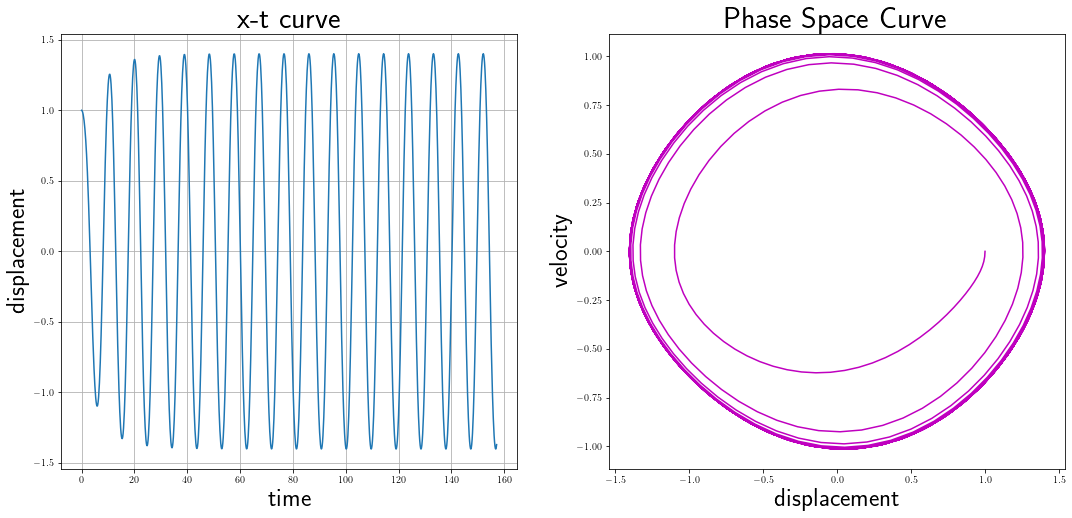

In [4]:
def F(X,t):
    x,v = X
    dx = v
    dv = -w**2*np.sin(x) - 2*b*v + A*np.cos(W*t)
    return np.array([dx,dv])

b,w,W,A = 0.25,1,(2/3),(2/3)    
T = np.linspace(0,50*np.pi/w,1000)
X0 = [1,0]
Xs1 = odeint(F,X0,T)
Xt,Vt = Xs1[:,0],Xs1[:,1]

plt.subplot(121)
plt.plot(T,Xt)
plt.grid()
plt.xlabel('time', size=25)
plt.ylabel('displacement', size=25)
plt.title('x-t curve ', size=30)

plt.subplot(122)
plt.plot(Xt,Vt,'m')
plt.ylabel('velocity', size=25)
plt.xlabel('displacement', size=25)
plt.title('Phase Space Curve', size=30)
plt.show()

### Case ii : For A=[1.0,1.2]

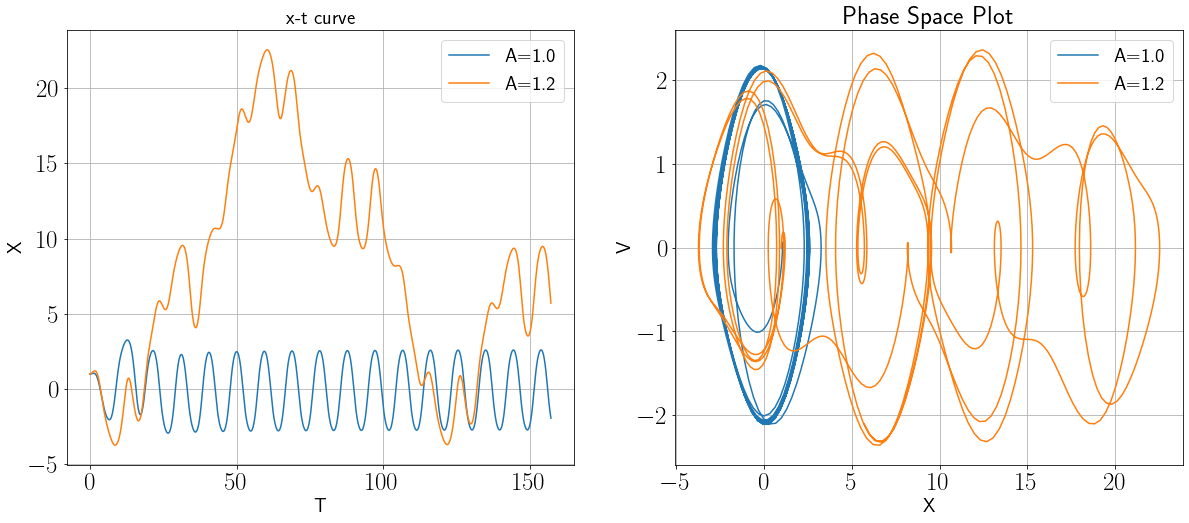

In [160]:
b,w,W=0.25,1,(2/3)
T=np.linspace(0,50*np.pi/w,1000)
a=[1,1.2]
X,V=[],[]

    
for i in a:   
    def F(X,t):
        x,v=X
        dx=v
        dv=-w**2*np.sin(x) -2*b*v +i*np.cos(W*t)
        return np.array([dx,dv])
    X0=[1,0]
    Xs1=SI.odeint(F,X0,T)
    X.append(Xs1[:,0])
    V.append(Xs1[:,1])
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))    
ax2.plot(X[0],V[0],X[1],V[1])
ax2.legend(['A=1.0','A=1.2'],fontsize=20)
ax2.set_title("Phase Space Plot",size=25)
ax2.set_xlabel ("X",size=20)
ax2.set_ylabel ("V",size=20)
ax2.grid()
ax1.plot(T,X[0],T,X[1])
ax1.legend(['A=1.0','A=1.2'],fontsize=20)
ax1.set_title('x-t curve ',size=20)
ax1.set_xlabel ("T",size=20)
ax1.set_ylabel ("X",size=20)
ax1.grid()
plt.show()

<Figure size 1800x800 with 0 Axes>

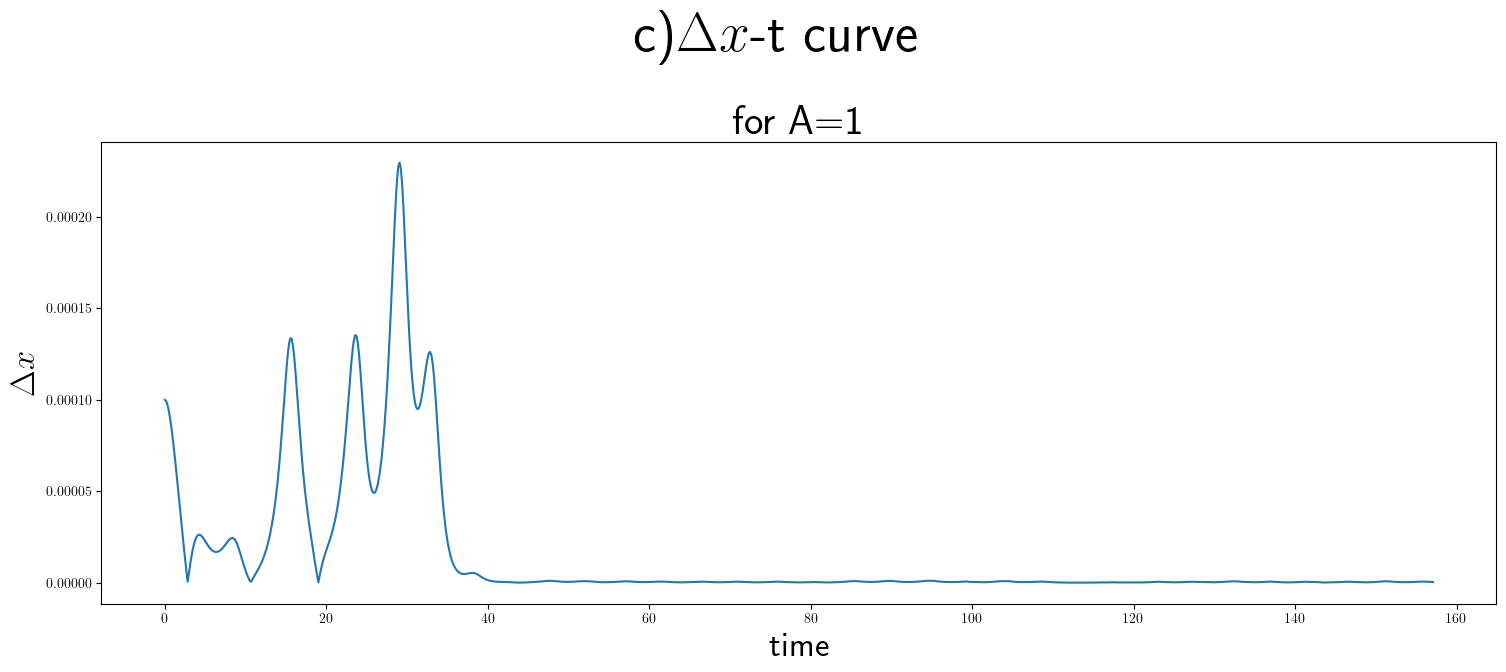

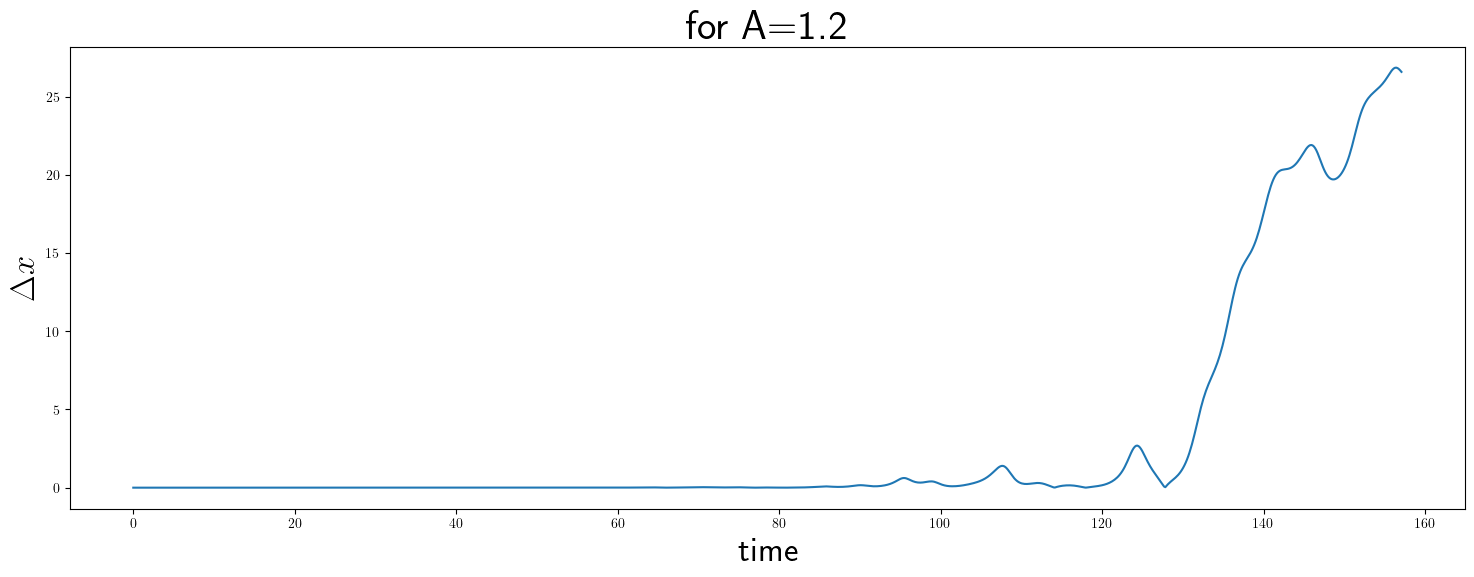

In [4]:
b,w,W=0.25,1,(2/3)
T=np.linspace(0,50*np.pi/w,1000)
a=[1,1.2]

for i in a:    
    def F(X,t):
        x,v=X
        dx=v
        dv=-w**2*np.sin(x) -2*b*v +i*np.cos(W*t)
        return np.array([dx,dv])  
    
    X0=[1.0001,0]
    Xs2=odeint(F,X0,T)
    Xt2,Vt2=Xs2[:,0],Xs2[:,1]
    X_0=[1,0]
    Xs1=odeint(F,X_0,T)
    Xt1,Vt1=Xs1[:,0],Xs1[:,1]
    delx=np.abs(Xt1-Xt2)
    plt.suptitle('c)$\Delta x$-t curve',y=1.1,size=40)
    plt.subplots(figsize=(18,6))
    plt.plot(T,delx)
    plt.ylabel('$\Delta x$',size=25)
    plt.xlabel('time',size=25)
    plt.title(' for A='+str(i),size=30)
plt.show()

#### Comment : 
    In nonlinear oscillator the phase-space plot shifts from ellipse and also we get frequancy dependent amplitude.

<IPython.core.display.Math object>

Text(0.5, 1.0, 'Normalized ground state Wave function 1 D harmonic oscillator\n\n')

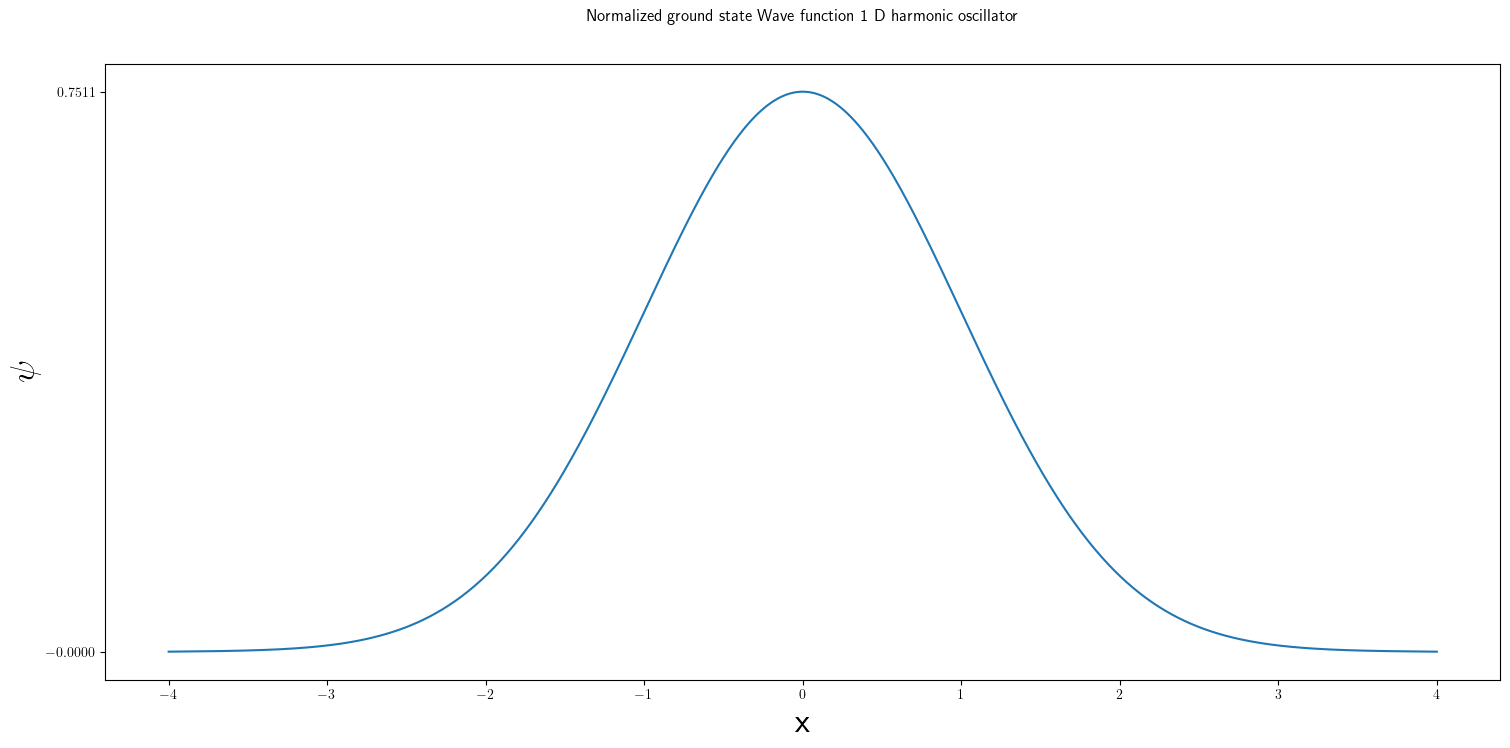

In [4]:
def f(PSI,x,e):   # function for Schr eqn
    psi, psid=PSI
    dpsi=psid
    dpsid=-(e-x**2)*psi
    return [dpsi, dpsid]

def schr(e):      # function for bisection
    P=SI.odeint(f,PSI0,X,args=(e,))
    shy =P[-1,0] # 
    return(shy)

xmax=4 # higher higher excited states
oe=1   # set -1 for odd
X=np.linspace(0,xmax,100)
PSI0=[1,0]

ecr=SOP.bisect(schr,0.9,1.1) # set app  limits

display(Math(r'\lambda :'+latex(ecr)))

X1=np.linspace(0,xmax,500)
P=SI.odeint(f,PSI0, X1,args=(ecr,))
P2=oe*np.flipud(P)                   #*oe
PT=np.vstack((P2[:-1],P))
si=PT[:,0]
X=np.linspace(-xmax,xmax,999)
N=1.0/SI.simps(si*si, X)
si*=np.sqrt(N)
simin, simax=min(si), max(si)

plt.plot(X,si)
plt.xlabel('x',fontsize=25)
plt.yticks([simin,simax])
plt.ylabel(r'$\psi$',fontsize=25)
plt.title('Normalized ground state Wave function 1 D harmonic oscillator\n\n')

The $\text{Sch}\ddot{\text{r}}\text{odinger}$ equation reads                             
$$\displaystyle{-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+V(x)\psi=E\psi}$$ 

1. Use shooting method to solve particle in a box problem. Box is from 0 ≪ x ≪ a.  
   Find the ground, the first and the fourth excited state (n=5)
   
   Inside the box of a given length a , the potential is zero 
   and outside of the box , the potential is infinite.                                                                         
   Wavefunction must be zero outside the box since potential energy can't be infinite!
   
   As $V(x)=0$   The $\text{Sch}\ddot{\text{r}}\text{odinger}$ equation now reads                             
$$\displaystyle{-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}=E\psi}$$ 

$$=>\displaystyle{\frac{d^2\psi}{dx^2}=-\frac{2mE}{\hbar^2}\psi}$$ 

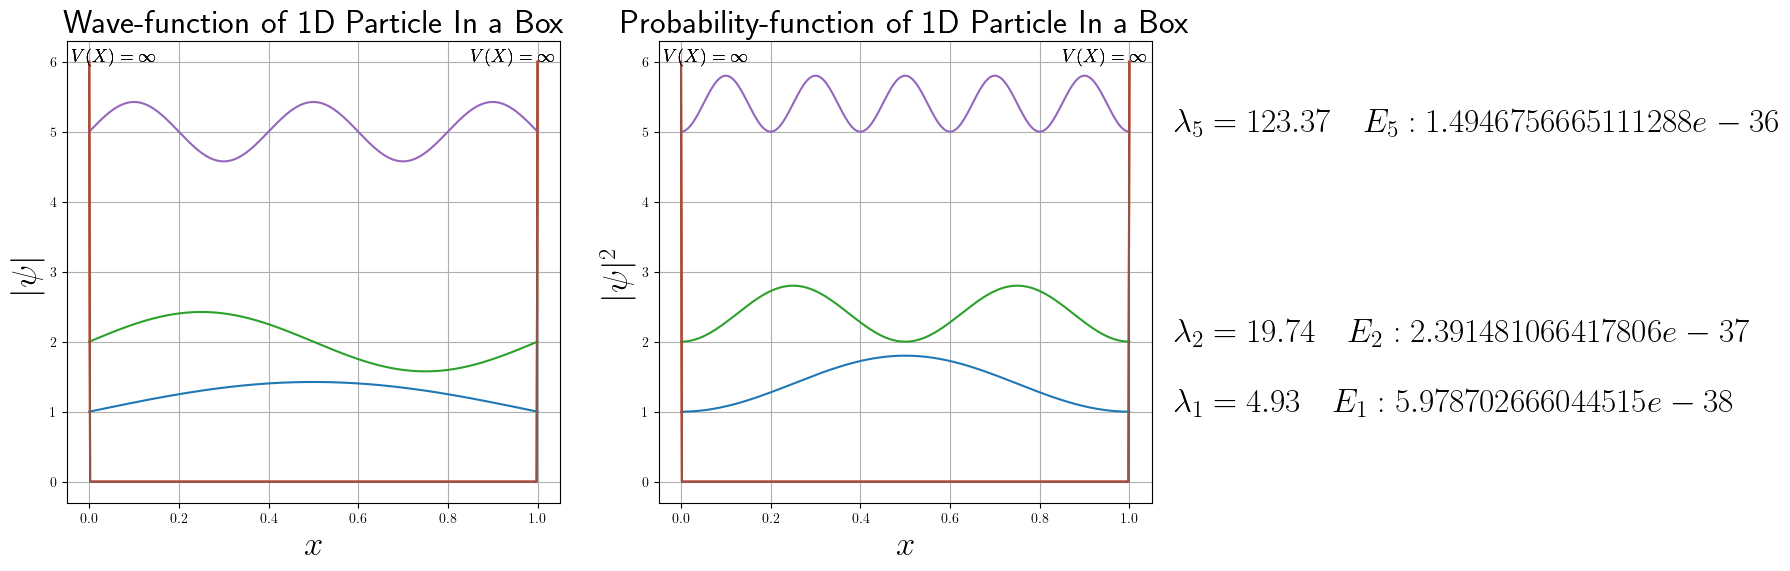

In [14]:
def bParticle(xmax,a,b,n):
    X=np.linspace(0,xmax,100)
    PSI0=[0,1]
    oe=-1
    def f(PSI,x,e):# function for Schr eqn
        psi, psid=PSI
        dpsi=psid
        dpsid=-2*e*psi
        return [dpsi, dpsid]

    def schr(e): # function for bisection
        P=SI.odeint(f,PSI0,X,args=(e,))
        shy =P[-1,0] # 
        return(shy)

    ecr=SOP.bisect(schr,a,b) # set app  limits
    #print ('eigenvalue of state n = ',n,' is ', ecr)
    X1=np.linspace(0,xmax,500)
    P=SI.odeint(f,PSI0, X1,args=(ecr,))
    si=P[:,0]
    N=1.0/SI.simps(si*si, X1)
    si*=np.sqrt(N)
    return n,X1,si,ecr
    

def V(x):
    v = np.ones(x.shape)*6
    for i, _x in enumerate(x):
        if ((_x > 0) & (_x < 1)) :
            v[i] = 0
    return v

m = 9.1e-31          # mass of electron
hbar = 1.05e-34      # Planck's constrant
xmax=1
a=[4.7,19.5,123.2]
b=[5.1,20.1,123.5]
n=[1,2,5]

fig,(a1,a2)=plt.subplots(1,2,figsize=(14,6))
for i in range(len(n)):
    n1,X,si,ecr=bParticle(xmax,a[i],b[i],n[i])
    E=(n1**2 * np.pi** 2 * hbar**2 ) / (2 * m * xmax**2)

    a1.plot(X,0.3*si+n1)
    a1.set_xlabel(r'$x$',size=25)
    a1.grid()
    a1.set_ylabel(r'$|\psi|$',fontsize=25)
    a1.set_title('Wave-function of 1D Particle In a Box',fontsize=24)
    a1.plot(X,V(X))
    a1.text(-0.04,6,r'$V(X)=\infty$',fontsize=13)
    a1.text(0.85,6,r'$V(X)=\infty$',fontsize=13)
    a2.plot(X,0.4*si**2+n1)
    a2.set_xlabel(r'$x$',size=25)
    a2.grid()
    a2.set_ylabel(r'$|\psi|^2$',fontsize=25)
    a2.set_title('Probability-function of 1D Particle In a Box',fontsize=24)
    a2.plot(X,V(X))
    a2.text(1.1,n1,r'$\lambda_{}={:.2f} \quad E_{}:{}$'.format(n1,ecr,n1,E),fontsize=24)
    a2.text(-0.04,6,r'$V(X)=\infty$',fontsize=13)
    a2.text(0.85,6,r'$V(X)=\infty$',fontsize=13)
plt.show()

2. Use shooting method to solve particle in a box problem. Box is from $−\frac{a}{2}≪ x ≪\frac{a}{2}$.                      
   Find the ground, the first, and the fourth excited state (n=5). Use symmetry.

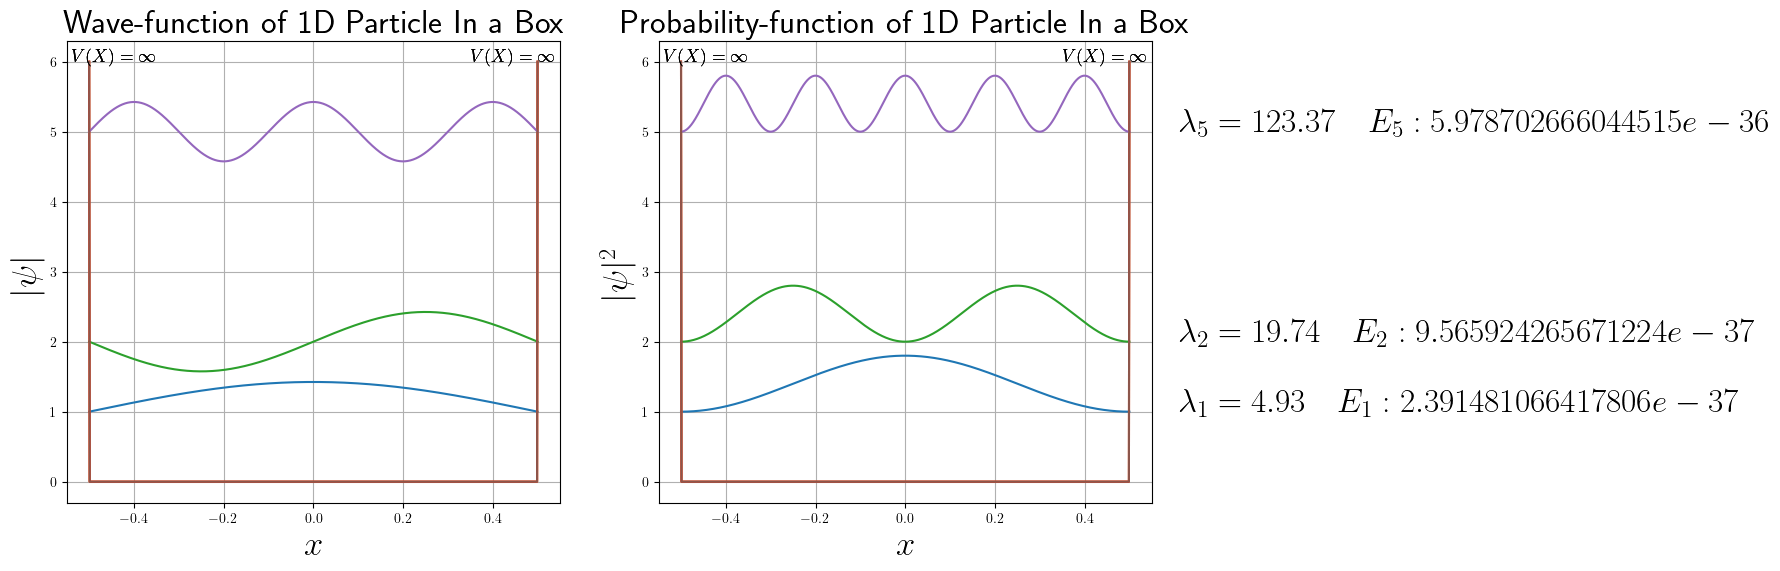

In [16]:
def bParticle(xmax,a,b,n,oe,PSI0):
    X=np.linspace(0,xmax,100)
    #PSI0=[1,0]
    def f(PSI,x,e):# function for Schr eqn
        psi, psid=PSI
        dpsi=psid
        dpsid=-2*e*psi
        return [dpsi, dpsid]

    def schr(e): # function for bisection
        P=odeint(f,PSI0,X,args=(e,))
        shy =P[-1,0] # 
        return(shy)

    ecr=SOP.bisect(schr,a,b) # set app  limits
    #print ('eigenvalue of state n = ',n,' is ', ecr)
    X1=np.linspace(0,xmax,500)
    P=SI.odeint(f,PSI0, X1,args=(ecr,))
    P2=oe*np.flipud(P)
    PT=np.vstack((P2[:-1],P))
    si=PT[:,0]
    X=np.linspace(-xmax,xmax,999)
    N=1.0/SI.simps(si*si, X)
    si*=np.sqrt(N)
    return n,X,si,ecr

xmax=0.5
a=[4.7,19.5,123.1]
b=[5.1,20.0,123.5]
n=[1,2,5]
oe=[1,-1,1]
PSI0=[[1,0],[0,1],[1,0]]
def V(x):
    v = np.ones(x.shape)*6
    for i, _x in enumerate(x):
        if ((_x > -xmax) & (_x < xmax)) :
            v[i] = 0
    return v

fig,(a1,a2)=plt.subplots(1,2,figsize=(14,6))
for i in range(len(n)):
    n1,X,si,ecr=bParticle(xmax,a[i],b[i],n[i],oe[i],PSI0[i])
    E=(n1**2 * np.pi** 2 * hbar**2 ) / (2 * m * xmax**2)

    a1.plot(X,0.3*si+n1)
    a1.set_xlabel(r'$x$',size=25)
    a1.grid()
    a1.set_ylabel(r'$|\psi|$',fontsize=25)
    a1.set_title('Wave-function of 1D Particle In a Box',fontsize=24)
    a1.plot(X,V(X))
    a1.text(-0.54,6,r'$V(X)=\infty$',fontsize=13)
    a1.text(0.35,6,r'$V(X)=\infty$',fontsize=13)
    a2.plot(X,0.4*si**2+n1)
    a2.set_xlabel(r'$x$',size=25)
    a2.grid()
    a2.set_ylabel(r'$|\psi|^2$',fontsize=25)
    a2.set_title('Probability-function of 1D Particle In a Box',fontsize=24)
    a2.plot(X,V(X))
    a2.text(0.61,n1,r'$\lambda_{}={:.2f} \quad E_{}:{}$'.format(n1,ecr,n1,E),fontsize=24)
    a2.text(-0.54,6,r'$V(X)=\infty$',fontsize=13)
    a2.text(0.35,6,r'$V(X)=\infty$',fontsize=13)
plt.show()

3. A) Use shooting method to solve particle in a potential well.
$$\begin{equation*}
V(x)=  \left\{
\begin{array}{rl}
-V_0 & \text{ for } -\frac{a}{2} \leq x \leq \frac{a}{2},\\
\\
0 & \text{otherwise } .
\end{array} \right.
\end{equation*}$$
Find the ground state, first excited state and the fourth excited state.

In region $-\frac{a}{2}<x<\frac{a}{2}, \ V(x)=-V_o,$ and the $\text{Sch}\ddot{\text{r}}\text{odinger}$ equation reads                             
$$\displaystyle{-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}-V_o\psi=E\psi}$$                                                         
$$or,\displaystyle{-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}=V_o\psi+E\psi}$$                                                         
$$or,\displaystyle{\frac{d^2\psi}{dx^2}=-\frac{2m}{\hbar^2}(V_o+E)\psi}$$                                                         
$$or,\qquad\qquad\displaystyle{\frac{d^2\psi}{dx^2}=-l^2\psi}$$                                                         

where , $ \displaystyle{l^2=\frac{2m}{\hbar^2}(V_o+E) => l=\frac{\sqrt{2m(V_o+E)}}{\hbar}} $

In region $x<-\frac{a}{2}, \ V(x)=0,$ and the $\text{Sch}\ddot{\text{r}}\text{odinger}$ equation reads                             
  
$$\displaystyle{-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}=E\psi}$$                                                                     
$$or,\displaystyle{\frac{d^2\psi}{dx^2}=-\frac{2m}{\hbar^2}E\psi}$$                                                              
$$or,\qquad\qquad\displaystyle{\frac{d^2\psi}{dx^2}=k^2\psi}$$  

where , $ \displaystyle{k^2=\frac{-2m}{\hbar^2}E => k=\frac{\sqrt{-2mE}}{\hbar}} $


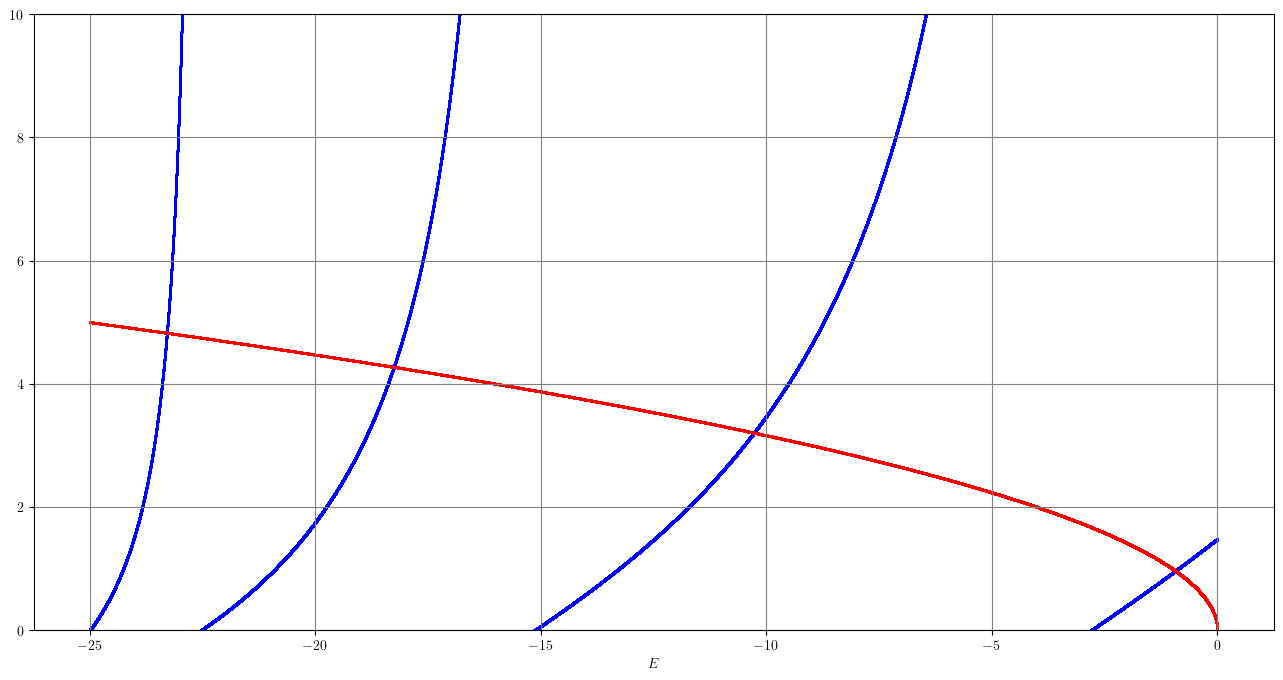

In [22]:
V0 = 25
E = np.linspace(-V0, 0, 100000)

RHS = np.sqrt(-E)
LHS1 = np.sqrt(E+V0)*np.tan(np.sqrt(E+V0))
LHS2 = -np.sqrt(E+V0)/np.tan(np.sqrt(E+V0+1e-9))

plt.figure(figsize=(16,8))
plt.scatter(E, LHS1, s=1,color='blue')
plt.scatter(E, LHS2, s=1, color='blue')
plt.scatter(E, RHS, s=1, color='red')
plt.ylim(0,10)
plt.grid(color='grey')
plt.xlabel('$E$')
plt.show()

In [23]:
def bParticle(xmax,a,b,v,n):
    X=np.linspace(0,xmax,100)
    PSI0=[1,0]
    oe=1
    def f(PSI,x,v,e):# function for Schr eqn
        psi, psid=PSI
        dpsi=psid
        if -0.5<x<0.5:
            dpsid=-v*psi-2*e*psi
        else:
            dpsid=-2*e*psi
        return [dpsi, dpsid]

    def schr(e): # function for bisection
        P=SI.odeint(f,PSI0,X,args=(v,e))
        shy =P[-1,0] # 
        return(shy)
    
    ecr=SOP.bisect(schr,a,b) # set app  limits
    X1=np.linspace(0,xmax,500)
    P=SI.odeint(f,PSI0, X1,args=(v,ecr))
    P2=oe*np.flipud(P)
    PT=np.vstack((P2[:-1],P))
    si=PT[:,0]
    X=np.linspace(-xmax,xmax,999)
    N=1.0/SI.simps(si*si, X)
    si*=np.sqrt(N)
    return n,X,si,ecr

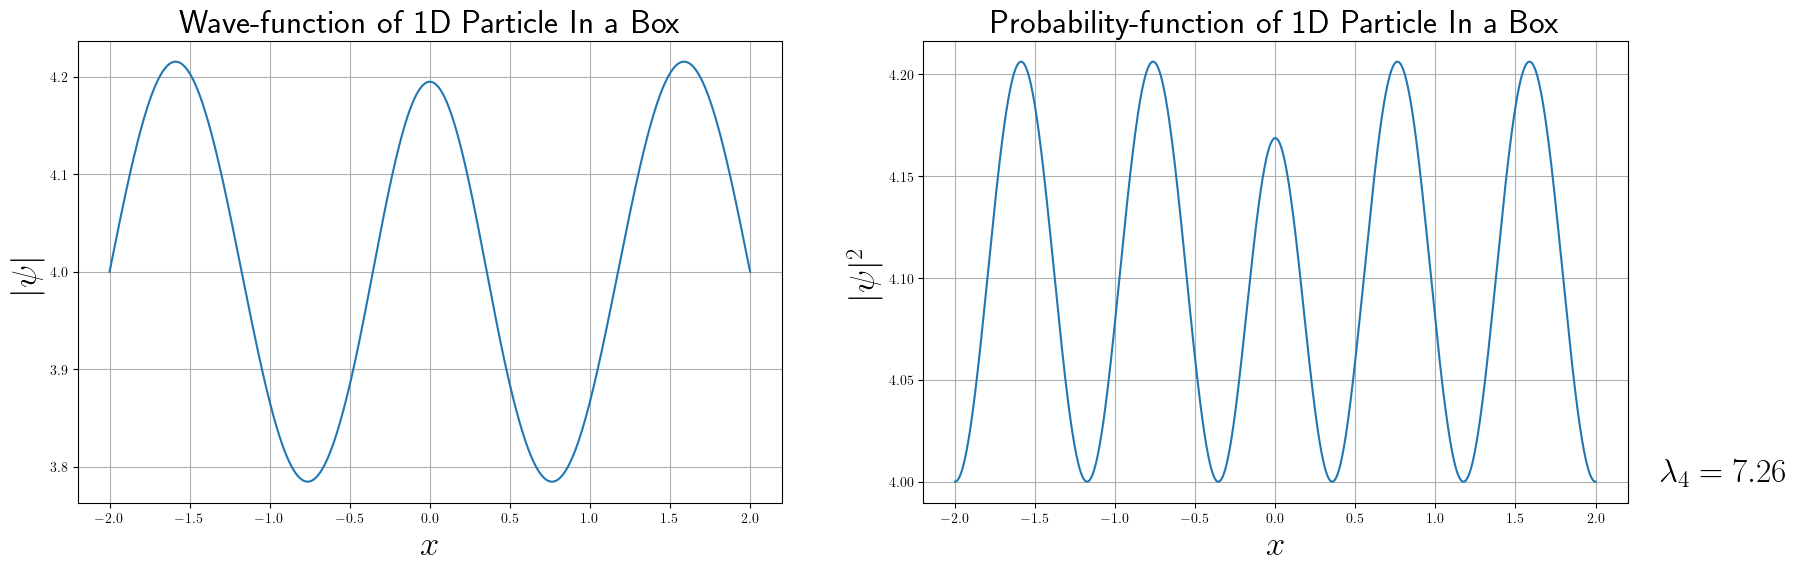

In [24]:
xmax=2
a=[7.0]
b=[7.5]
v=4
n=[5]

fig,(a1,a2)=plt.subplots(1,2,figsize=(20,6))

for i in range(len(n)):
    
    n1,X,si,ecr=bParticle(xmax,a[i],b[i],n[i],v)
   
    a1.plot(X,0.3*si+n1)
    a1.set_xlabel(r'$x$',size=25)
    a1.grid()
    a1.set_ylabel(r'$|\psi|$',fontsize=25)
    a1.set_title('Wave-function of 1D Particle In a Box',fontsize=24)
    #a1.plot(X,V(X))
    #a1.text(-0.04,6,r'$V(X)=\infty$',fontsize=13)
    #a1.text(0.85,6,r'$V(X)=\infty$',fontsize=13)
    a2.plot(X,0.4*si**2+n1)
    a2.set_xlabel(r'$x$',size=25)
    a2.grid()
    a2.set_ylabel(r'$|\psi|^2$',fontsize=25)
    a2.set_title('Probability-function of 1D Particle In a Box',fontsize=24)
    #a2.plot(X,V(X))
    a2.text(2.4,n1,r'$\lambda_{}={:.2f}$'.format(n1,ecr),fontsize=24)
    #a2.text(-0.04,6,r'$V(X)=\infty$',fontsize=13)
    #a2.text(0.85,6,r'$V(X)=\infty$',fontsize=13)
plt.show()

Q1. The effective 1-D equation for is a dimensionless form is
$$\displaystyle\Bigg( \frac{d}{d \rho^2} - \frac{l(l+1)}{\rho^2} + \frac{2Z}{\rho} - 2\gamma\Bigg)u = 0 \qquad \text{ where } \displaystyle\rho = \frac{r}{a}, \gamma=-\frac{E}{\frac{e^2}{a}},a=\frac{\hbar^2}{me^2}=\text{ Bohr Radius}$$

Use Shooting method to find out the eigenvalues ($\gamma$) and normalized eigenvectors in 1s,2s, 3s, 3p and 3d states (Take Z=1)

In [29]:
def state(xmax,l,a,b,fn,z=1):
    
    X=np.linspace(1e-10,xmax,100)
    PSI0=[0,1]

    def f(PSI,x,l,z,e):
        psi, psid=PSI
        dpsi=psid
        dpsid=((l*(l+1)/(x*x))-(2*z/x)+(2*e))*psi
        return [dpsi, dpsid]

    def schr(e): 
        P=SI.odeint(f,PSI0,X,args=(l,z,e))
        shy =P[-1,0] # 
        return(shy)

    ecr=SOP.bisect(schr,a,b) 
    #display(Math (r'\lambda_{} : '.format(fn)+latex(ecr)))

    X1=np.linspace(1e-10,xmax,500)
    P=SI.odeint(f,PSI0, X1,args=(l,z,ecr))
    si=P[:,0]
    X=np.linspace(0,xmax,500)
    N=1.0/SI.simps(si*si, X)
    si*=np.sqrt(N)
    plt.plot(X1,si,label=r'${} , \lambda : {}$'.format(fn,ecr))
    plt.legend(fontsize=20)
    plt.grid(True)
    return None

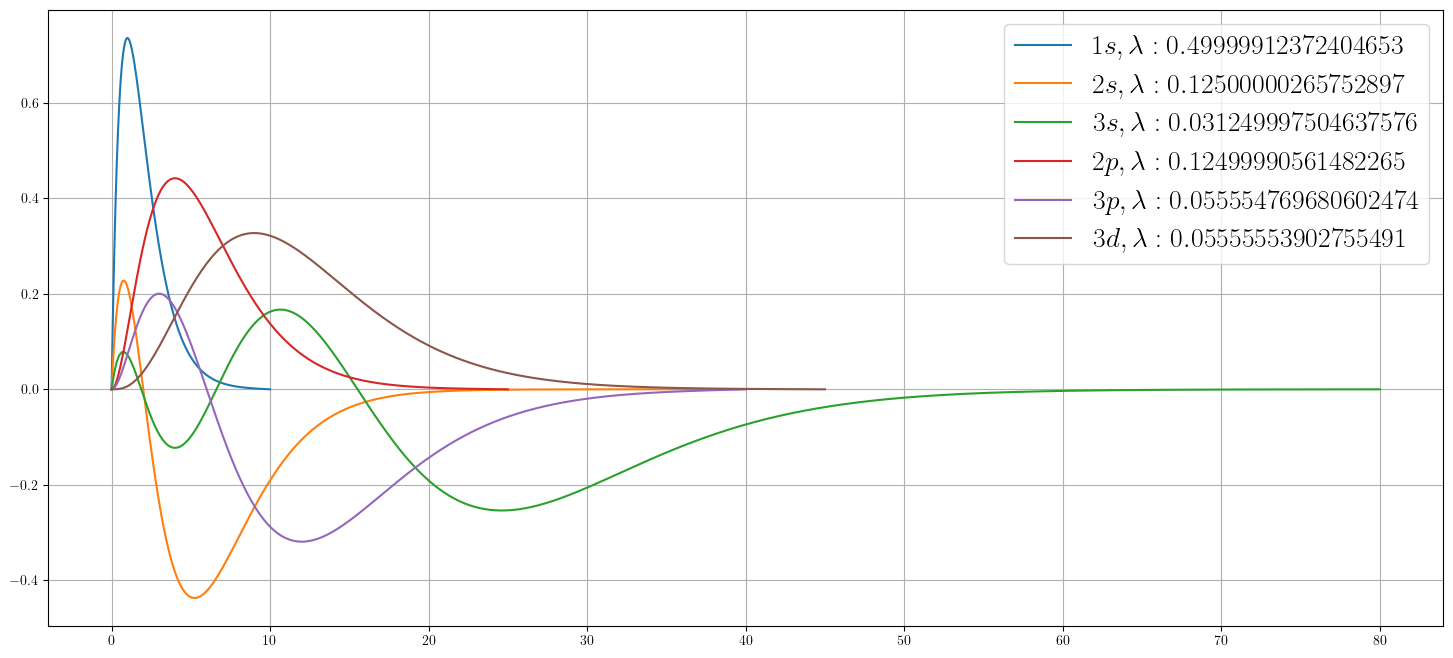

In [30]:
state( 10, 0, 0.400, 1.000,'{1s}')
state( 40, 0, 0.121, 0.127,'{2s}')
state( 80, 0, 0.020, 0.050,'{3s}')
state( 25, 1, 0.100, 0.200,'{2p}')
state( 40, 1, 0.050, 0.060,'{3p}')
state( 45, 2, 0.050, 0.060,'{3d}')

Q2. Repeat the above problem for 1s state with Z=1,2,4 and superpose the plots of the normalized eigenvectors

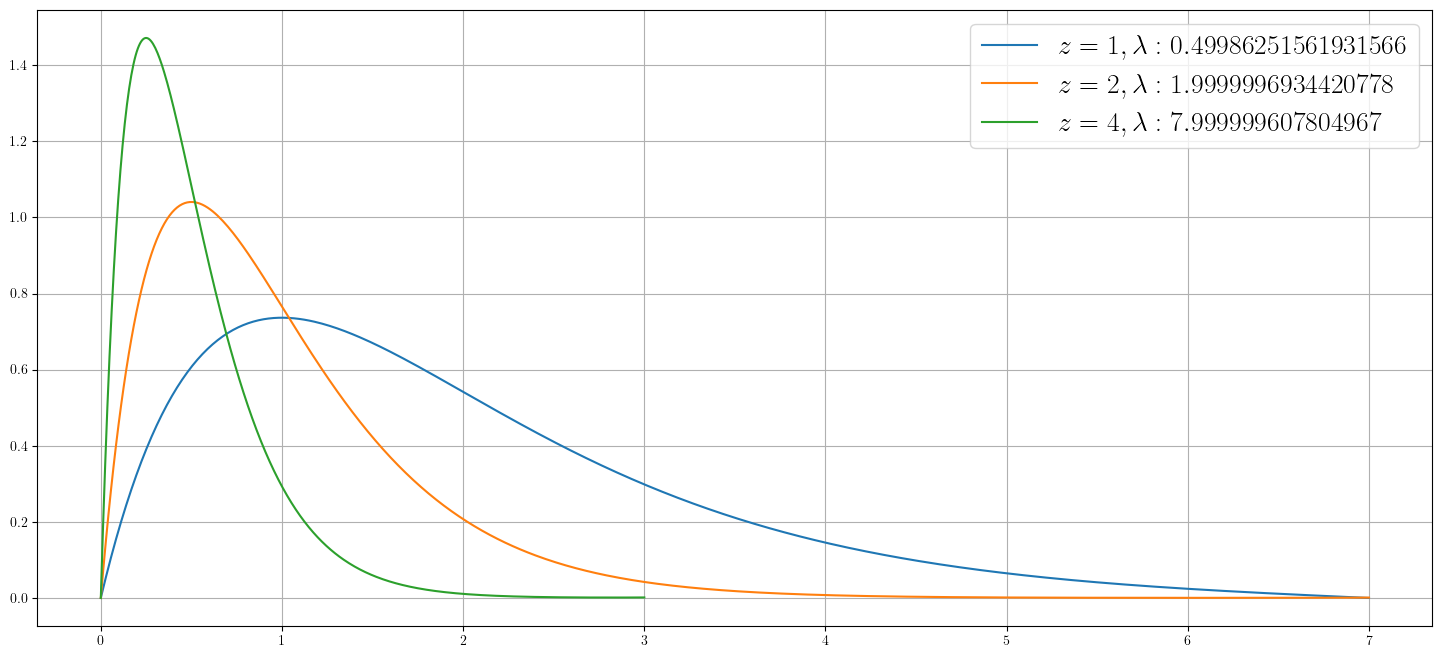

In [31]:
state( 7, 0, 0.40, 0.6,'{z=1}', 1)
state( 7, 0, 1.50, 2.3,'{z=2}', 2)
state( 3, 0, 7.85, 8.3,'{z=4}', 4)

Q3. Instead of Coulombic potential if a Screened coulomb potential $\displaystyle V(r) = -\frac{e^2}{r} \exp\Big(-\frac{r}{b}\Big)$ is used,                                                                                                      
then the effective 1-D equation for is a dimensionless form is
$\displaystyle\Bigg( \frac{d}{d \rho^2} - \frac{l(l+1)}{\rho^2} + \frac{2\exp\big(-\frac{r}{\lambda}\big)}{\rho} - 2\gamma\Bigg)u = 0  \qquad \text{ where }b = \lambda a$

a) Find 1s, 2s, 3s states for $\lambda = 10,20,50$                                                                         
b) compare the eigenvalues of 3s,3p and 3d states with $\lambda = 10$

In [33]:
def Screened_coulomb_potential(xmax,lam,a,b,fn):
    X=np.linspace(1e-10,xmax,100)  
    PSI0=[0,1]
    def f(PSI,X,lam,e):
        psi, psid=PSI 
        dpsi=psid 
        dpsid=(-(2*np.exp(-X/lam))/X+(2*e))*psi
        return [dpsi, dpsid] 
    
    def schr(e):  
        P=SI.odeint(f,PSI0,X,args=(lam,e)) 
        shy =P[-1,0] #  
        return(shy) 
    ecr=SOP.bisect(schr,a,b)
    #display(Math (r'\lambda_{} : '.format(fn)+latex(ecr)))
    X1=np.linspace(1e-10,xmax,500) 
    P=SI.odeint(f,PSI0, X1,args=(lam,ecr)) 
    si=P[:,0] 
    X=np.linspace(0,xmax,500) 
    N=1.0/SI.simps(si*si, X) 
    si*=np.sqrt(N) 
    plt.plot(X1,si,label=r'${} , \lambda : {}$'.format(fn,ecr))
    plt.legend(fontsize=20)
    plt.grid()
    plt.title(r'Screened potential for $\lambda=$%i'%lam,fontsize=25)
    return None

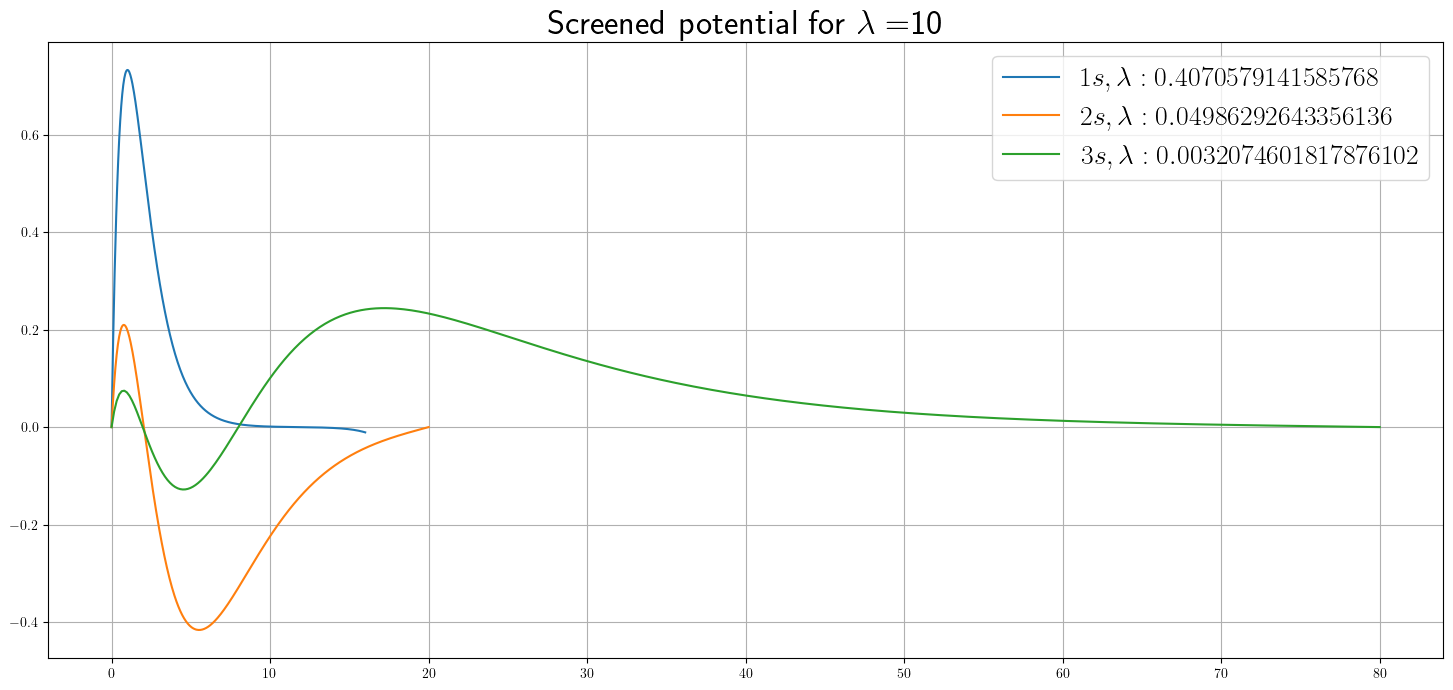

In [34]:
xmax=[16,20,80]
lam=10
a=[0.3,0.01,0.001] 
b=[0.6,0.09,0.005] 
fn=['{1s}','{2s}','{3s}']
for i in range(3):
    Screened_coulomb_potential(xmax[i],lam,a[i],b[i],'%s'%fn[i])

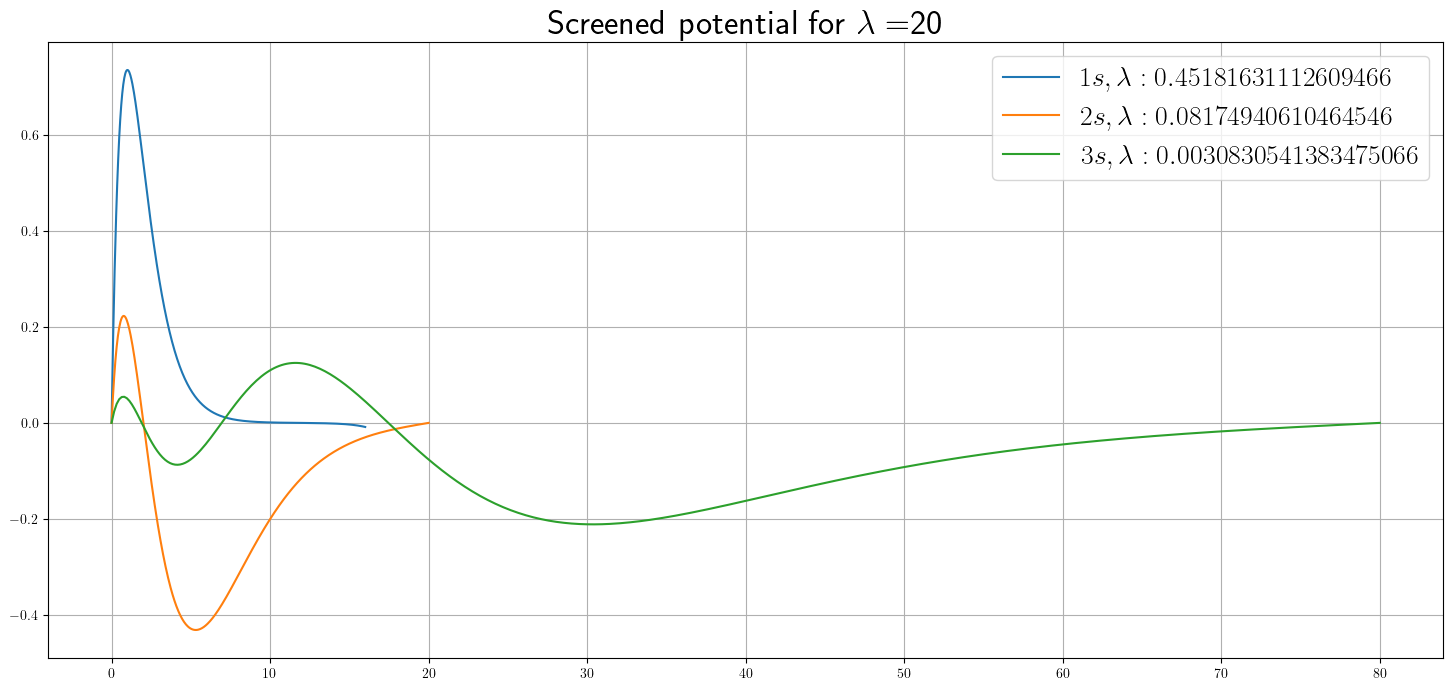

In [35]:
lam=20
a=[0.3,0.03,0.001] 
b=[0.6,0.1,0.005] 
for i in range(3):
    Screened_coulomb_potential(xmax[i],lam,a[i],b[i],'%s'%fn[i])

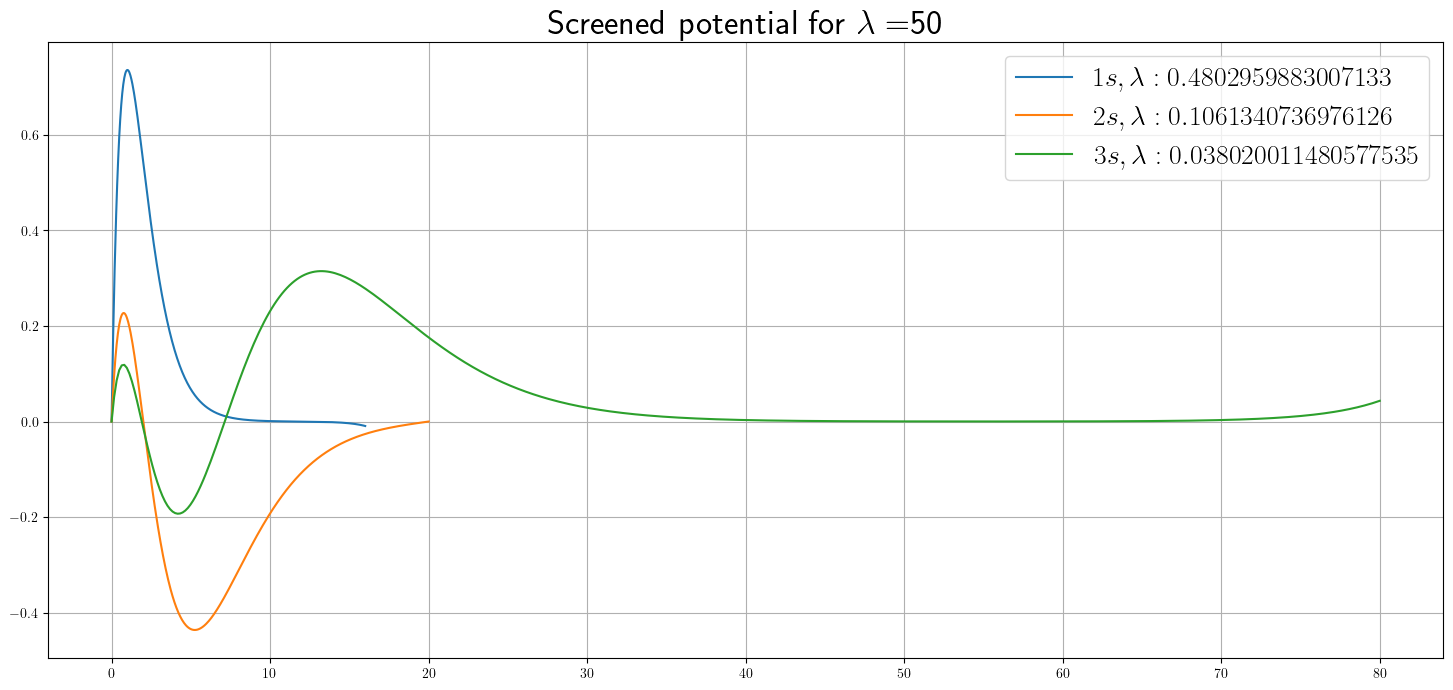

In [36]:
lam=50
a=[0.3,0.09,0.001] 
b=[0.6,0.15,0.05]  
for i in range(3):
    Screened_coulomb_potential(xmax[i],lam,a[i],b[i],'%s'%fn[i])

In [37]:
def eigen_state(xmax,a,b,d,fn):
    X=np.linspace(1e-10,xmax,500)
    U=[0,1]
    def f(U,x,E,l):
        u,Du=U
        du=Du
        ddu=(2*E+l*(l+1)/x**2-2*np.exp(-x/10)/x)*u
        return [du, ddu]
    
    def schr(E): 
        P=SI.odeint(f,U,X,args=(E,d))
        shy =P[-1,0] 
        return(shy)
    ecr=SOP.bisect(schr,a,b) 
    display(Math (r'\lambda_{} : '.format(fn)+latex(ecr)))
    X1=np.linspace(1e-10,xmax,500)
    P=SI.odeint(f,U, X1,args=(ecr,d))
    si=P[:,0]
    X=np.linspace(0,xmax,500)
    N=1.0/SI.simps(si**2, X)
    si*=np.sqrt(N)
    plt.plot(X,si,label=r'${} , \lambda : {}$'.format(fn,ecr))
    plt.legend(fontsize=20)
    plt.xlabel('x')
    plt.yticks([min(si), max(si)])
    plt.ylabel(r'$\psi$',fontsize=25)
    plt.grid(True)
    return None

<IPython.core.display.Math object>

<IPython.core.display.Math object>

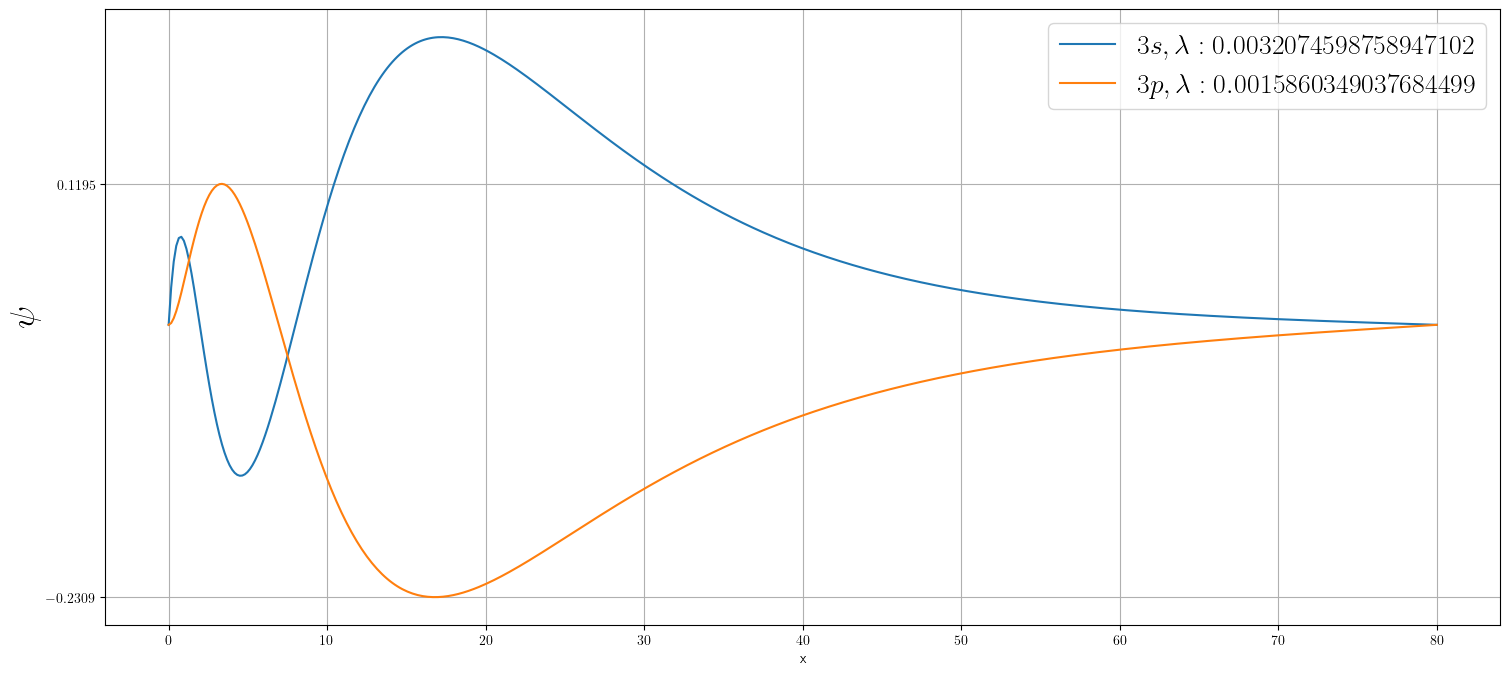

In [38]:
eigen_state(80,0.0009,0.004,0,'{3s}')
eigen_state(80,0.0009,0.003,1,'{3p}')

Q1. Write a program to generate a sequence of toss of 10 fair coins (p (H )=0.5 ).     
Run this program 5 times and show that the sequences are different.

In [97]:
n=5
for i in range(n):
    P=np.random.random(10)
    display(Math(r"p(H)_{} :".format(i+1)+latex(Matrix(P))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Q 2. Generate a sequence of toss of 100,000 tosses of fair coin. Assign 1 if it is a head, and assign 0 if it is a tail.      
Calculate the mean and the variance. Compare these with theoretical values.

In [98]:
H,T=0,0
N=100000
for i in range (N):
    result=randint(0,1)
    if result==1:
        H += 1
    else:
        T += 1
p=(H/N)
M=1*p
V=(p-M**2)
print("Heads :",H)
print ("Tails :",T)
print ("Probability of Heads :",p)
print ("Mean Value of heads :",M)
print ("Variance :",V)

Heads : 50167
Tails : 49833
Probability of Heads : 0.50167
Mean Value of heads : 0.50167
Variance : 0.2499972111


In [99]:
n=100000
p=np.random.choice(2,n)
d=sum(p)
p1=d/n
print(p1)
M=1*p1
V=(p1-M**2)
print(d)
print ("Mean Value of heads :",M) 
print ("Variance :",V)
print('theoritical variance :',np.var(p))
print('theoritical mean :',np.average(p))

0.49655
49655
Mean Value of heads : 0.49655
Variance : 0.2499880975
theoritical variance : 0.24998809749999992
theoritical mean : 0.49655


Q3. Generate a sequence of toss of 100,000 tosses of deffective coin ( p(H )=0.8 ). Assign 1 if it is a head, and assign 0 if it is a tail.                                                                                                                     
Calculate the mean and the variance. Compare these with theoretical values.

In [100]:
H=0
T=0
k=[]
n=[]
for i in range(100000):
    #result=randint(0,1)
    #print (result)

    value=np.random.random()
    #n.append(value)
    #print(value)
    if value<=0.8:
        k.append(value)
        H+=1
    else:
        T+=1
#print(k)
#n1=[j*j for j in n]
#print(j)
#avg=np.average(n)
#avg1=np.average(n1)

#print(avg,avg1)
print('Head:',H,'|','Tail',T)
p=(H/N)
print ("Probability of Heads :",p)
M=1*p
print ("Mean Value of heads :",M)
V=(p-M**2)
#v1=avg1-avg**2
print ("Variance :",V)
#print('theo variance :',v1)
#print('theoritical variance',np.var(value))
print('theoritical mean',np.average(value))

Head: 80015 | Tail 19985
Probability of Heads : 0.80015
Mean Value of heads : 0.80015
Variance : 0.15990997750000002
theoritical mean 0.5950421249715988


In [101]:
p=0.8
n=10
K=[]
for i in range(n):
    if np.random.random() <=p:     #head 1, tail 0
        K.append(1)
    else:
        K.append(0)
print(K)
mean=np.average(K)
variance=np.var(K)
print('Teoritical_mean= ',mean,'\nTeoritical_variance= ',variance)

d=sum(K)
print(d)
p1=d/n
p1
M=1*p1
print ("Mean Value of heads=",M)
V=(p1-M**2)
print ("Variance = ",V)

[1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
Teoritical_mean=  0.8 
Teoritical_variance=  0.16000000000000003
8
Mean Value of heads= 0.8
Variance =  0.15999999999999992


Q4. 20 fair coins are tossed – this is an event – count total number of heads in that event.                               
Let that number be denoted as $\eta_H$.Repeat This event 1 million times. Measure $\eta_H$ each time.                       
Determine the count of each value of $\eta_H$ (which can have 21 possible values (0 to 20)).                               
Divide the counts by the total number of toss. Plot these relative frequencies against the values of $\eta_H$.             
Superpose the binomial probability distribution p(r) = ${}^{20} C_r(\frac{1}{2})^20$.                                         
You have to write you own function for combination. Use of factorial is strictly prohibited.

In [106]:
#n=10
nh=[]
N=1000000
for i in range (N):
    p=np.random.choice(2,20)
    #print(p)
    #d=sum(p)
    #print(d)
    nh.append(sum(p))
#print(nh )           
nh1=set(nh) 
F={v:nh.count(v) for v in nh1}
F
#c=plt.hist(nh,bins=21) 
#plt.show()

{0: 1,
 1: 17,
 2: 191,
 3: 1100,
 4: 4706,
 5: 14631,
 6: 36948,
 7: 74054,
 8: 120039,
 9: 160424,
 10: 175479,
 11: 160675,
 12: 120345,
 13: 73748,
 14: 36972,
 15: 14773,
 16: 4642,
 17: 1079,
 18: 157,
 19: 17,
 20: 2}

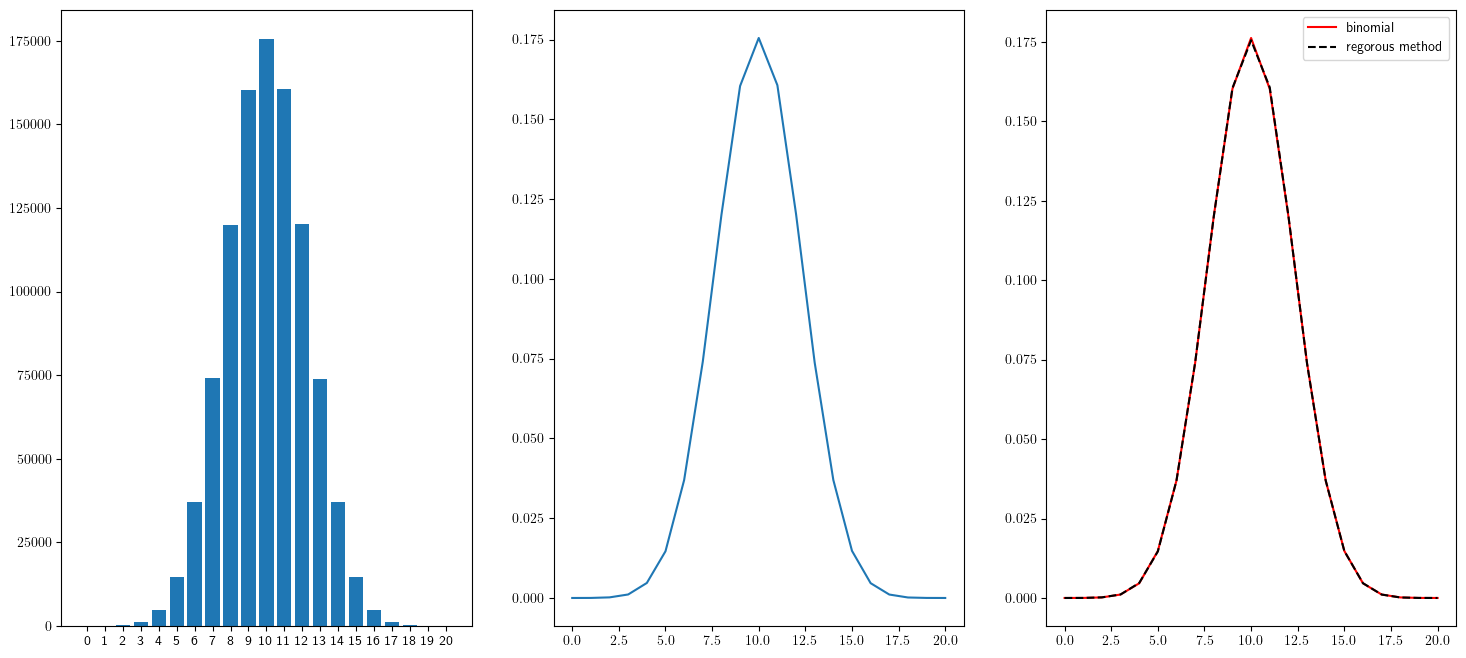

In [107]:
value = list(F.keys()) 
frequency = list(F.values())
plt.subplot(131)
plt.bar(range(len(F)), frequency, tick_label=value) 

plt.subplot(132)
probability=(1/N)*np.array(frequency)
plt.plot(value,probability)

plt.subplot(133)
n = 20
p = 0.5
# defining the list of r values
r_values = list(range(n + 1))
# obtaining the mean and variance 
mean, var = binom.stats(n, p)
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]

plt.plot(r_values,dist,'r-')
plt.plot(value,probability,'k--')
plt.legend(['binomial','regorous method'])
plt.show()

Autocorrelation function:

If x t is a time series (a sequence) then Autocorrelation function of x(t) is
$$ Acf(\tau)= \overline{ (x(t)- \bar{x}) * (x(t+\tau)- \bar{x}) } $$

Q1. Write a program which can generate a sequence of numbers by a given formula and calculates its autocorrelation function. Test your program with . (Should check both the frequency and the amplitude of the $Acf$

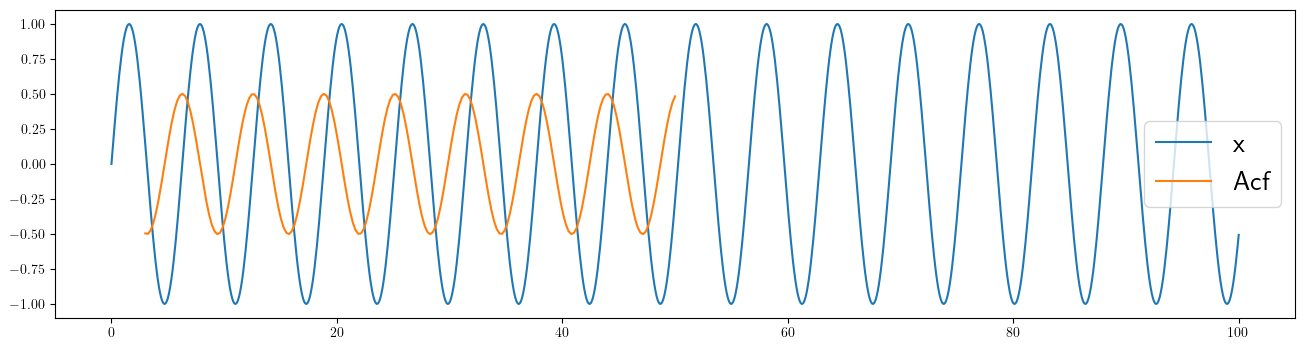

The frequency of oscillation is 0.9976227735069716
The amplitude of acf:  0.5010057126007229


In [108]:
y=np.linspace(0,100,1000)
w=1
K=np.sin(w*y)
tau=np.linspace(3,50,200)
acf=[]
for i in tau:
    f=lambda t: np.sin(w*t)*np.sin(w*(t+i))
    I=SI.quad(f,0,200)
    acf1=I[0]*(1/200)
    acf.append(acf1)
plt.figure(figsize=(16,4))    
plt.plot(y,K, tau,acf)
plt.legend(['x','Acf'],fontsize=20)
plt.show()

N=200
T1=[]
for i in range(1,N-1):
    if acf[i-1]<acf[i]>acf[i+1 ]:
           # if Xt[i]>Xt[i+1]:
             T1.append(tau[i])
                                
TP1=np.array(T1)
TP=np.diff(TP1)
AvTP=np.average(TP)
f=2*np.pi/AvTP
print('The frequency of oscillation is', f)
print('The amplitude of acf: ',max(acf)) 

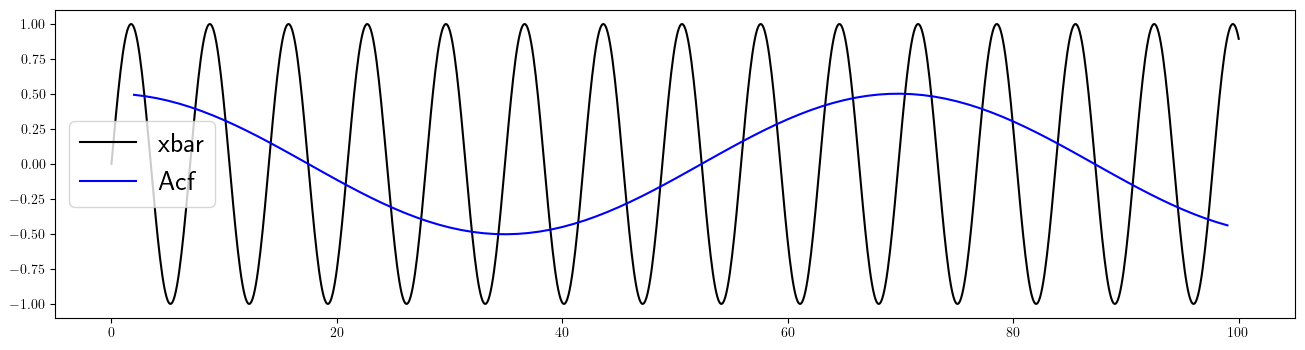

In [109]:
w=0.9
K=np.sin(w*y)
#print(len(y))
xbar=statistics.mean(K)
ACF=[]
tau=np.arange(2,100)
for i in range(len(tau)):
    p=len(K)-tau[i]
    M=[]
    for j in range(p):
        acf1=(K[j]-xbar)*(K[j+tau[i]]-xbar)
        M.append(acf1)
    acf=statistics.mean(M)
    ACF.append(acf)
plt.figure(figsize=(16,4))    
plt.plot(y,K,'k',tau,ACF,'b')
plt.legend(['xbar','Acf'],fontsize=20)
plt.show()

Q2. Generate 10000 numbers by Linear Congruential Generator. Calculate autocorrelation function

In [110]:
a=6364136223846793005
c=1442695040888963407
xn=0
m=2**64
K=[]
tau=3
for i in range(0,10000):
    xn1=((a*xn)+c)%m
    K.append(xn1)
    xn=xn1
xbar=statistics.mean(K)
print('xbar :',xbar)

M=[]
p=len(K)-tau
for j in range(p):
    acf1=(K[j]-xbar)*(K[j+tau]-xbar)
    M.append(acf1)
print('Acf :',statistics.mean(M))

xbar : 9.197339511452853e+18
Acf : -1.454260879621909e+35


Q3. Generate 10000 numbers by numpy.random.random. Calculate autocorrelation function

In [111]:
K=np.random.random(10000)
xbar=statistics.mean(K)
print('xbar :',xbar)
M=[]
tau=3
p=len(K)-tau
for j in range(p):
    acf1=(K[j]-xbar)*(K[j+tau]-xbar)
    M.append(acf1)
print('Acf :',statistics.mean(M))

xbar : 0.4985122464521292
Acf : 0.0009778638087776538


Q4. Generate N number of random numbers using Linear Congruential Generator. Draw the histogram (use matplotlib.pyplot.hist()).                                                                                                           
Use N=10000,100000,1000000

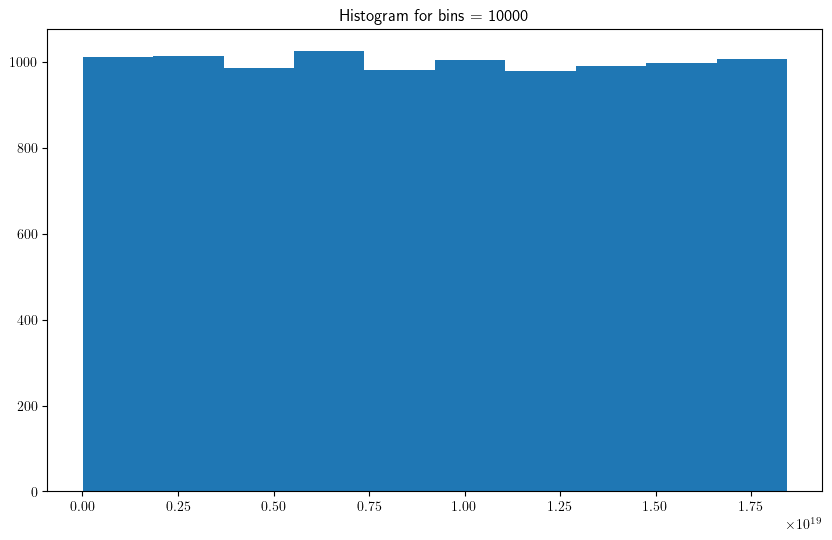

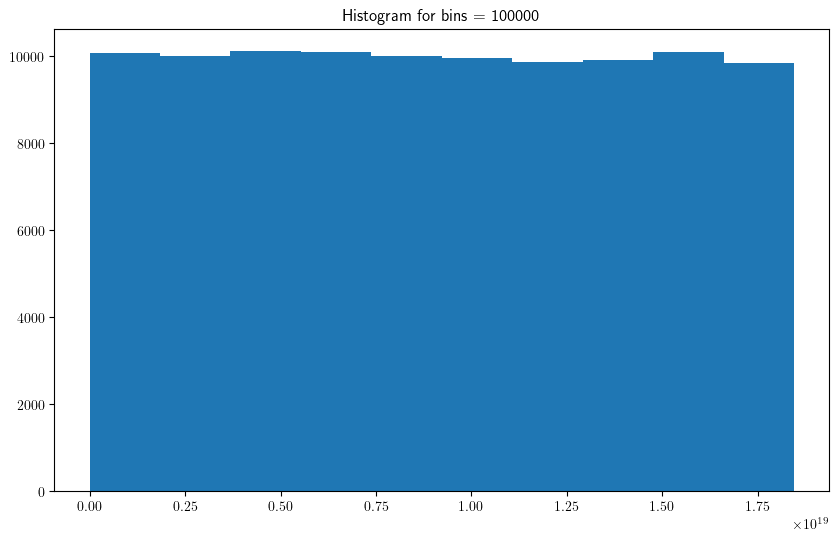

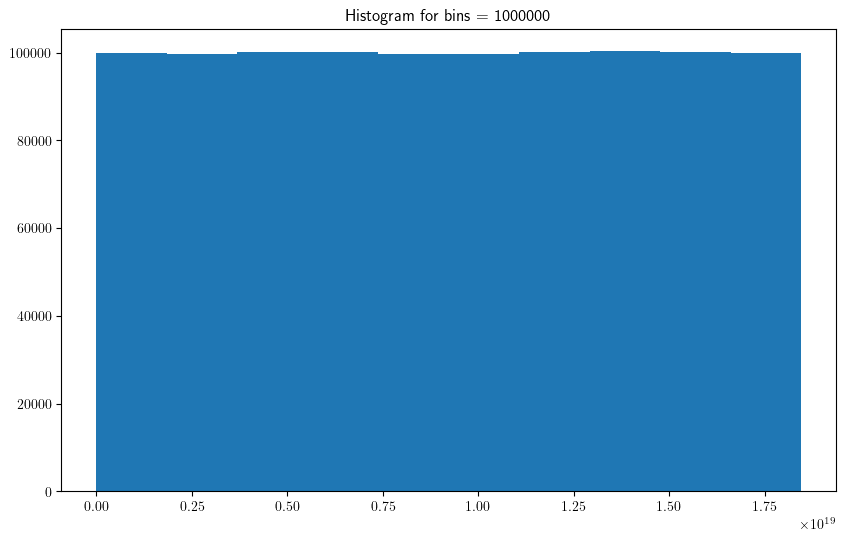

In [114]:
a=6364136223846793005
c=1442695040888963407
m=2**64
n=[10000,100000,1000000]

for j in range(len(n)):
    t=n[j]
    xn=0
    K=[]
    for i in range(0,t):
        xn1=((a*xn)+c)%m
        K.append(xn1)
        xn=xn1
    plt.figure(figsize=(10, 6))
    plt.title('Histogram for bins = {}'.format(n[j]))
    plt.hist(K)      # bins=15
    plt.show()

Q5. Generate N number of random numbers using numpy.random.random. Draw the histogram (use matplotlib.pyplot.hist()).                                                                                                                                    
Use N=10000, 100000, 1000000

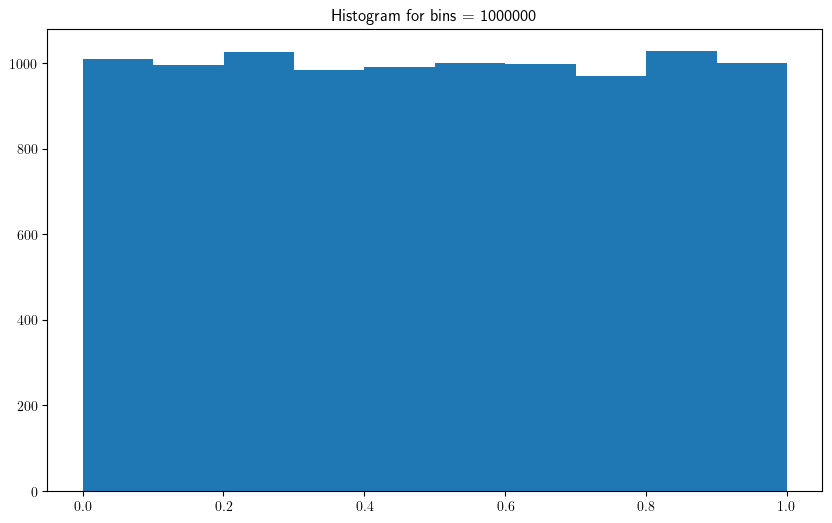

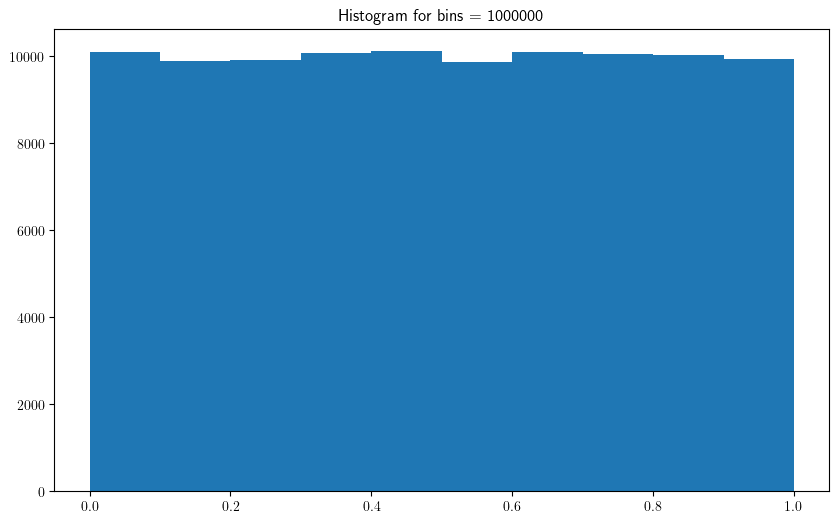

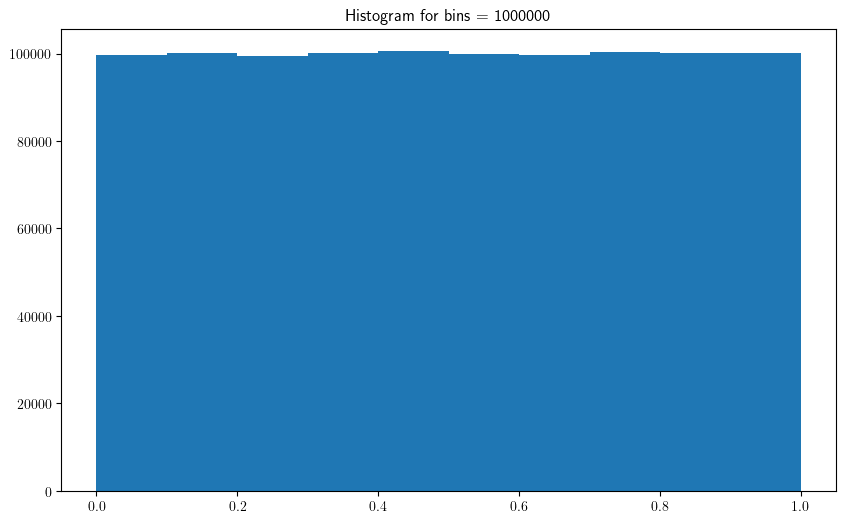

In [115]:
n=[10000,100000,1000000]
for i in range(len(n)):
    K=np.random.random(n[i])
    plt.figure(figsize=(10, 6))
    plt.title('Histogram for bins = {}'.format(n[j]))
    plt.hist(K)
    plt.show()

Dice Problem

In [116]:
P=np.random.rand(5,10)
r=6*P+1
k=r.astype(int)
display(Math('sequeace='+latex(Matrix(k))))

<IPython.core.display.Math object>

In [117]:
n=100000
P=np.random.rand(n)
#print ("sequence=",P)
r=6*P+1
k=r.astype(int)
print ("sequence=",k)
count_arr=np.bincount(k)
print(count_arr[1])
mean=np.mean(k)
var=np.var(k)
print("mean=",mean)
#var=meansqr-mean**2
print("variance=",var)
print ("theoretical values are", 21/6,',', 35/12)

sequence= [6 1 5 ... 2 4 6]
16727
mean= 3.49159
variance= 2.9131492719
theoretical values are 3.5 , 2.9166666666666665


$$\textrm{Random Walk}$$

[ 1 -1  1  1  1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1 -1 -1 -1]
[ 1 -1 -1  1  1  1  1 -1  1 -1  1 -1  1  1  1 -1  1  1 -1  1]
[ 1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1]
[ 1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1 -1]
[-1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1]


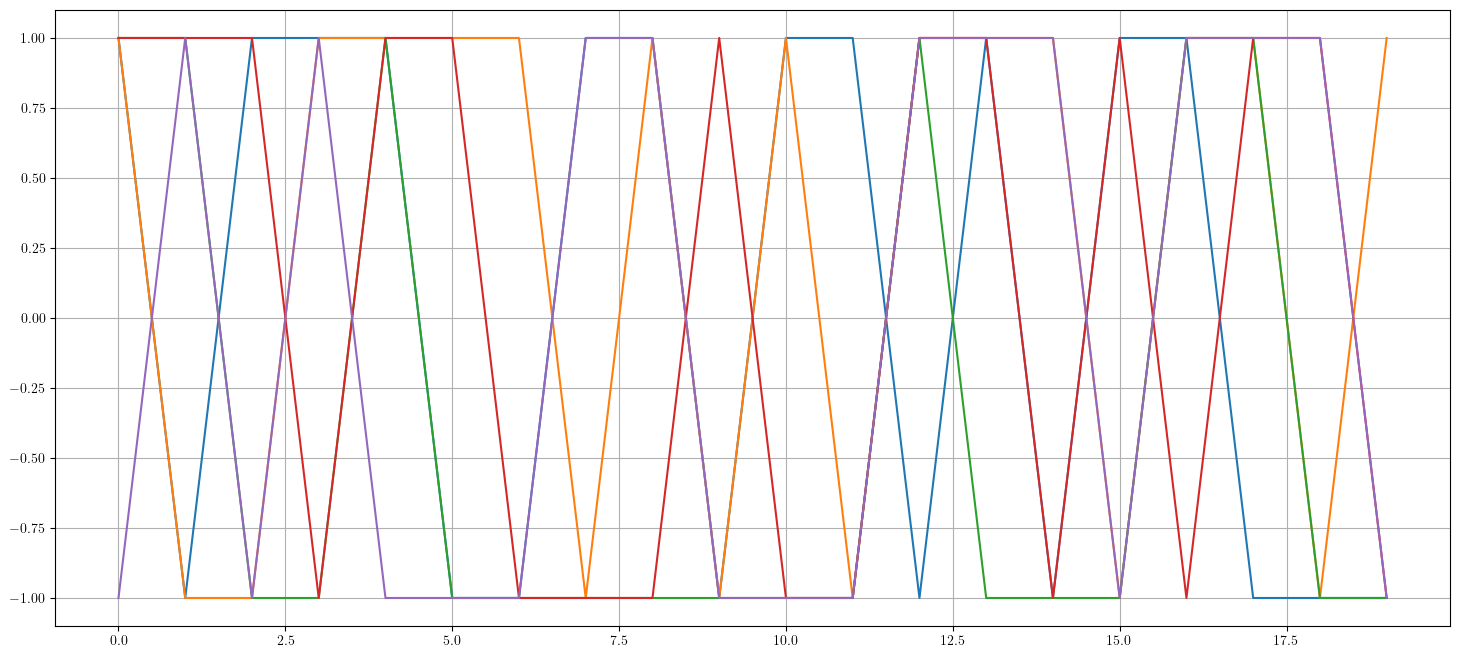

In [118]:
n=20
t=np. arange(0,20,1)
for j in range (5):
    
    p=np.random.rand(n)
    h=np.array([1 if i<=0.5 else -1 for i in p])
    print(h)
    #s=np.sum(h)
    #t=np. arange(0,20,1)
    #print(t)
    #print(s)
    plt.plot(t,h)
    plt.grid()
plt.show()

$$\textrm{Random Walk 1A}$$

Simulate a random walk (Δx = ±1) of 20 steps and store the endpoint of the track.Repeat 1M times.                                       
Calculate the histogram of the endpoints. Superpose with an appropriate binomial distribution.

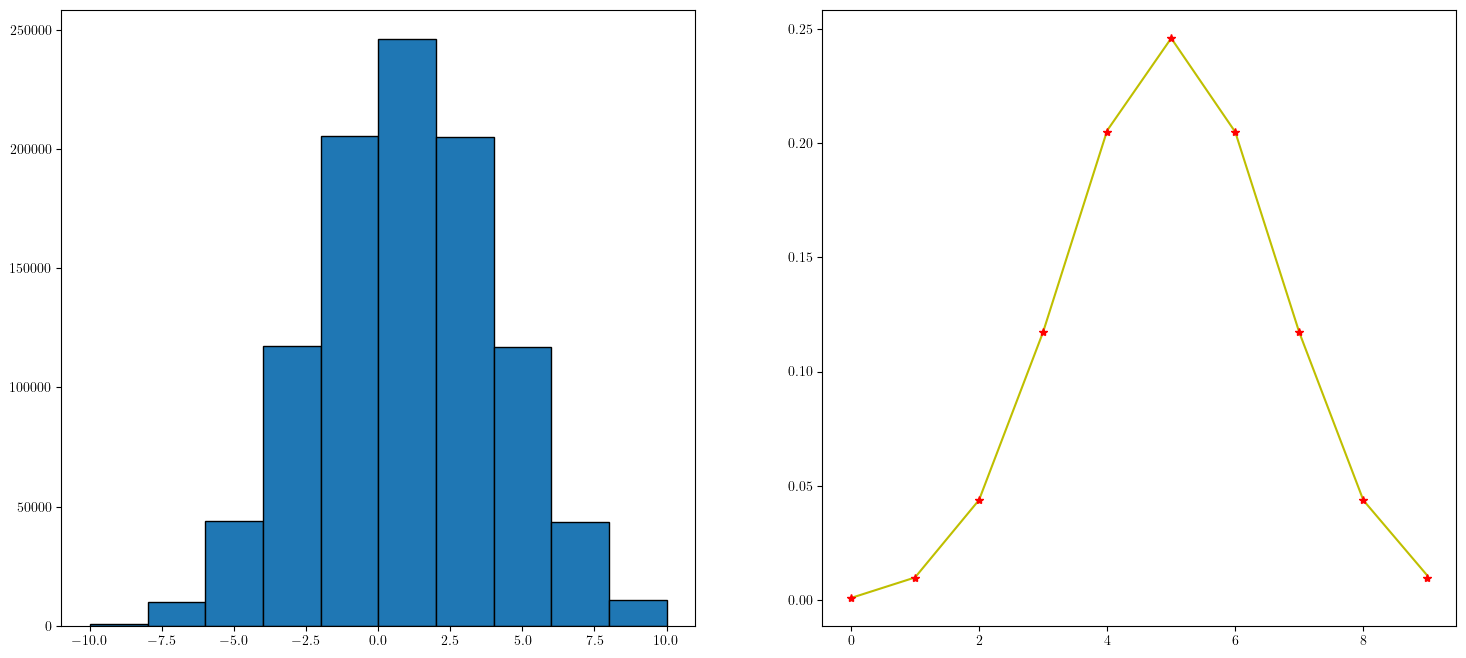

In [119]:
r=np.random.rand(10**6,10)
A=np.array([[1 if r[i][j]>=0.5 else -1 for j in range(len(r[0])) ] for i in range(len(r))]  )
A1=np.sum(A,1)
plt.subplot(121)
p,q,s=plt.hist(A1,bins=[-10,-8,-6,-4,-2,0,2,4,6,8,10],edgecolor='black')
plt.subplot(122)
n=np.arange(0,10,1)
def comb(n,r):
    if r>=n:
        return 1
    else:
        C_r=1
        for i in range(r):
            C_r=C_r*(n-i)/(i+1)
    return C_r
B=[(0.5)**10*comb(10,i) for i in range(len(n)) ]
plt.plot(n,(p/10**6),'y',n,B,'r*')
plt.show()

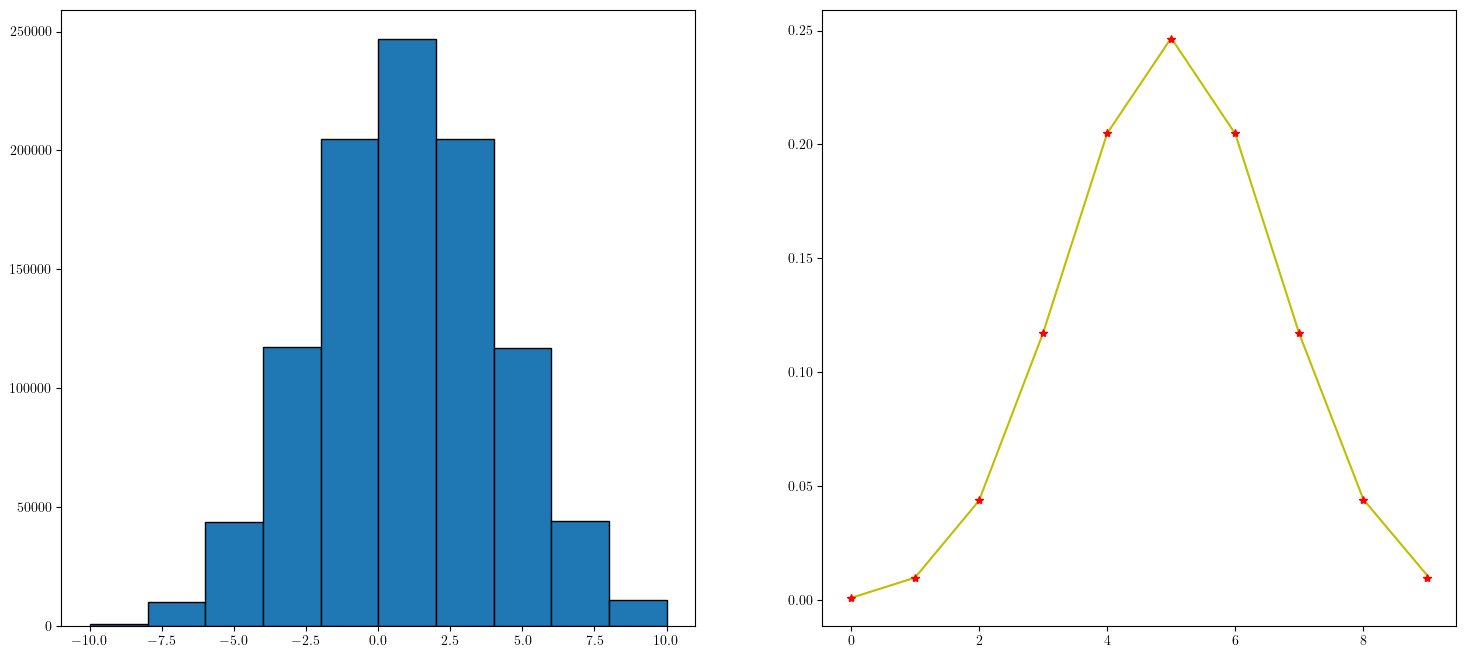

In [121]:
r=np.random.rand(10**6,10)
A=np.array([[1 if r[i][j]>=0.5 else -1 for j in range(len(r[0])) ] for i in range(len(r))]  )
A1=np.sum(A,1)
plt.subplot(121)
p=plt.hist(A1,bins=[-10,-8,-6,-4,-2,0,2,4,6,8,10],edgecolor='black')[0]
plt.subplot(122)
n=np.arange(0,10,1)
def comb(n,r):
    if r>=n:
        return 1
    else:
        C_r=1
        for i in range(r):
            C_r=C_r*(n-i)/(i+1)
    return C_r
B=[(0.5)**10*comb(10,i) for i in range(len(n)) ]
plt.plot(n,(p/10**6),'y',n,B,'r*')
plt.show()

 Q1 Simulation Random walk in 1 –D for 20 steps. Step size is 1. Superpose the tracks of five different runs in a single plot with five different colours.

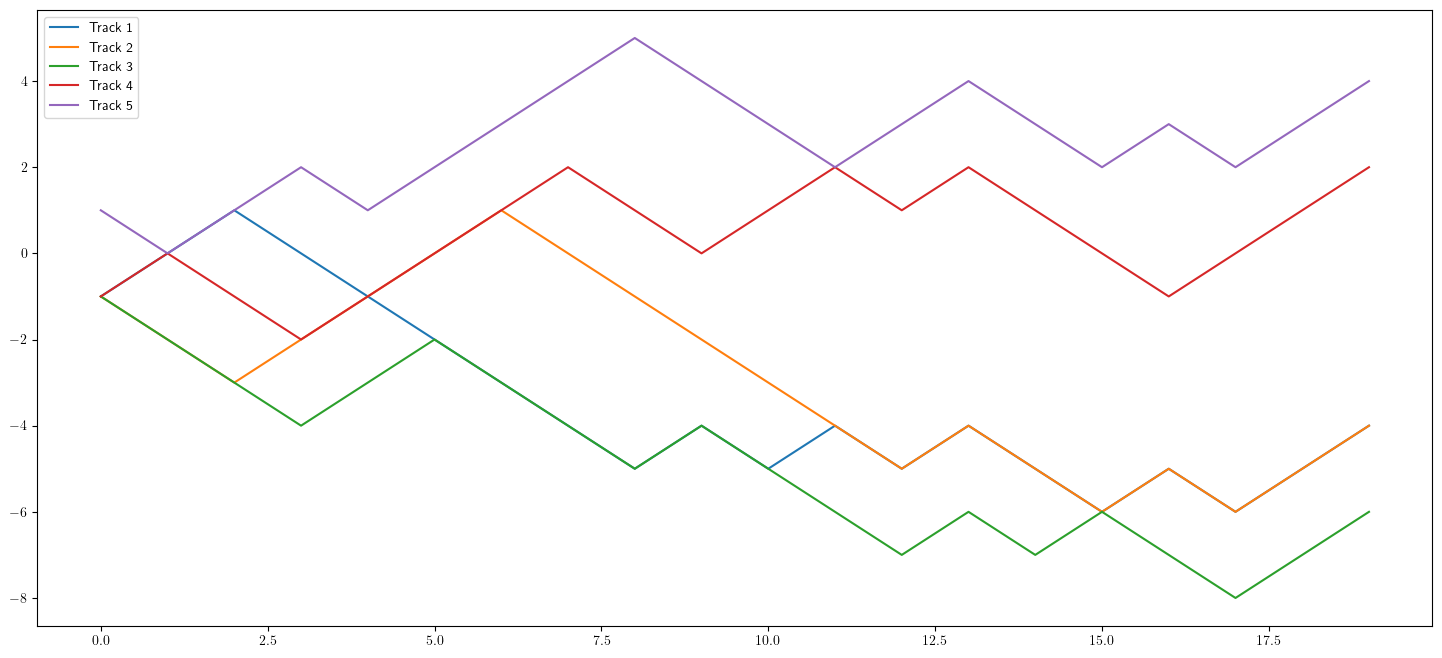

In [122]:
Y=np.random.choice((-1,1),(5,20))
Y1=np.cumsum(Y,1)
x=np.arange(0,20)
plt.plot(x,Y1[0],x,Y1[1],x,Y1[2],x,Y1[3],x,Y1[4])
plt.legend(['Track 1','Track 2','Track 3','Track 4','Track 5'])
plt.show()

Q2 Let $x_n$ be the position of the walker in $n$ steps in problem number 1. Determine $(x_n)_{rms}=\sqrt{\bar{x}^2}$.        
Plot $(x_n)_{rms}=\sqrt{\bar{x}^2}$ as a function of  $n$.                                                                          
Superpose the theoretical plot. Take at least 100000 repetitions to calculate the mean.

(𝑥_𝑛)𝑟𝑚𝑠 0.4999999934948065


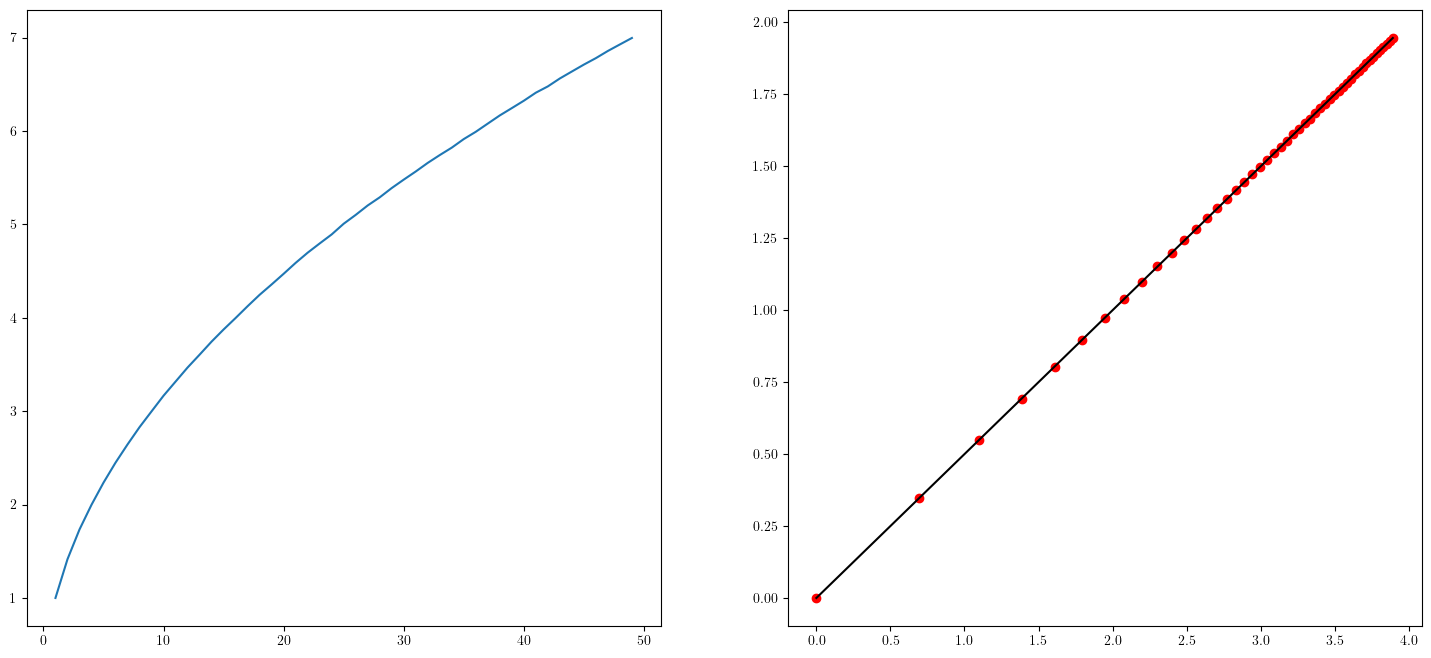

In [124]:
plt.subplot(121)

n=np.arange(1,50)
X=[]
for i in n:
    Y=np.random.choice((-1,1),(10**6,i))
    Xn=np.sum(Y,1)
    Xn_rms=np.sqrt(np.mean(Xn*Xn))
    X.append(Xn_rms)
plt.plot(n,X)
plt.subplot(122)
Ln=np.log(n)
Lx=np.log(X)

def f(x,m,c):
    return m*x+c

p,s=SOP.curve_fit(f,Ln,Lx)
print('(𝑥_𝑛)𝑟𝑚𝑠',p[0])
plt.plot(Ln,Lx,'ro',Ln,f(Ln,*p),'k')
plt.show()

Q3 Simulation Random walk in 1 –D for 20 steps. Step is a random number in the interval [-1,1].                                      
Superpose the tracks of five different runs in a single plot with five different colours.

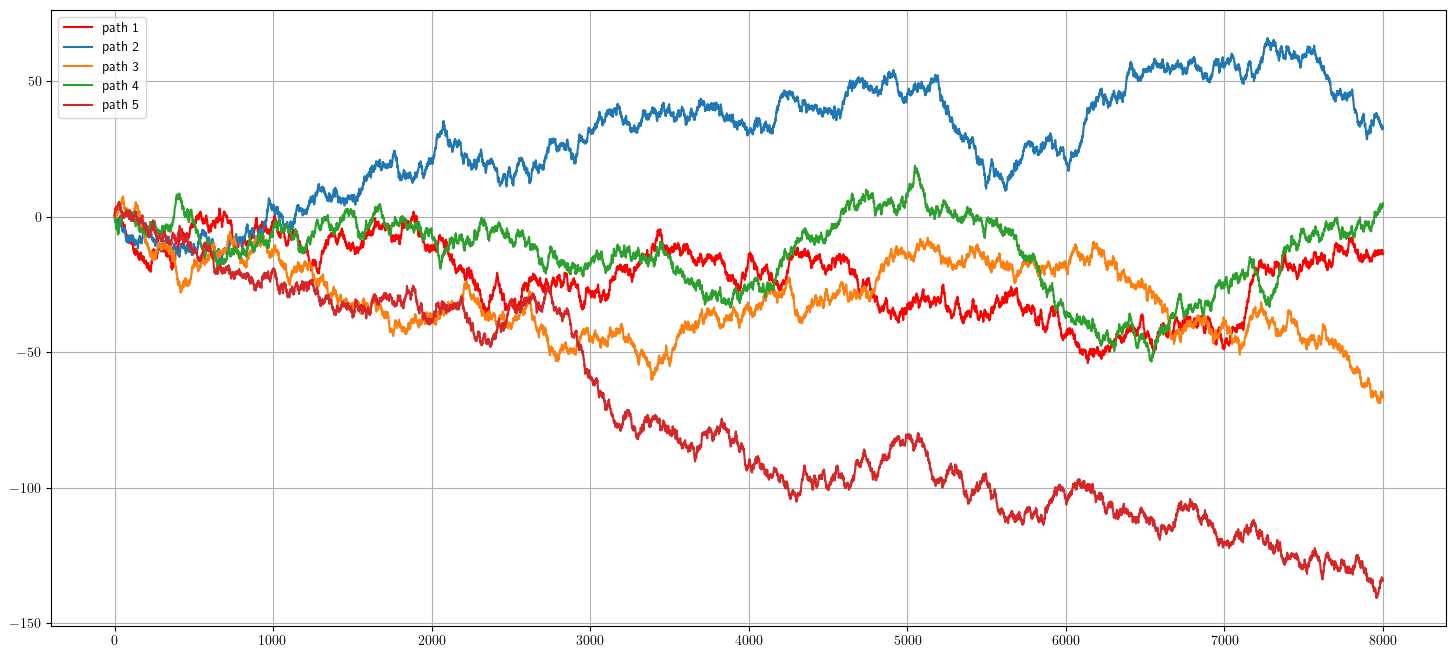

In [125]:
P=np.random.rand(5,20**3)
a=2*P-1
c=np.cumsum(a,1)
t=np.arange(0,20**3)
plt.plot(t,c[0],'r',t,c[1],t,c[2],t,c[3],t,c[4])
plt.legend(['path 1','path 2','path 3','path 4','path 5'])
plt.grid()
plt.show()

Q4 Let $x_n$ be the position of the walker in $n$ steps in problem number 3. Determine $(x_n)_{rms}=\sqrt{\bar{x}^2}$.        
Plot $(x_n)_{rms}=\sqrt{\bar{x}^2}$ as a function of  $n$.                                                                       
Superpose the theoretical plot. Take at least 100000 repetitions to calculate the mean.

(𝑥_𝑛)𝑟𝑚𝑠 0.49940555668358055


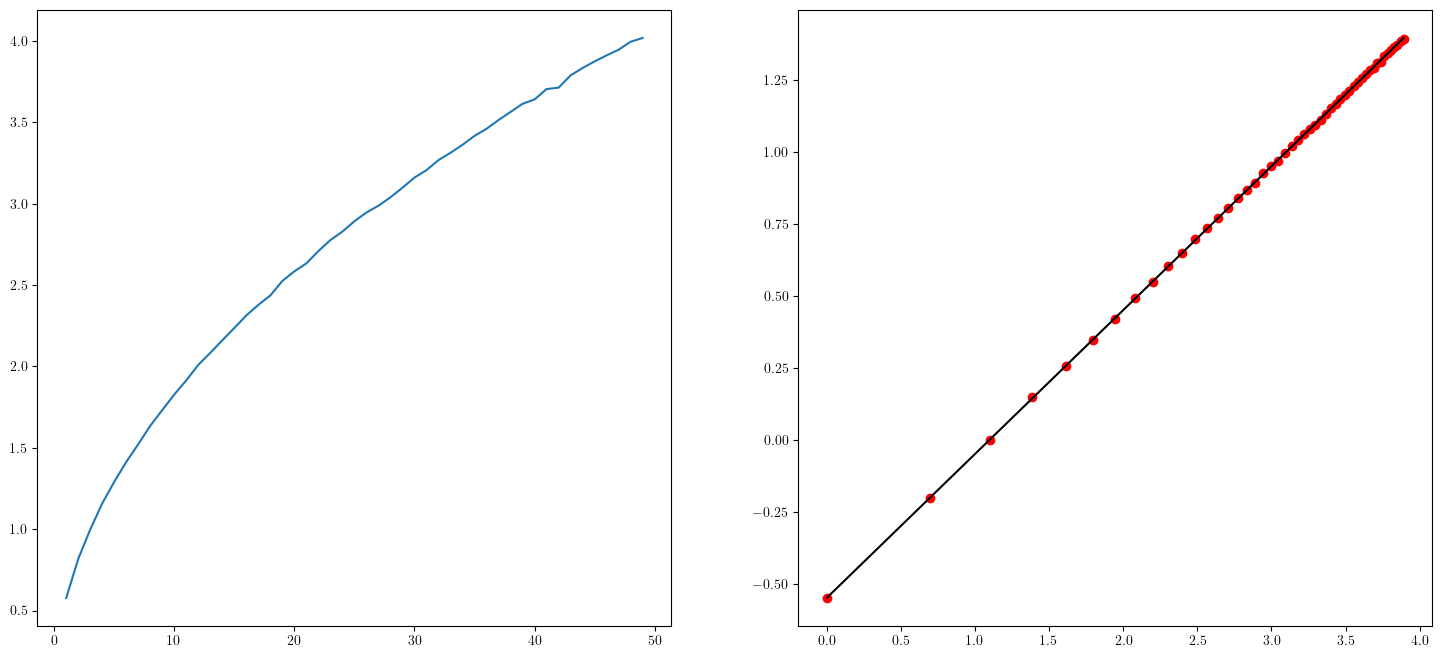

In [126]:
plt.subplot(121)
N=np.arange(1,50)
X=[]
for i in N:
    P=np.random.rand(10**5,i)
    b=2*P-1

    Xn=np.sum(b,1)
    Xn_rms=np.sqrt(np.mean(Xn*Xn))
    X.append(Xn_rms)

plt.plot(N,X)
plt.subplot(122)

Ln=np.log(N)
LXrms=np.log(X)

def f(x,m,c):
    return m*x+c
p,s= SOP.curve_fit(f,Ln,LXrms)
print('(𝑥_𝑛)𝑟𝑚𝑠',p[0])
plt.plot(Ln,LXrms,'ro',Ln,f(Ln,*p),'k')
plt.show()

$$\textrm{Random Walk 2D}$$

1. (a) Simulate a 2D random walk on a grid where the possible steps are {(1,0), (0,1), (-1,0),(0-1)}.                            
Run this simulation 5 times with 50 steps each and superpose the tracks on a graph with different colours.

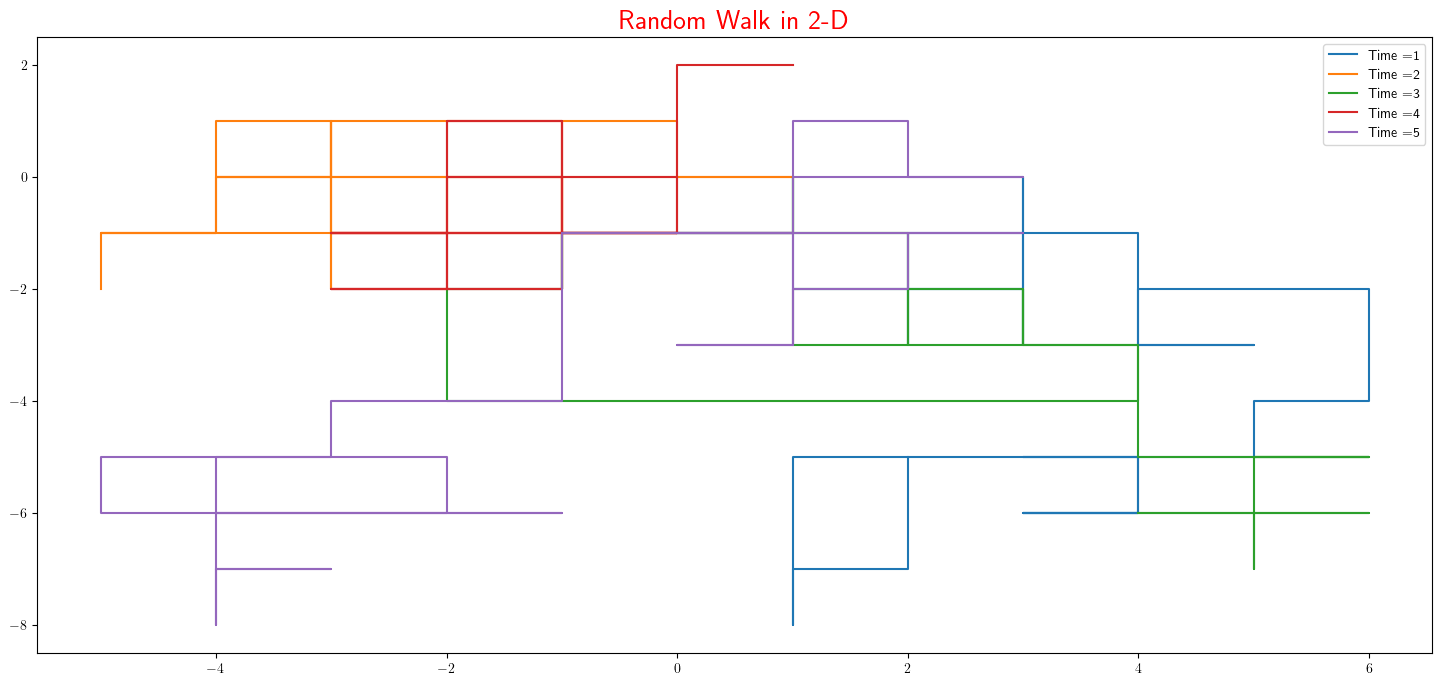

In [127]:
n_steps=50
time=5
direction=[np.array([1,0]),np.array([0,1]),np.array([-1,0]),np.array([0,-1])]
for t in range(1,time+1):
    track=[]
    p=np.array([0,0])
    for i in range(1,n_steps):
        step=np.random.choice(4) 
        p=p+direction[step]
        track.append(p)
    T=np.array(track)
    plt.plot(T[:,0],T[:,1],label=F' Time ={t}'.format(t))
    plt.legend(loc='best',fontsize=10)
plt.title("Random Walk in 2-D",fontsize=20,color='red')
plt.show()

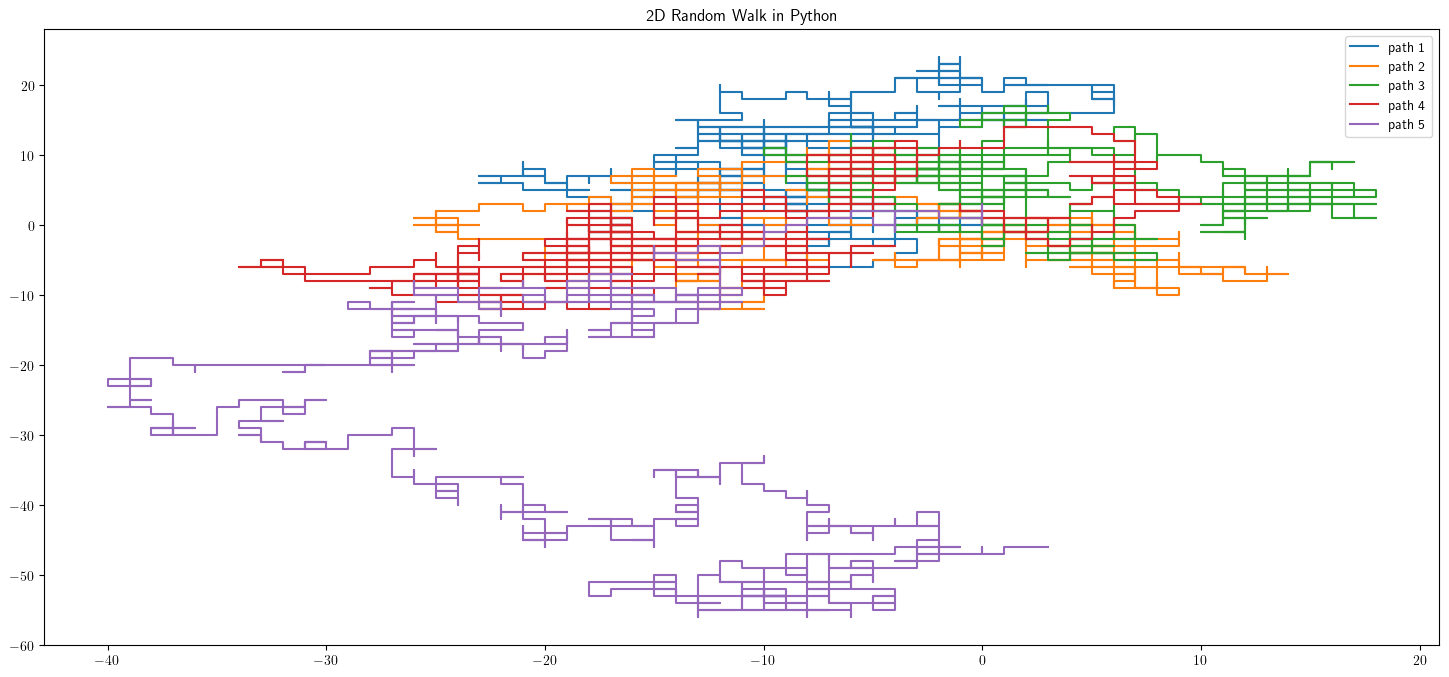

'RIGHT'

In [131]:
def randomwalk2D(n):
    x = np.zeros(n)
    y = np.zeros(n)
    directions = ["UP", "DOWN", "LEFT", "RIGHT"]
    X=[]
    Y=[]
    for j in range(5):
        x = np.zeros(n)
        y = np.zeros(n)
        directions = ["UP", "DOWN", "LEFT", "RIGHT"]
        for i in range(1, n):
            step = np.random.choice(directions)
            if step == "RIGHT":
                x[i] = x[i - 1] + 1
                y[i] = y[i - 1]
            elif step == "LEFT":
                x[i] = x[i - 1] - 1
                y[i] = y[i - 1]
            elif step == "UP":
                x[i] = x[i - 1]
                y[i] = y[i - 1] + 1
            elif step == "DOWN":
                x[i] = x[i - 1]
                y[i] = y[i - 1] - 1
        X.append(x) 
        Y.append(y)
    return X, Y

x, y = randomwalk2D(1000)
plt.title("2D Random Walk in Python")
plt.plot(x[0], y[0],x[1], y[1],x[2], y[2],x[3], y[3],x[4], y[4])
plt.legend(['path 1','path 2','path 3','path 4','path 5'])
plt.show()
directions = ["UP", "DOWN", "LEFT", "RIGHT"]
step = np.random.choice(directions)
step

1.(b) Plot $(R_n)_{rms}$ as a function of $n$ and fit this with equation $(R_n)_{rms}=An^k$. Find the value of A and k.     
Compare with the theoretical values.

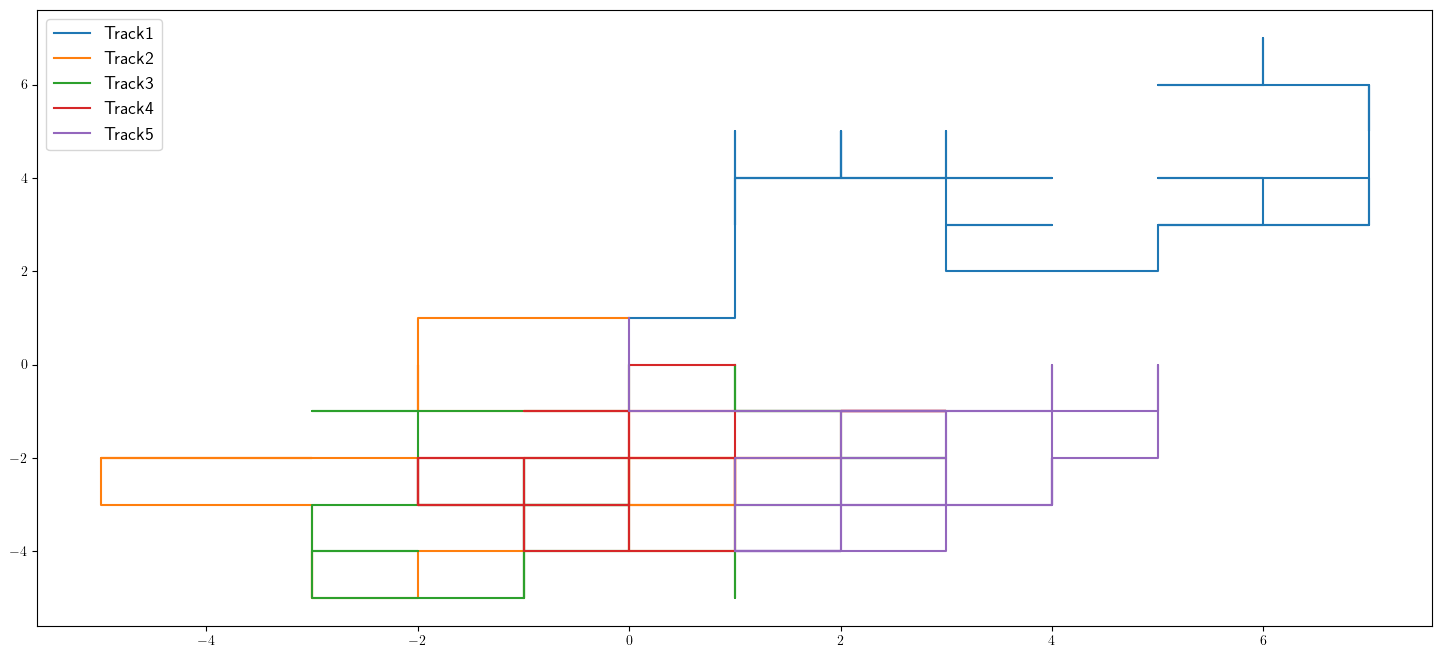

In [132]:
A=np.random.choice([1,-1,1j,-1j],(50,5))
B=np.cumsum(A,axis=0)
xdata=B.real
ydata=B.imag
plt.plot(xdata,ydata)
plt.legend(['Track1','Track2','Track3','Track4','Track5'],fontsize=13)
plt.show()

2. Repeat both part of Q.no. 1 but this time with step length ∆r=1, but Δθ is a uniform random number

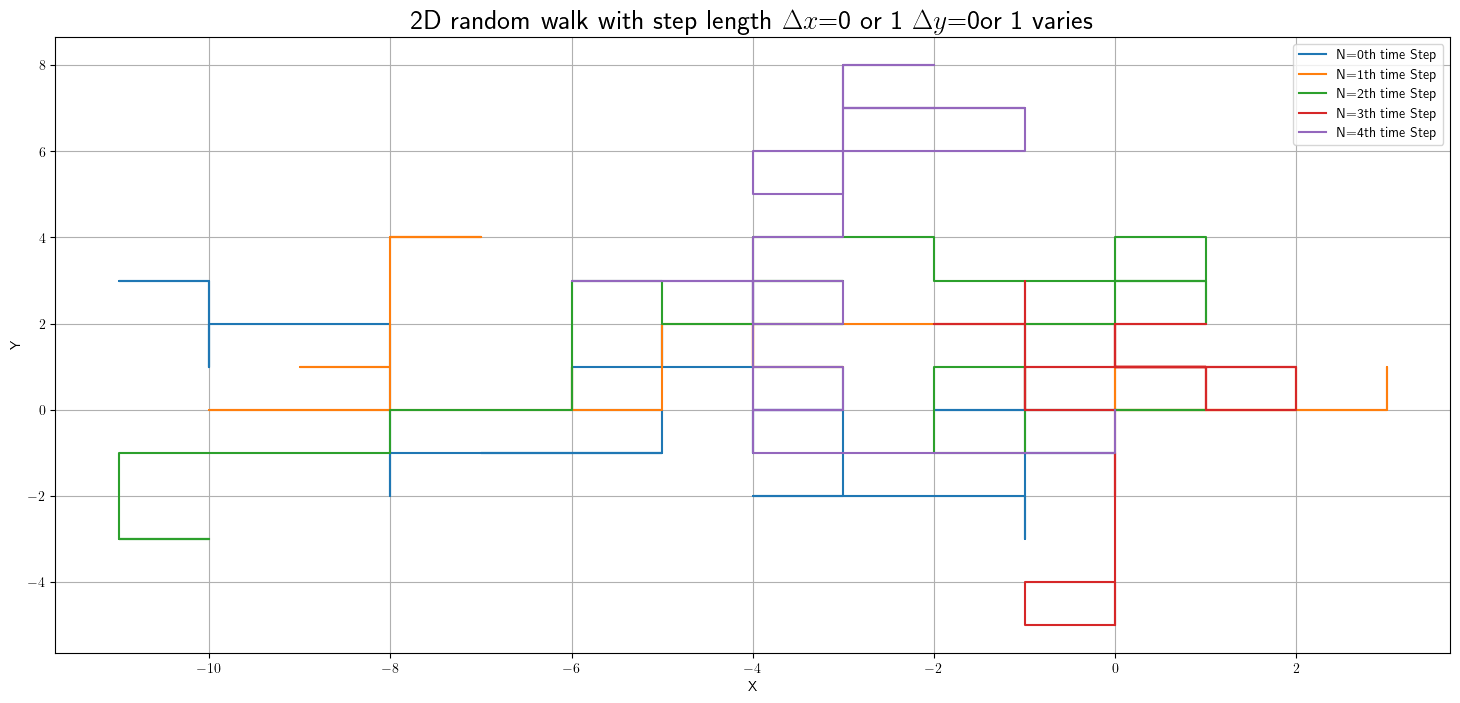

In [133]:
N=5
A=[]
for i in range(N):
    a=np.random.choice(4,49)
    a2=np.zeros(49)
    b2=np.zeros(49)
    a2[a==0]=1
    a2[a==1]=-1
    b2[a==2]=1
    b2[a==3]=-1
    X1=np.vstack((a2,b2))
    X=np.hstack((np.array([[0],[0]]),X1))
    Y=np.cumsum(X,1)
    #print(Y[0],Y[1])
    plt.plot(Y[0],Y[1],label=F'N={i}th time Step'.format(i))
    plt.legend(loc='best',fontsize=10)
plt.title(r'2D random walk with step length $\Delta x$=0 or 1  $\Delta y$=0or 1 varies',fontsize=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

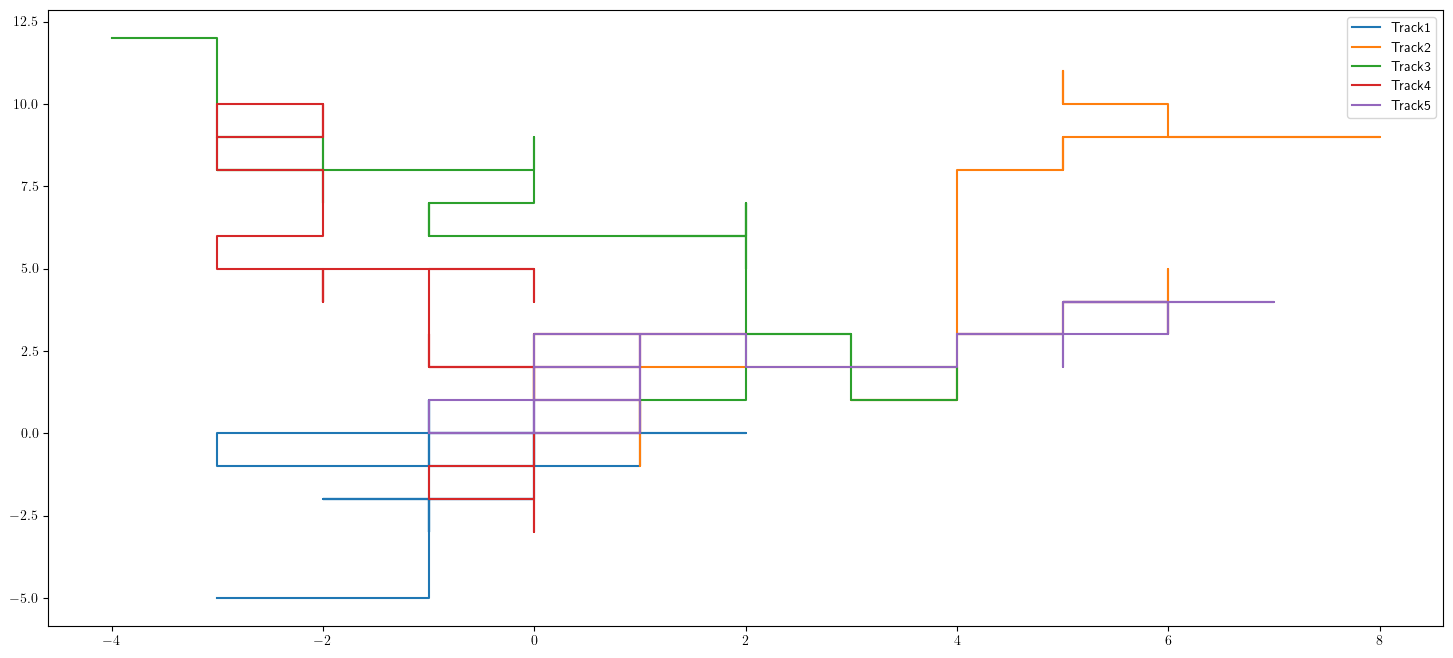

In [134]:
A=np.random.choice([1,-1,1j,-1j],(50,5))
B=np.cumsum(A,axis=0)
xdata=B.real
ydata=B.imag
plt.plot(xdata,ydata)
plt.legend(['Track1','Track2','Track3','Track4','Track5'])
plt.show()

the value of m 0.4992836075339017 value of c 0.002163040548565287


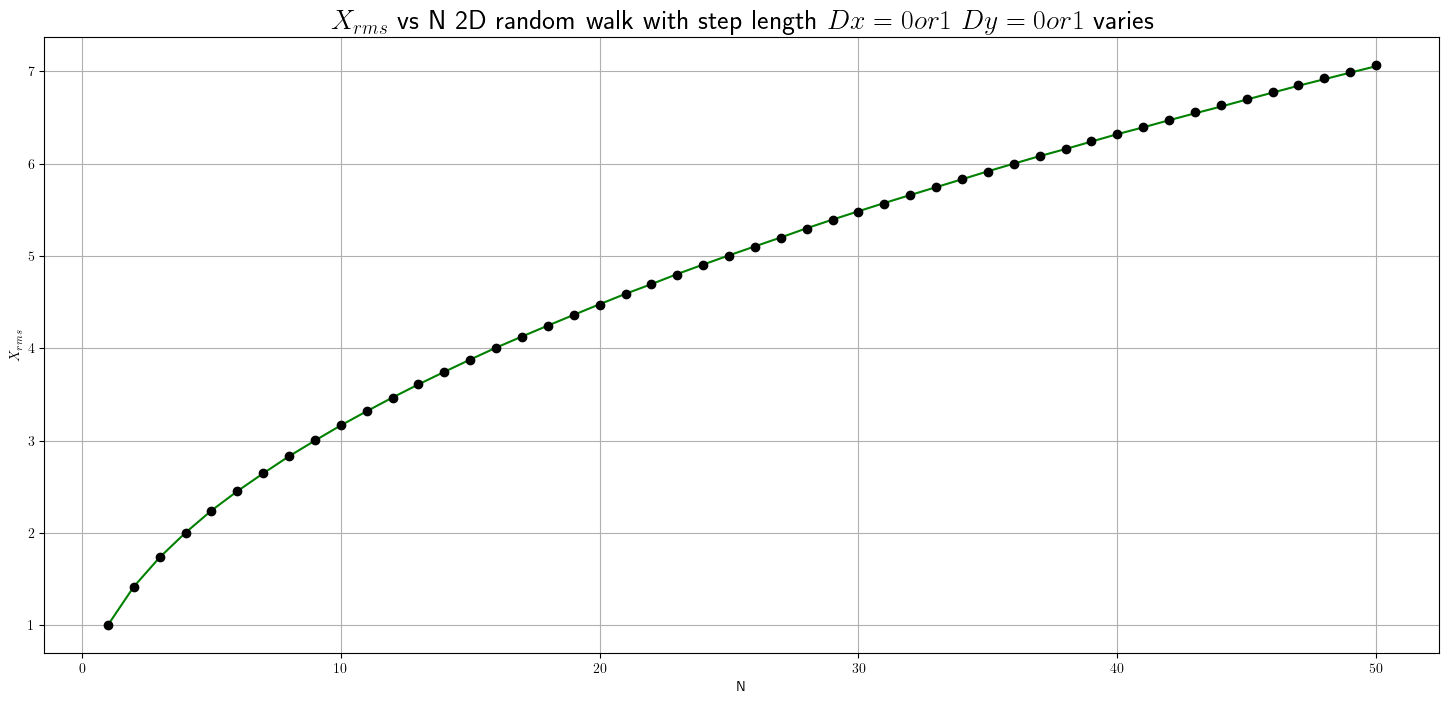

In [135]:
N=10
A=[]
for i in range(10**5):
    a=np.random.choice(4,50)
    a2=np.zeros(50)
    b2=np.zeros(50)
    a2[a==0]=1
    a2[a==1]=-1
    b2[a==2]=1
    b2[a==3]=-1
    X=np.cumsum(a2)
    Y=np.cumsum(b2)
    r2=(X**2)+(Y**2)
    A.append(r2)
rms=np.sqrt(np.average(A,0))
C=np.arange(1,51)
C1=np.log(rms)
C2=np.log(C)
def f(x,m,c):
    return m*x+c
S,P=SOP.curve_fit(f,C2,C1)
print('the value of m',S[0],'value of c',S[1])
plt.plot(C,rms,'g',C,np.exp(f(C2,*S)),'ko')
plt.title(r'$X_{rms}$ vs N 2D random walk with step length $Dx=0 or 1$ $Dy=0 or 1$ varies',fontsize=20)
plt.xlabel('N')
plt.ylabel(r'$X_{rms}$')
plt.grid()
plt.show()

3. Repeat both part of Q.no. 1 but this time let ∆r be an exponential variate $P(r)=\alpha e^{-\alpha r}$

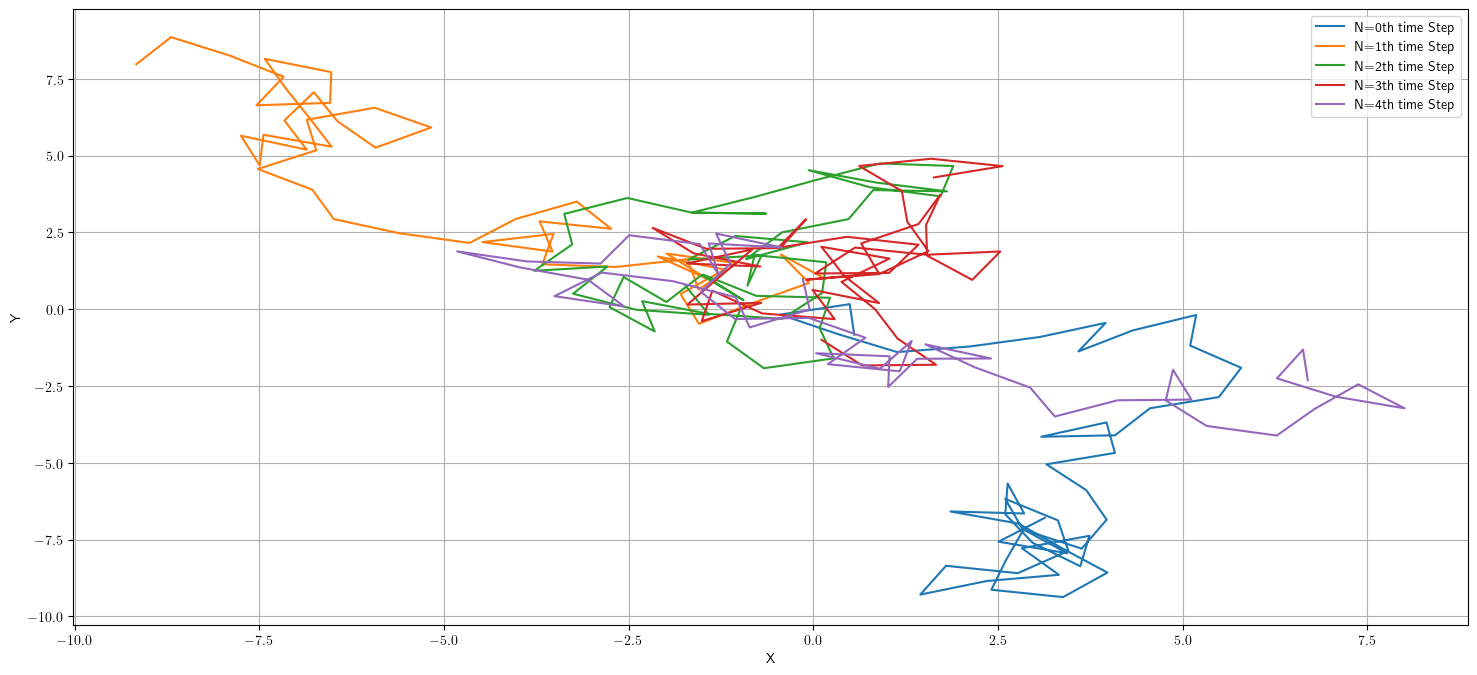

In [138]:
N=5
for i in range(N):
    R=np.random.rand(50)
    T=2*np.pi*R
    dy=np.sin(T)
    dx=np.cos(T)
    A1=np.cumsum(dx)
    A2=np.cumsum(dy)
    plt.plot(A1,A2,label=F'N={i}th time Step'.format(i))
    plt.legend(loc='best',fontsize=10)
#plt.title(r'2D random walk with step length $ \Delta $ R=1 & $ \Delta  \theta$ varies',fontsize=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

the value of m 0.5010092864170659 value of k(=exp(c)) 0.9980752147868731


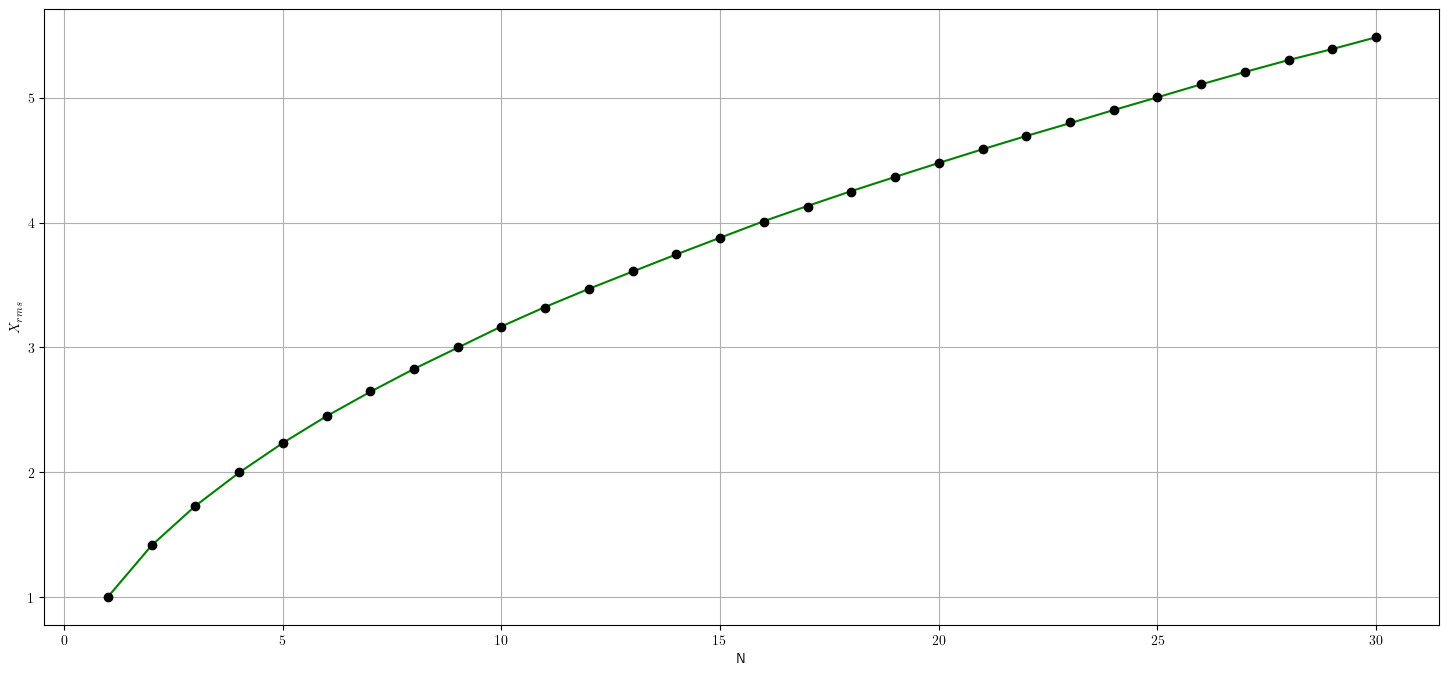

In [140]:
N=10**5
R=np.random.rand(N,30)
T=2*np.pi*R
dy=np.sin(T)
dx=np.cos(T)
A1=np.square(np.cumsum(dx,1))
A2=np.square(np.cumsum(dy,1))
A=A1+A2
B1=np.average(A,0)
B=np.sqrt(B1)
C=np.arange(1,31)
C1=np.log(B)
C2=np.log(C)
def f(x,m,c):
    return m*x+c
S,P=SOP.curve_fit(f,C2,C1)
print('the value of m',S[0],'value of k(=exp(c))',np.exp(S[1]))
plt.plot(C,B,'g',C,np.exp(f(C2,*S)),'ko')
#plt.title(r' $X_{rms}$ vs N 2D random walk with step length $\Delta$ R=1 &$\Delta$ $ \theta$ varies ',fontsize=20)
plt.xlabel('N')
plt.ylabel(r'$X_{rms}$')
plt.grid()
plt.show()

 Q1.Generate 1 M uniform variate. Use transformation method $\displaystyle{ y=-\frac{\log x}{\beta}} .$ 
 
 Generate the histogram. 
    Fit the histogram with $\displaystyle{𝑓(𝑦, 𝐴, 𝜆) = 𝐴 \exp  (−𝜆𝑦)}$. Compare the values of 𝛽 and 𝜆.

[2.73435424e+05 4.98382831e+00]


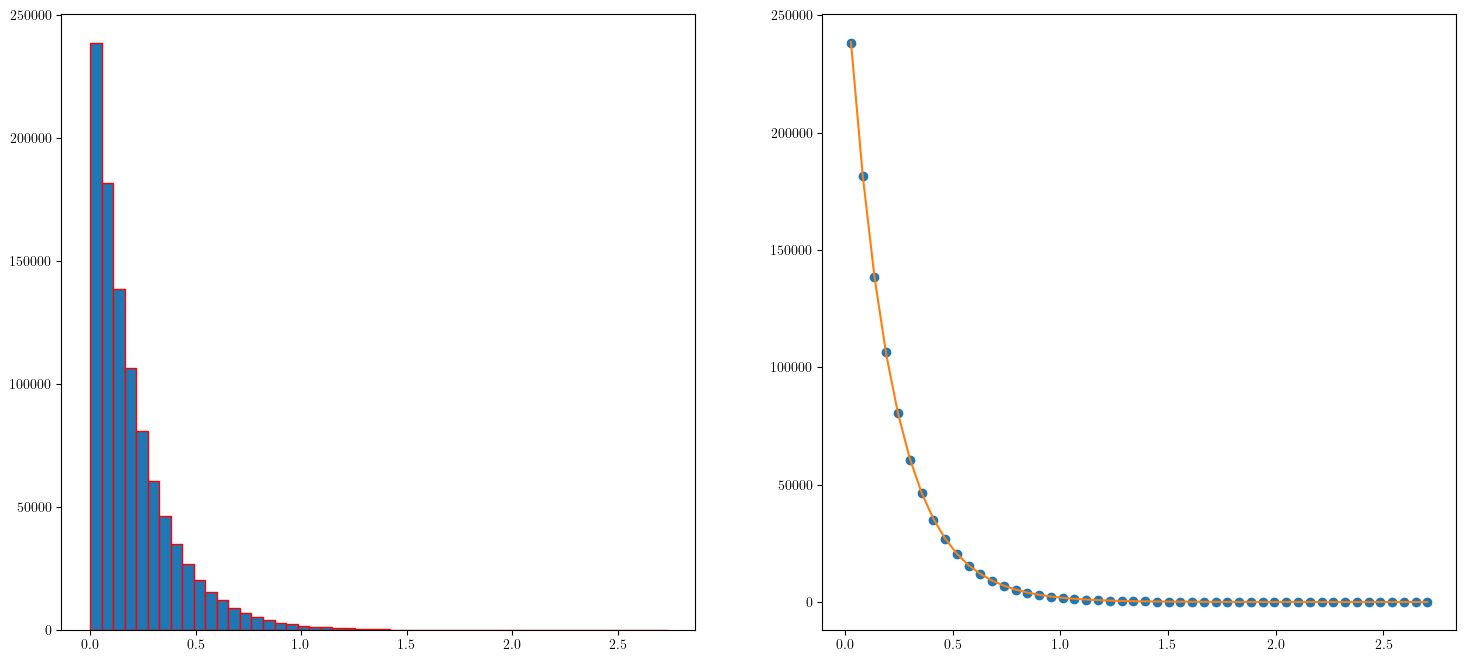

In [141]:
def f(x,A,l):
    return A*np.exp(-(l*x))

x= np.random.random(10**6)
beta=5
z=-(np.log(x)/beta)

plt.subplot(121)
c,b,p=plt.hist(z,50,ec='red')

plt.subplot(122)
bcenter=(b[:-1]+b[1:])/2
plt.plot(bcenter,c, 'o')

p,s=curve_fit(f,bcenter,c)
print(p)
plt.plot(bcenter, f(bcenter, *p))
plt.show()

Q2. Generate 1 M Gaussian variate by averaging over 𝑁 trials.                                                                
Fit the histogram of the gaussian random numbers thus created by $\displaystyle{ 𝑓(𝑦, 𝐴, 𝜇, 𝜎) = 𝐴 \exp(−\frac{(𝑦−𝜇)^2}{\sigma^2})}$                                                                                                                     
Study the variation of 𝜎 with N.

<IPython.core.display.Math object>

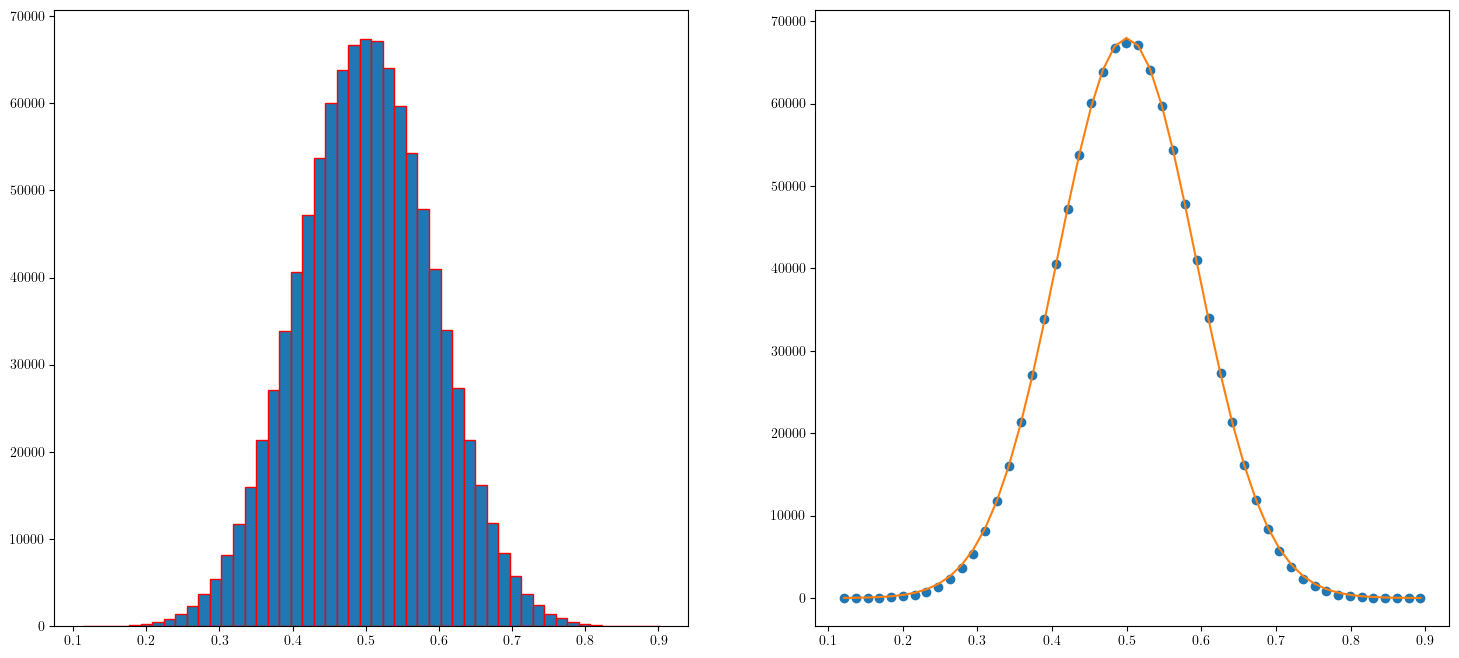

<IPython.core.display.Math object>

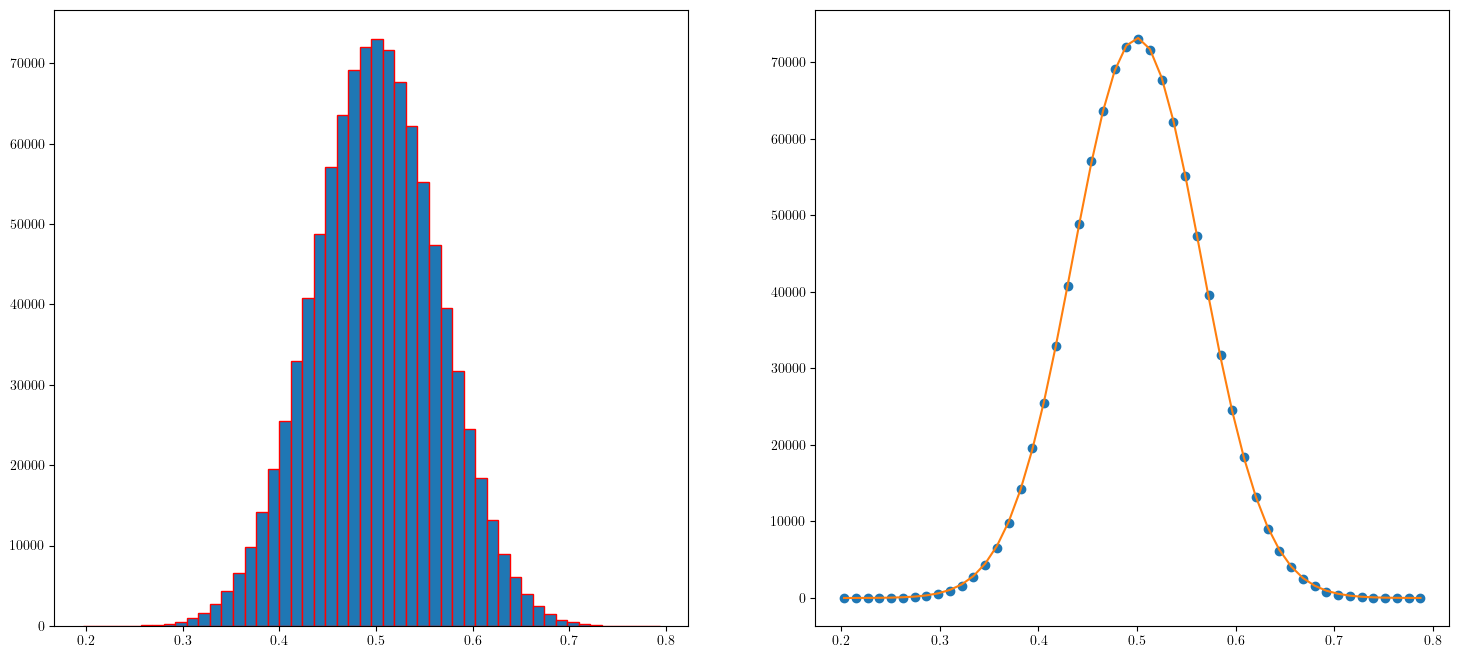

<IPython.core.display.Math object>

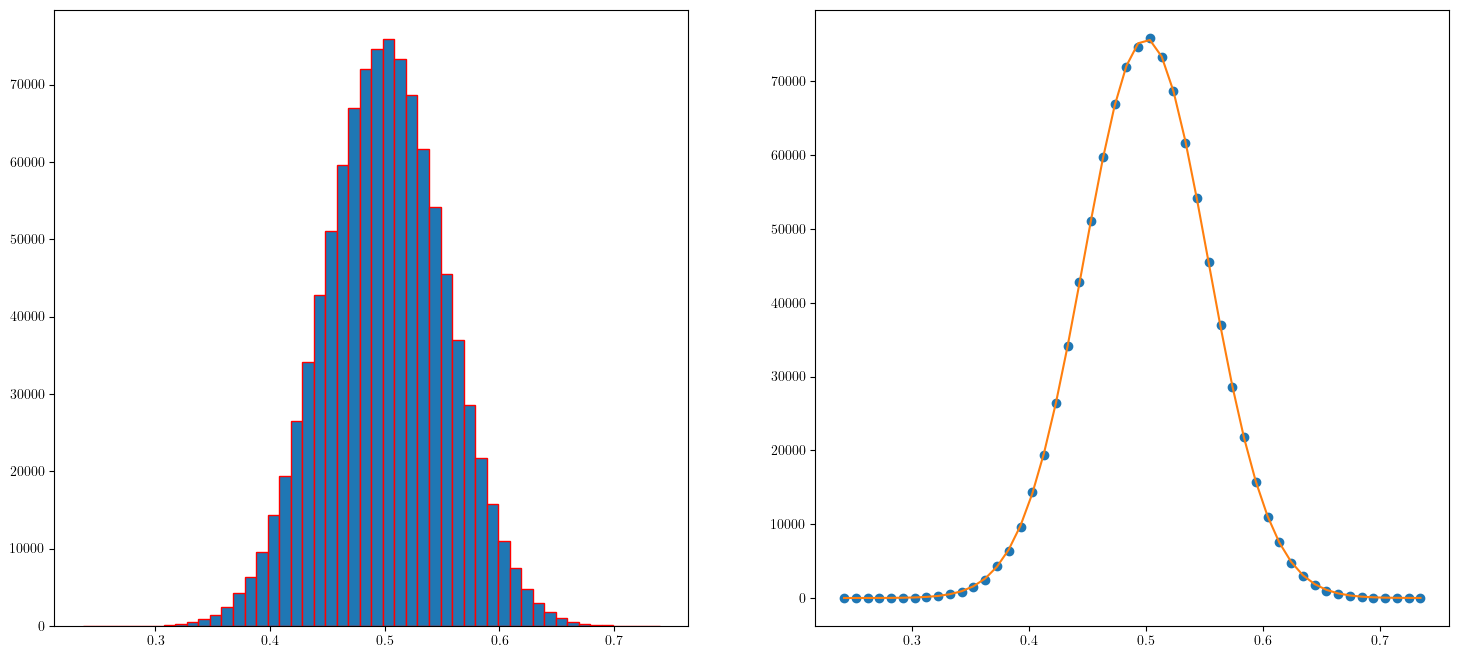

In [142]:
def f(x,A,mu,sig):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

N=[10,20,30]
for i in N:
    R= np.random.rand(i,10**6)
    B=np.mean(R,0)
    B
    plt.subplot(121)
    c,b,p=plt.hist(B,50,ec='red')
    #print('count',c,'\n\n binborder',b)
    plt.subplot(122)
    bcenter=(b[:-1]+b[1:])/2
    plt.plot(bcenter,c, 'o')

    p,s=curve_fit(f,bcenter,c,maxfev=10000)
    A,mu,sig=p
    display(Math(r'\mu :'+latex(mu)+r'\quad\sigma :'+latex(sig)))
    plt.plot(bcenter, f(bcenter, *p))
    plt.show()

Q3.Use a gaussian random number with a user specified value of 𝜇 and 𝜎. Check the 𝜇 and 𝜎 obtained by your algorithm. Use 𝑁 = 20

<IPython.core.display.Math object>

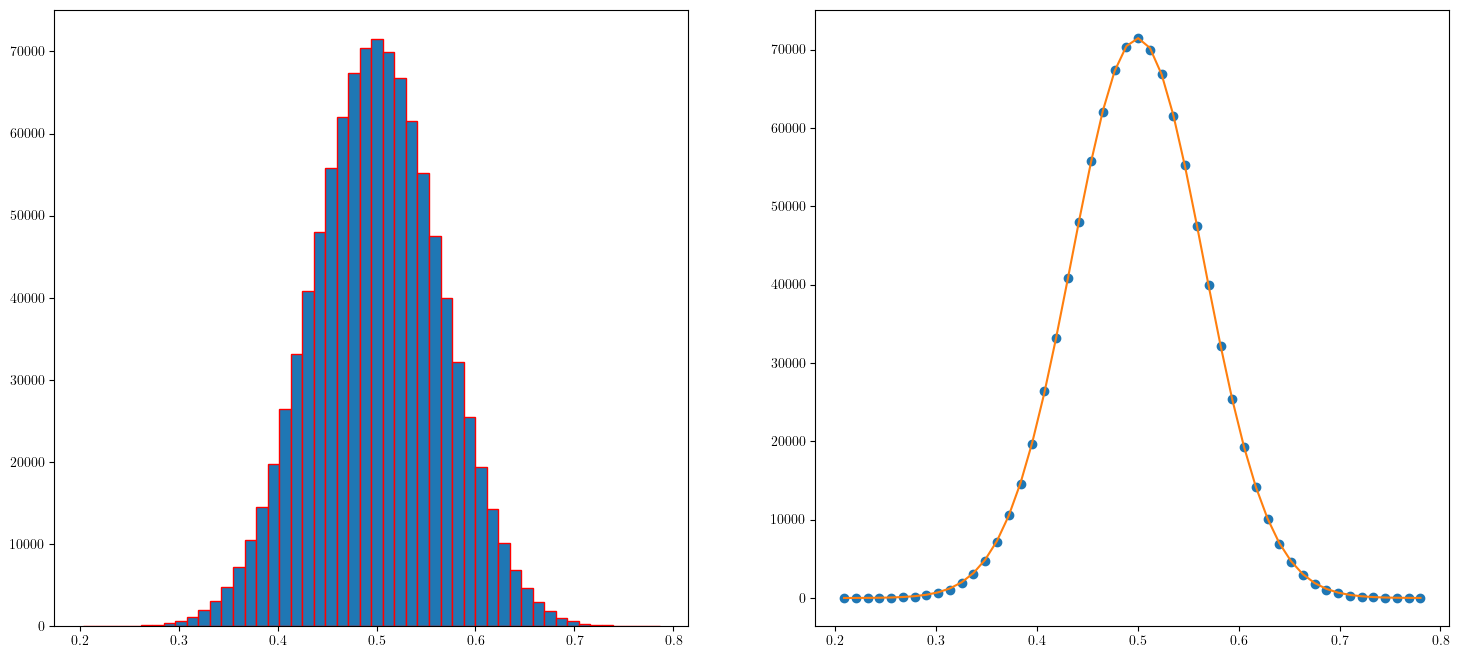

In [144]:
def f(x,A,mu,sig):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

N=20    
R= np.random.rand(N,10**6)
#x
B=np.mean(R,0)
B
plt.subplot(121)

c,b,p=plt.hist(B,50,ec='red')
#print('count',c,'\n\n binborder',b)
plt.subplot(122)
bcenter=(b[:-1]+b[1:])/2
plt.plot(bcenter,c, 'o')

p,s=curve_fit(f,bcenter,c,maxfev=10000)
A,mu,sig=p
display(Math(r'\mu :'+latex(mu)+r'\quad\sigma :'+latex(sig)))
plt.plot(bcenter, f(bcenter, *p))
plt.show()

binborder    count
0    0.572518      1.0
1    0.585973      2.0
2    0.599427      5.0
3    0.612882     16.0
4    0.626336     31.0
5    0.639790     90.0
6    0.653245    180.0
7    0.666699    347.0
8    0.680153    614.0
9    0.693608   1064.0
10   0.707062   1946.0
11   0.720517   3058.0
12   0.733971   4715.0
13   0.747425   7152.0
14   0.760880  10530.0
15   0.774334  14544.0
16   0.787789  19704.0
17   0.801243  26436.0
18   0.814697  33148.0
19   0.828152  40854.0
20   0.841606  47971.0
21   0.855060  55775.0
22   0.868515  62038.0
23   0.881969  67336.0
24   0.895424  70365.0
25   0.908878  71481.0
26   0.922332  69990.0
27   0.935787  66827.0
28   0.949241  61554.0
29   0.962695  55219.0
30   0.976150  47514.0
31   0.989604  39937.0
32   1.003059  32119.0
33   1.016513  25448.0
34   1.029967  19331.0
35   1.043422  14199.0
36   1.056876  10075.0
37   1.070330   6881.0
38   1.083785   4586.0
39   1.097239   2930.0
40   1.110694   1801.0
41   1.124148   1032.0
42   1.137602    586.0
43   1.151057    294.0
44   1.164511    149.0
45   1.177966     75.0
46   1.191420     28.0
47   1.204874     14.0
48   1.218329      5.0
49   1.231783      3.0

<IPython.core.display.Math object>

<IPython.core.display.Math object>

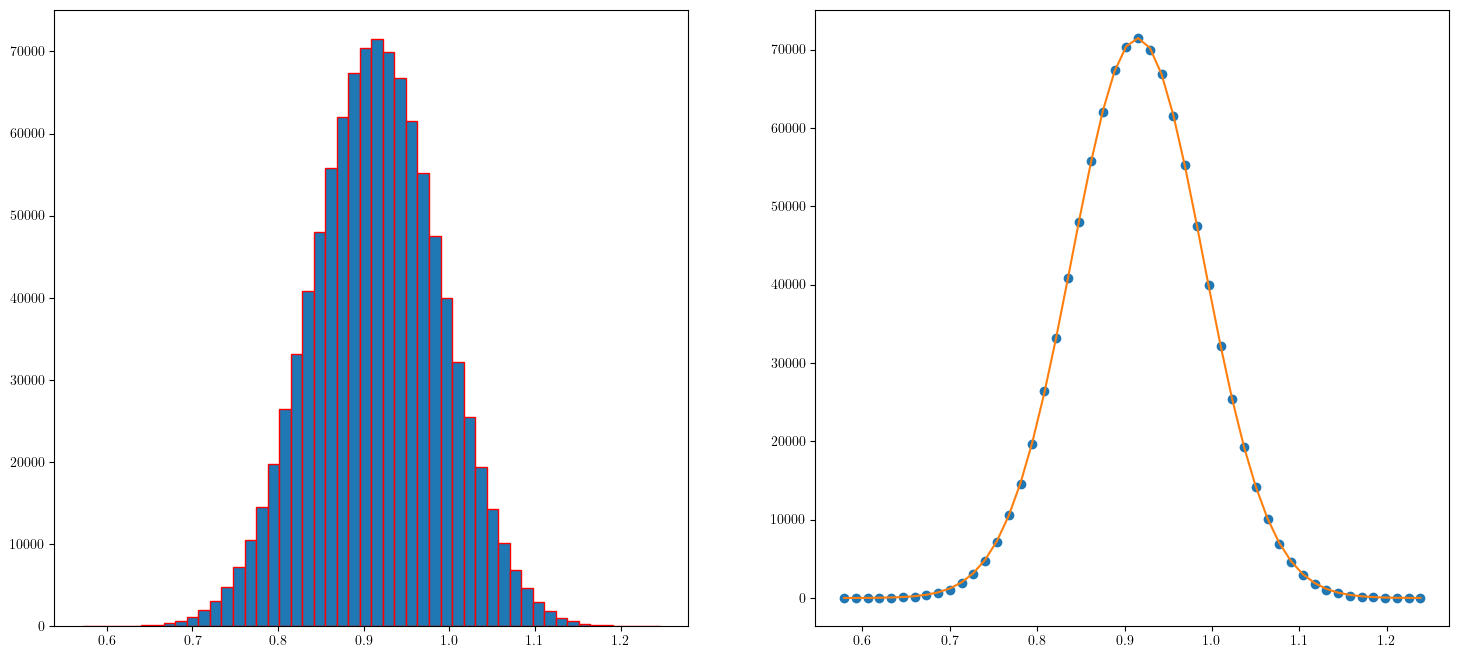

In [147]:
N=20
new_mu=0.7
new_sig=.07
B=B*(new_sig/sig)+(new_mu-mu*(new_sig/sig))

def f(x,A,mu,sig):
    return A*np.exp(-(x-mu)**2/(2*sig**2))
    
#x= np.random.rand(N,10**6)
#A1=7
#mu1=4
#sig1=6
#z=A1*np.exp(-(x-mu1)**2/(2*sig1**2))
#B=np.mean(R,0)
#B
plt.subplot(121)

Bb,Cc=[],[]
c,b,p=plt.hist(B,50,ec='red')
for i in range(len(c)):
    Bb.append(b[i])
    Cc.append(c[i])
display(pd.DataFrame({'binborder':Bb,'count':Cc}))
plt.subplot(122)
bcenter=(b[:-1]+b[1:])/2
#plt.plot(bcenter,c, 'o')

p1,s1=curve_fit(f,bcenter,c,maxfev=10000)
A1,mu1,sig1=p1
display(Math(r'\mu_{assigned} :'+latex(new_mu)+r'\quad\sigma_{assigned} :'+latex(new_sig)))
display(Math(r'\mu :'+latex(mu1)+r'\quad\sigma :'+latex(sig1)))

plt.plot(bcenter,c, 'o',bcenter, f(bcenter, *p1))
plt.show()